# Economic Analysis of CatSalut Pharmaceutical Expenditure

This notebook analyzes:
1. Mean fraction paid by the government for each ATC level 1 and 2
2. Total amount paid comparison across different groups:
   - Sex (male/female)
   - Age intervals
   - Sanitary regions
   - By ATC level 1 groups

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configure display and plotting
pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 140)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("colorblind")

# Set figure size defaults
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10

print("Libraries loaded successfully!")

Libraries loaded successfully!


In [2]:
# Load the cleaned data
df = pd.read_csv(r"clean_data.csv")

# Ensure numeric columns are properly typed
numeric_cols = ['any', 'mes', 'codi de la regió sanitària', 'nombre de receptes', 
                "nombre d'envasos", 'import íntegre', 'import aportació CatSalut', 'fracció_govern']

for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Remove any rows that failed conversion
df = df.dropna(subset=numeric_cols)

# Translate Catalan sex labels to English
df['sexe'] = df['sexe'].replace({'Dona': 'Women', 'Home': 'Men'})

# Translate Spanish ATC Level 1 labels to English
atc1_translations = {
    'TRACTO ALIMENTARIO Y METABOLISMO': 'ALIMENTARY TRACT AND METABOLISM',
    'SANGRE Y ORGANOS HEMATOPOYETICOS': 'BLOOD AND BLOOD FORMING ORGANS',
    'SISTEMA CARDIOVASCULAR': 'CARDIOVASCULAR SYSTEM',
    'DERMATOLOGICOS': 'DERMATOLOGICALS',
    'SISTEMA GENITOURINARIO Y HORMONAS SEXUALES': 'GENITO-URINARY SYSTEM AND SEX HORMONES',
    'PREPARADOS HORMONALES SISTEMICOS, EXCLUYENDO HORMONAS SEXUALES E INSULINAS': 'SYSTEMIC HORMONAL PREPARATIONS, EXCL. SEX HORMONES AND INSULINS',
    'ANTIINFECCIOSOS PARA USO SISTEMICO': 'ANTIINFECTIVES FOR SYSTEMIC USE',
    'AGENTES ANTINEOPLASICOS E INMUNOMODULADORES': 'ANTINEOPLASTIC AND IMMUNOMODULATING AGENTS',
    'SISTEMA MUSCULOESQUELETICO': 'MUSCULO-SKELETAL SYSTEM',
    'SISTEMA NERVIOSO': 'NERVOUS SYSTEM',
    'PRODUCTOS ANTIPARASITARIOS, INSECTICIDAS Y REPELENTES': 'ANTIPARASITIC PRODUCTS, INSECTICIDES AND REPELLENTS',
    'SISTEMA RESPIRATORIO': 'RESPIRATORY SYSTEM',
    'ORGANOS DE LOS SENTIDOS': 'SENSORY ORGANS' 
}
df['grup ATC nivell 1'] = df['grup ATC nivell 1'].replace(atc1_translations)

# Translate common Spanish terms in ATC Level 2, 3, and 4 (comprehensive dictionary)
atc2_translations = {
    # A - ALIMENTARY TRACT AND METABOLISM
    'PREPARADOS ESTOMATOLOGICOS': 'STOMATOLOGICAL PREPARATIONS',
    'AGENTES PARA EL TRATAMIENTO DE ALTERACIONES CAUSADAS POR ACIDOS': 'DRUGS FOR ACID RELATED DISORDERS',
    'AGENTES CONTRA LA ULCERA PEPTICA Y EL REFLUJO GASTROESOFAGICO (RGE/GORD)': 'DRUGS FOR PEPTIC ULCER AND GASTRO-OESOPHAGEAL REFLUX DISEASE (GORD)',
    'Inhibidores de la bomba de protones': 'PROTON PUMP INHIBITORS',
    'AGENTES CONTRA PADECIMIENTOS FUNCIONALES DEL ESTOMAGO E INTESTINO': 'DRUGS FOR FUNCTIONAL GASTROINTESTINAL DISORDERS',
    'FARMACOS PARA DESORDENES FUNCIONALES GASTROINTESTINALES': 'DRUGS FOR FUNCTIONAL GASTROINTESTINAL DISORDERS',
    'ANTIEMETICOS Y FARMACOS PARA LAS NAUSEAS': 'ANTIEMETICS AND ANTINAUSEANTS',
    'ANTIEMETICOS Y ANTINAUSEANTES': 'ANTIEMETICS AND ANTINAUSEANTS',
    'TERAPIA DE LA BILIS Y EL HIGADO': 'BILE AND LIVER THERAPY',
    'BILIS Y TERAPIA DEL HIGADO': 'BILE AND LIVER THERAPY',
    'FARMACOS PARA EL ESTREÑIMIENTO': 'DRUGS FOR CONSTIPATION',
    'LAXANTES': 'LAXATIVES',
    'ANTIDIARREICOS, AGENTES ANTIINFLAMATORIOS/ANTIINFECCIOSOS INTESTINALES': 'ANTIDIARRHEALS, INTESTINAL ANTIINFLAMMATORY/ANTIINFECTIVE AGENTS',
    'PREPARADOS ANTIOBESIDAD, EXCL. PRODUCTOS DIETETICOS': 'ANTIOBESITY PREPARATIONS, EXCL. DIET PRODUCTS',
    'PREPARACIONES PARA LA OBESIDAD, EXCLUYENDO PRODUCTOS DIETETICOS': 'ANTIOBESITY PREPARATIONS, EXCL. DIET PRODUCTS',
    'DIGESTIVOS, INCL. ENZIMAS': 'DIGESTIVES, INCL. ENZYMES',
    'DIGESTIVOS, INCLUYENDO ENZIMAS': 'DIGESTIVES, INCL. ENZYMES',
    'FARMACOS USADOS EN DIABETES': 'DRUGS USED IN DIABETES',
    'VITAMINAS': 'VITAMINS',
    'SUPLEMENTOS MINERALES': 'MINERAL SUPPLEMENTS',
    'TONICOS': 'TONICS',
    'AGENTES ANABOLICOS PARA USO SISTEMICO': 'ANABOLIC AGENTS FOR SYSTEMIC USE',
    'ESTIMULANTES DEL APETITO': 'APPETITE STIMULANTS',
    'OTROS PRODUCTOS PARA EL TRACTO ALIMENTARIO Y METABOLISMO': 'OTHER ALIMENTARY TRACT AND METABOLISM PRODUCTS',
    'Antiinfecciosos y antisepticos para el tratamiento oral-local': 'ANTIINFECTIVES AND ANTISEPTICS FOR LOCAL ORAL TREATMENT',
    
    # B - BLOOD AND BLOOD FORMING ORGANS
    'AGENTES ANTITROMBÓTICOS': 'ANTITHROMBOTIC AGENTS',
    'AGENTES ANTITROMBOTICOS': 'ANTITHROMBOTIC AGENTS',
    'ANTIHEMORRAGICOS': 'ANTIHEMORRHAGICS',
    'SUSTITUTOS DE LA SANGRE Y SOLUCIONES DE PERFUSIÓN': 'BLOOD SUBSTITUTES AND PERFUSION SOLUTIONS',
    'SUSTITUTOS DE LA SANGRE Y SOLUCIONES PARA PERFUSION': 'BLOOD SUBSTITUTES AND PERFUSION SOLUTIONS',
    'PREPARADOS ANTIANEMICOS': 'ANTIANEMIC PREPARATIONS',
    'OTROS AGENTES HEMATOLOGICOS': 'OTHER HEMATOLOGICAL AGENTS',
    
    # C - CARDIOVASCULAR SYSTEM
    'TERAPIA CARDIACA': 'CARDIAC THERAPY',
    'ANTIHIPERTENSIVOS': 'ANTIHYPERTENSIVES',
    'DIURÉTICOS': 'DIURETICS',
    'DIURETICOS': 'DIURETICS',
    'VASODILATADORES PERIFÉRICOS': 'PERIPHERAL VASODILATORS',
    'VASODILATADORES PERIFERICOS': 'PERIPHERAL VASODILATORS',
    'VASOPROTECTORES': 'VASOPROTECTIVES',
    'AGENTES BETA BLOQUEANTES': 'BETA BLOCKING AGENTS',
    'AGENTES BETA-BLOQUEANTES': 'BETA BLOCKING AGENTS',
    'BLOQUEADORES DE LOS CANALES DE CALCIO': 'CALCIUM CHANNEL BLOCKERS',
    'AGENTES QUE ACTÚAN SOBRE EL SISTEMA RENINA-ANGIOTENSINA': 'AGENTS ACTING ON THE RENIN-ANGIOTENSIN SYSTEM',
    'AGENTES QUE ACTUAN SOBRE EL SISTEMA RENINA-ANGIOTENSINA': 'AGENTS ACTING ON THE RENIN-ANGIOTENSIN SYSTEM',
    'AGENTES MODIFICADORES DE LÍPIDOS': 'LIPID MODIFYING AGENTS',
    'AGENTES MODIFICADORES DE LOS LIPIDOS': 'LIPID MODIFYING AGENTS',
    
    # D - DERMATOLOGICALS
    'ANTIFÚNGICOS PARA USO DERMATOLÓGICO': 'ANTIFUNGALS FOR DERMATOLOGICAL USE',
    'ANTIFUNGICOS PARA USO DERMATOLOGICO': 'ANTIFUNGALS FOR DERMATOLOGICAL USE',
    'EMOLIENTES Y PROTECTORES': 'EMOLLIENTS AND PROTECTIVES',
    'PREPARADOS PARA EL TRATAMIENTO DE HERIDAS Y ULCERAS': 'PREPARATIONS FOR TREATMENT OF WOUNDS AND ULCERS',
    'ANTIPRURITICOS, INCL. ANTIHISTAMINICOS, ANESTESICOS, ETC.': 'ANTIPRURITICS, INCL. ANTIHISTAMINES, ANESTHETICS, ETC.',
    'PREPARADOS ANTIPSORIASTICOS': 'ANTIPSORIATICS',
    'PREPARADOS ANTIPSORIÁSICOS': 'ANTIPSORIATICS',
    'ANTIBIÓTICOS Y QUIMIOTERÁPICOS PARA USO DERMATOLÓGICO': 'ANTIBIOTICS AND CHEMOTHERAPEUTICS FOR DERMATOLOGICAL USE',
    'ANTIBIOTICOS Y QUIMIOTERAPICOS PARA USO DERMATOLOGICO': 'ANTIBIOTICS AND CHEMOTHERAPEUTICS FOR DERMATOLOGICAL USE',
    'CORTICOSTEROIDES, DERMATOLÓGICOS': 'CORTICOSTEROIDS, DERMATOLOGICAL PREPARATIONS',
    'PREPARADOS DERMATOLOGICOS CON CORTICOSTEROIDES': 'CORTICOSTEROIDS, DERMATOLOGICAL PREPARATIONS',
    'ANTISEPTICOS Y DESINFECTANTES': 'ANTISEPTICS AND DISINFECTANTS',
    'APOSITOS MEDICADOS': 'MEDICATED DRESSINGS',
    'PREPARADOS ANTIACNÉ': 'ANTI-ACNE PREPARATIONS',
    'PREPARADOS ANTI-ACNE': 'ANTI-ACNE PREPARATIONS',
    'OTROS PREPARADOS DERMATOLOGICOS': 'OTHER DERMATOLOGICAL PREPARATIONS',
    
    # G - GENITO URINARY SYSTEM AND SEX HORMONES
    'ANTIINFECCIOSOS Y ANTISÉPTICOS GINECOLÓGICOS': 'GYNECOLOGICAL ANTIINFECTIVES AND ANTISEPTICS',
    'ANTIINFECCIOSOS Y ANTISEPTICOS GINECOLOGICOS': 'GYNECOLOGICAL ANTIINFECTIVES AND ANTISEPTICS',
    'OTROS GINECOLOGICOS': 'OTHER GYNECOLOGICALS',
    'HORMONAS SEXUALES Y MODULADORES DEL SISTEMA GENITAL': 'SEX HORMONES AND MODULATORS OF THE GENITAL SYSTEM',
    'UROLÓGICOS': 'UROLOGICALS',
    'UROLOGICOS': 'UROLOGICALS',
    
    # H - SYSTEMIC HORMONAL PREPARATIONS, EXCL. SEX HORMONES AND INSULINS
    'HORMONAS PITUITARIAS E HIPOTALÁMICAS Y ANÁLOGOS': 'PITUITARY AND HYPOTHALAMIC HORMONES AND ANALOGUES',
    'HORMONAS PITUITARIAS E HIPOTALAMICAS Y ANALOGOS': 'PITUITARY AND HYPOTHALAMIC HORMONES AND ANALOGUES',
    'CORTICOSTEROIDES PARA USO SISTÉMICO': 'CORTICOSTEROIDS FOR SYSTEMIC USE',
    'CORTICOSTEROIDES PARA USO SISTEMICO': 'CORTICOSTEROIDS FOR SYSTEMIC USE',
    'TERAPIA TIROIDEA': 'THYROID THERAPY',
    'HORMONAS PANCREATICAS': 'PANCREATIC HORMONES',
    'HOMEOSTASIS DEL CALCIO': 'CALCIUM HOMEOSTASIS',
    
    # J - ANTIINFECTIVES FOR SYSTEMIC USE
    'ANTIBACTERIANOS PARA USO SISTÉMICO': 'ANTIBACTERIALS FOR SYSTEMIC USE',
    'ANTIBACTERIANOS PARA USO SISTEMICO': 'ANTIBACTERIALS FOR SYSTEMIC USE',
    'ANTIMICÓTICOS PARA USO SISTÉMICO': 'ANTIMYCOTICS FOR SYSTEMIC USE',
    'ANTIMICOTICOS PARA USO SISTEMICO': 'ANTIMYCOTICS FOR SYSTEMIC USE',
    'ANTIMICOBACTERIANOS': 'ANTIMYCOBACTERIALS',
    'ANTIVIRALES PARA USO SISTÉMICO': 'ANTIVIRALS FOR SYSTEMIC USE',
    'ANTIVIRALES PARA USO SISTEMICO': 'ANTIVIRALS FOR SYSTEMIC USE',
    'SUEROS INMUNES E INMUNOGLOBULINAS': 'IMMUNE SERA AND IMMUNOGLOBULINS',
    'VACUNAS': 'VACCINES',
    
    # L - ANTINEOPLASTIC AND IMMUNOMODULATING AGENTS
    'AGENTES ANTINEOPLÁSICOS': 'ANTINEOPLASTIC AGENTS',
    'AGENTES ANTINEOPLASICOS': 'ANTINEOPLASTIC AGENTS',
    'TERAPIA ENDOCRINA': 'ENDOCRINE THERAPY',
    'INMUNOESTIMULANTES': 'IMMUNOSTIMULANTS',
    'INMUNOSUPRESORES': 'IMMUNOSUPPRESSANTS',
    
    # M - MUSCULO-SKELETAL SYSTEM
    'PRODUCTOS ANTIINFLAMATORIOS Y ANTIRREUMÁTICOS': 'ANTIINFLAMMATORY AND ANTIRHEUMATIC PRODUCTS',
    'PRODUCTOS ANTIINFLAMATORIOS Y ANTIRREUMATICOS': 'ANTIINFLAMMATORY AND ANTIRHEUMATIC PRODUCTS',
    'PRODUCTOS TOPICOS PARA EL DOLOR ARTICULAR Y MUSCULAR': 'TOPICAL PRODUCTS FOR JOINT AND MUSCULAR PAIN',
    'RELAJANTES MUSCULARES': 'MUSCLE RELAXANTS',
    'AGENTES ANTIGOTOSOS': 'ANTIGOUT PREPARATIONS',
    'PREPARADOS ANTIGOTOSOS': 'ANTIGOUT PREPARATIONS',
    'FARMACOS PARA EL TRATAMIENTO DE ENFERMEDADES ÓSEAS': 'DRUGS FOR TREATMENT OF BONE DISEASES',
    'FARMACOS PARA EL TRATAMIENTO DE ENFERMEDADES OSEAS': 'DRUGS FOR TREATMENT OF BONE DISEASES',
    'OTROS FARMACOS PARA TRASTORNOS DEL SISTEMA MUSCULOESQUELETICO': 'OTHER DRUGS FOR DISORDERS OF THE MUSCULO-SKELETAL SYSTEM',
    
    # N - NERVOUS SYSTEM
    'ANESTESICOS': 'ANESTHETICS',
    'ANALGÉSICOS': 'ANALGESICS',
    'ANALGESICOS': 'ANALGESICS',
    'ANTIEPILÉPTICOS': 'ANTIEPILEPTICS',
    'ANTIEPILEPTICOS': 'ANTIEPILEPTICS',
    'ANTIPARKINSONIANOS': 'ANTI-PARKINSON DRUGS',
    'FARMACOS ANTIPARKINSONIANOS': 'ANTI-PARKINSON DRUGS',
    'PSICOLÉPTICOS': 'PSYCHOLEPTICS',
    'PSICOLEPTICOS': 'PSYCHOLEPTICS',
    'PSICOANALÉPTICOS': 'PSYCHOANALEPTICS',
    'PSICOANALEPTICOS': 'PSYCHOANALEPTICS',
    'OTROS FÁRMACOS DEL SISTEMA NERVIOSO': 'OTHER NERVOUS SYSTEM DRUGS',
    'OTROS FARMACOS QUE ACTUAN SOBRE EL SISTEMA NERVIOSO': 'OTHER NERVOUS SYSTEM DRUGS',
    'OTROS FARMACOS DEL SISTEMA NERVIOSO': 'OTHER NERVOUS SYSTEM DRUGS',
    'ANTIPSICÓTICOS': 'ANTIPSYCHOTICS',
    'ANTIPSICÓTICOS': 'ANTIPSYCHOTICS',
    'ANSIOLÍTICOS': 'ANXIOLYTICS',
    'ANSIOLITICOS': 'ANXIOLYTICS',
    'HIPNÓTICOS Y SEDANTES': 'HYPNOTICS AND SEDATIVES',
    'HIPNOTICOS Y SEDANTES': 'HYPNOTICS AND SEDANTES',
    'ANTIDEPRESIVOS': 'ANTIDEPRESSANTS',
    'PSICOESTIMULANTES, AGENTES UTILIZADOS EN TDAH Y NOOTRÓPICOS': 'PSYCHOSTIMULANTS, AGENTS USED FOR ADHD AND NOOTROPICS',
    'AGENTES ANTI-DEMENCIA': 'ANTI-DEMENTIA DRUGS',
    
    # P - ANTIPARASITIC PRODUCTS, INSECTICIDES AND REPELLENTS
    'ANTIPROTOZOARIOS': 'ANTIPROTOZOALS',
    'ANTIHELMÍNTICOS': 'ANTHELMINTICS',
    'ANTIHELMINTICOS': 'ANTHELMINTICS',
    'ECTOPARASITICIDAS, INCL. ESCABICIDAS, INSECTICIDAS Y REPELENTES': 'ECTOPARASITICIDES, INCL. SCABICIDES, INSECTICIDES AND REPELLENTS',
    'ECTOPARASITICIDAS, INCLUYENDO ESCABICIDAS, INSECTICIDAS Y REPELENTES': 'ECTOPARASITICIDES, INCL. SCABICIDES, INSECTICIDES AND REPELLENTS',
    
    # R - RESPIRATORY SYSTEM
    'PREPARADOS NASALES': 'NASAL PREPARATIONS',
    'PREPARADOS DE USO NASAL': 'NASAL PREPARATIONS',
    'PREPARADOS PARA LA GARGANTA': 'THROAT PREPARATIONS',
    'FARMACOS PARA ENFERMEDADES OBSTRUCTIVAS DE LAS VÍAS RESPIRATORIAS': 'DRUGS FOR OBSTRUCTIVE AIRWAY DISEASES',
    'AGENTES CONTRA PADECIMIENTOS OBSTRUCTIVOS DE LAS VIAS RESPIRATORIAS': 'DRUGS FOR OBSTRUCTIVE AIRWAY DISEASES',
    'FARMACOS PARA ENFERMEDADES OBSTRUCTIVAS DE LAS VIAS RESPIRATORIAS': 'DRUGS FOR OBSTRUCTIVE AIRWAY DISEASES',
    'PREPARADOS PARA LA TOS Y EL RESFRIADO': 'COUGH AND COLD PREPARATIONS',
    'ANTIHISTAMÍNICOS PARA USO SISTÉMICO': 'ANTIHISTAMINES FOR SYSTEMIC USE',
    'ANTIHISTAMINICOS PARA USO SISTEMICO': 'ANTIHISTAMINES FOR SYSTEMIC USE',
    'OTROS PRODUCTOS DEL SISTEMA RESPIRATORIO': 'OTHER RESPIRATORY SYSTEM PRODUCTS',
    
    # S - SENSORY ORGANS
    'OFTALMOLÓGICOS': 'OPHTHALMOLOGICALS',
    'OFTALMOLOGICOS': 'OPHTHALMOLOGICALS',
    'OTOLÓGICOS': 'OTOLOGICALS',
    'OTOLOGICOS': 'OTOLOGICALS',
    'PREPARADOS OFTALMOLOGICOS Y OTOLOGICOS': 'OPHTHALMOLOGICAL AND OTOLOGICAL PREPARATIONS',
}
df['grup ATC nivell 2'] = df['grup ATC nivell 2'].replace(atc2_translations)

print(f"Dataset loaded: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nData types:")
print(df.dtypes)
print(f"\nFirst few rows:")
df.head()

Dataset loaded: (7536094, 19)

Columns: ['any', 'mes', 'codi de la regió sanitària', 'regió sanitària', "grup d'edat", 'sexe', 'codi del grup ATC nivell 1', 'grup ATC nivell 1', 'codi del grup ATC nivell 2', 'grup ATC nivell 2', 'codi del grup ATC nivell 3', 'grup ATC nivell 3', 'codi del grup ATC nivell 4', 'grup ATC nivell 4', 'nombre de receptes', "nombre d'envasos", 'import íntegre', 'import aportació CatSalut', 'fracció_govern']

Data types:
any                             int64
mes                             int64
codi de la regió sanitària      int64
regió sanitària                object
grup d'edat                    object
sexe                           object
codi del grup ATC nivell 1     object
grup ATC nivell 1              object
codi del grup ATC nivell 2     object
grup ATC nivell 2              object
codi del grup ATC nivell 3     object
grup ATC nivell 3              object
codi del grup ATC nivell 4     object
grup ATC nivell 4              object
nombre de recepte

any  mes  codi de la regió sanitària regió sanitària grup d'edat   sexe codi del grup ATC nivell 1                grup ATC nivell 1  \
0  2025    9                          61          LLEIDA         0-1  Women                          A  ALIMENTARY TRACT AND METABOLISM   
1  2025    9                          61          LLEIDA         0-1  Women                          A  ALIMENTARY TRACT AND METABOLISM   
2  2025    9                          61          LLEIDA         0-1  Women                          A  ALIMENTARY TRACT AND METABOLISM   
3  2025    9                          61          LLEIDA         0-1  Women                          A  ALIMENTARY TRACT AND METABOLISM   
4  2025    9                          61          LLEIDA         0-1  Women                          A  ALIMENTARY TRACT AND METABOLISM   

  codi del grup ATC nivell 2                                  grup ATC nivell 2 codi del grup ATC nivell 3  \
0                        A01                        STOMATOLOGICAL PREPARATIONS                       A01A   
1                        A02                   DRUGS FOR ACID RELATED DISORDERS                       A02B   
2                        A07  ANTIDIARRHEALS, INTESTINAL ANTIINFLAMMATORY/AN...                       A07A   
3                        A07  ANTIDIARRHEALS, INTESTINAL ANTIINFLAMMATORY/AN...                       A07C   
4                        A11                                           VITAMINS                       A11C   

                                   grup ATC nivell 3 codi del grup ATC nivell 4                                  grup ATC nivell 4  \
0                         PREPARADOS ESTOMATOLOGICOS                      A01AB  Antiinfecciosos y antisepticos para el tratami...   
1  AGENTES CONTRA LA ULCERA PEPTICA Y EL REFLUJO ...                      A02BC                Inhibidores de la bomba de protones   
2                       ANTIINFECCIOSOS INTESTINALES                      A07AA                                       Antibioticos   
3                     ELECTROLITOS CON CARBOHIDRATOS                      A07CA       Formulaciones de sales de rehidratacion oral   
4  VITAMINAS A Y D, INCLUYENDO COMBINACIONES DE L...                      A11CC                              Vitamina D y analogos   

   nombre de receptes  nombre d'envasos  import íntegre  import aportació CatSalut  fracció_govern  
0                   3                 3            8.49                       7.36        0.866902  
1                   1                 1           17.75                      10.65        0.600000  
2                  17                17           79.56                      53.84        0.676722  
3                  27                27           95.62                      56.26        0.588371  
4                 307               307         1708.00                    1036.48        0.606838

## 1. Mean Fraction Paid by Government by ATC Levels

Mean Fraction Paid by Government - ATC Level 1:
                                                    Mean Fraction Gov    Total Cost  Total Gov Payment  Percentage
grup ATC nivell 1                                                                                                 
ANTINEOPLASTIC AND IMMUNOMODULATING AGENTS                   0.953754  9.423170e+08       9.144324e+08   95.375368
NERVOUS SYSTEM                                               0.874671  4.602316e+09       4.261278e+09   87.467080
CARDIOVASCULAR SYSTEM                                        0.873858  2.580588e+09       2.283014e+09   87.385834
SYSTEMIC HORMONAL PREPARATIONS, EXCL. SEX HORMO...           0.873392  3.735436e+08       3.461475e+08   87.339246
BLOOD AND BLOOD FORMING ORGANS                               0.839768  1.385317e+09       1.300033e+09   83.976773
ALIMENTARY TRACT AND METABOLISM                              0.835191  3.127342e+09       2.892654e+09   83.519103
RESPIRATORY SYSTEM              

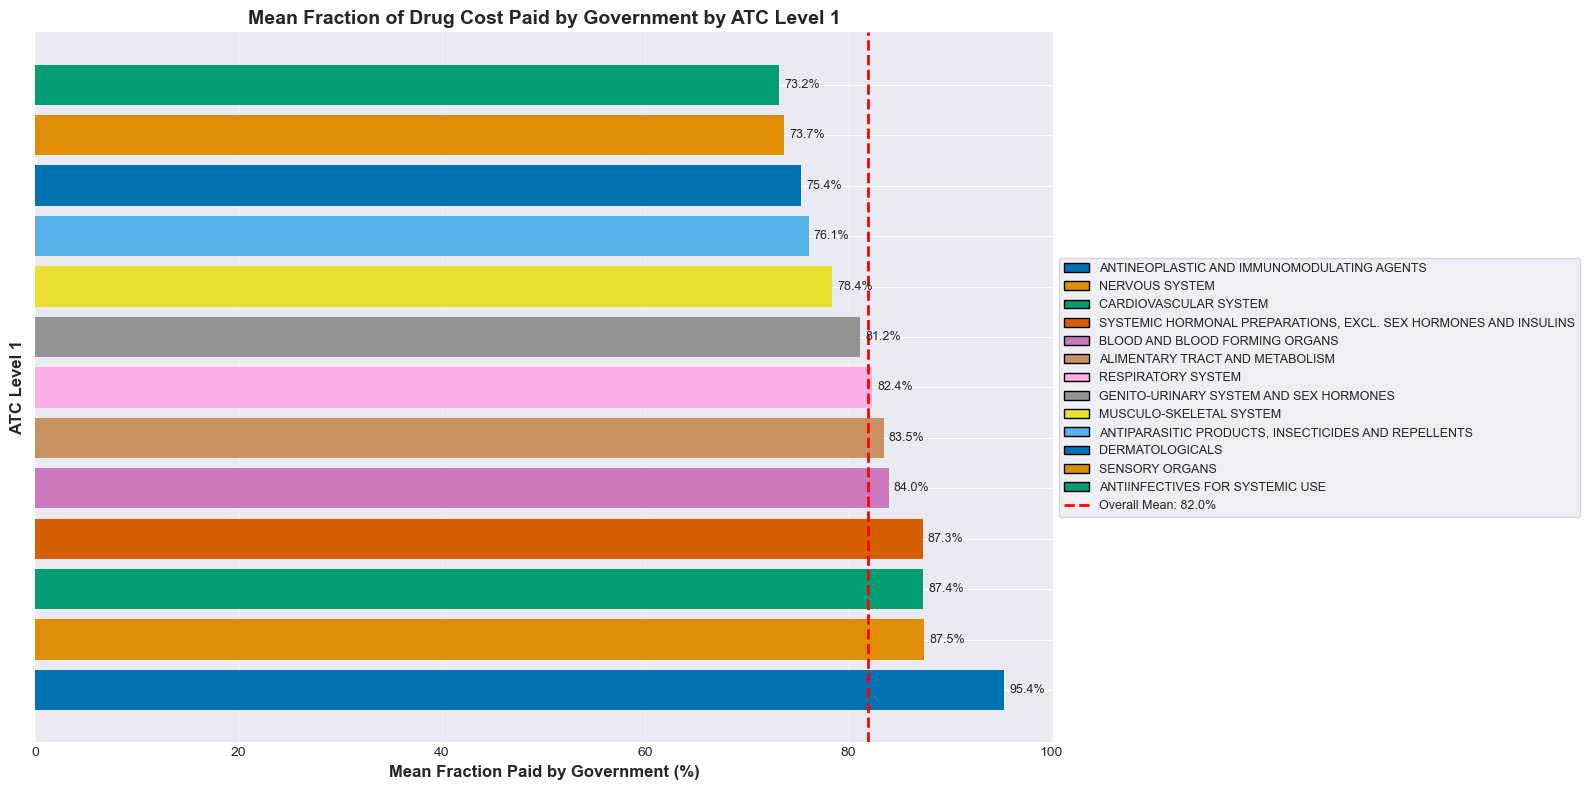

In [3]:
# Calculate mean fraction paid by government for ATC Level 1
atc1_fraction = df.groupby('grup ATC nivell 1').agg({
    'fracció_govern': 'mean',
    'import íntegre': 'sum',
    'import aportació CatSalut': 'sum'
}).sort_values('fracció_govern', ascending=False)

atc1_fraction.columns = ['Mean Fraction Gov', 'Total Cost', 'Total Gov Payment']
atc1_fraction['Percentage'] = atc1_fraction['Mean Fraction Gov'] * 100

print("Mean Fraction Paid by Government - ATC Level 1:")
print(atc1_fraction)

# Plot
fig, ax = plt.subplots(figsize=(16, 8))
# Use colorblind-friendly palette
colors = sns.color_palette("colorblind", n_colors=len(atc1_fraction))
bars = ax.barh(range(len(atc1_fraction)), atc1_fraction['Percentage'], color=colors)
ax.set_xlabel('Mean Fraction Paid by Government (%)', fontsize=12, fontweight='bold')
ax.set_ylabel('ATC Level 1', fontsize=12, fontweight='bold')
ax.set_title('Mean Fraction of Drug Cost Paid by Government by ATC Level 1', fontsize=14, fontweight='bold')
ax.axvline(x=atc1_fraction['Percentage'].mean(), color='red', linestyle='--', linewidth=2, label=f'Overall Mean: {atc1_fraction["Percentage"].mean():.1f}%')
ax.set_yticks(range(len(atc1_fraction)))
ax.set_yticklabels([])  # Remove y-axis labels
ax.grid(axis='x', alpha=0.3)

# Add percentage labels
for i, (idx, row) in enumerate(atc1_fraction.iterrows()):
    ax.text(row['Percentage'] + 0.5, i, f"{row['Percentage']:.1f}%", va='center', fontsize=9)

# Create legend with drug names
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

legend_elements = []
for i, idx in enumerate(atc1_fraction.index):
    legend_elements.append(Patch(facecolor=colors[i], edgecolor='k', label=idx))
# Add mean reference line to legend
legend_elements.append(Line2D([0], [0], color='red', linestyle='--', linewidth=2, label=f'Overall Mean: {atc1_fraction["Percentage"].mean():.1f}%'))
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=9, frameon=True)

plt.tight_layout()
plt.show()


Mean Fraction Paid by Government - Top 30 ATC Level 2 (by total cost):
                                                    Mean Fraction Gov    Total Cost  Total Gov Payment  Percentage
grup ATC nivell 2                                                                                                 
HORMONAS HIPOFISARIAS E HIPOTALAMICAS Y SUS ANA...           0.962294  1.263993e+08       1.247278e+08   96.229372
IMMUNOSUPPRESSANTS                                           0.958615  4.956821e+08       4.798375e+08   95.861514
ANTI-PARKINSON DRUGS                                         0.958388  2.714858e+08       2.628871e+08   95.838845
ENDOCRINE THERAPY                                            0.956362  4.057911e+08       3.950299e+08   95.636240
ANTIEPILEPTICS                                               0.944187  7.067409e+08       6.751236e+08   94.418673
DRUGS USED IN DIABETES                                       0.939609  2.196283e+09       2.089179e+09   93.960857
CALCIUM 

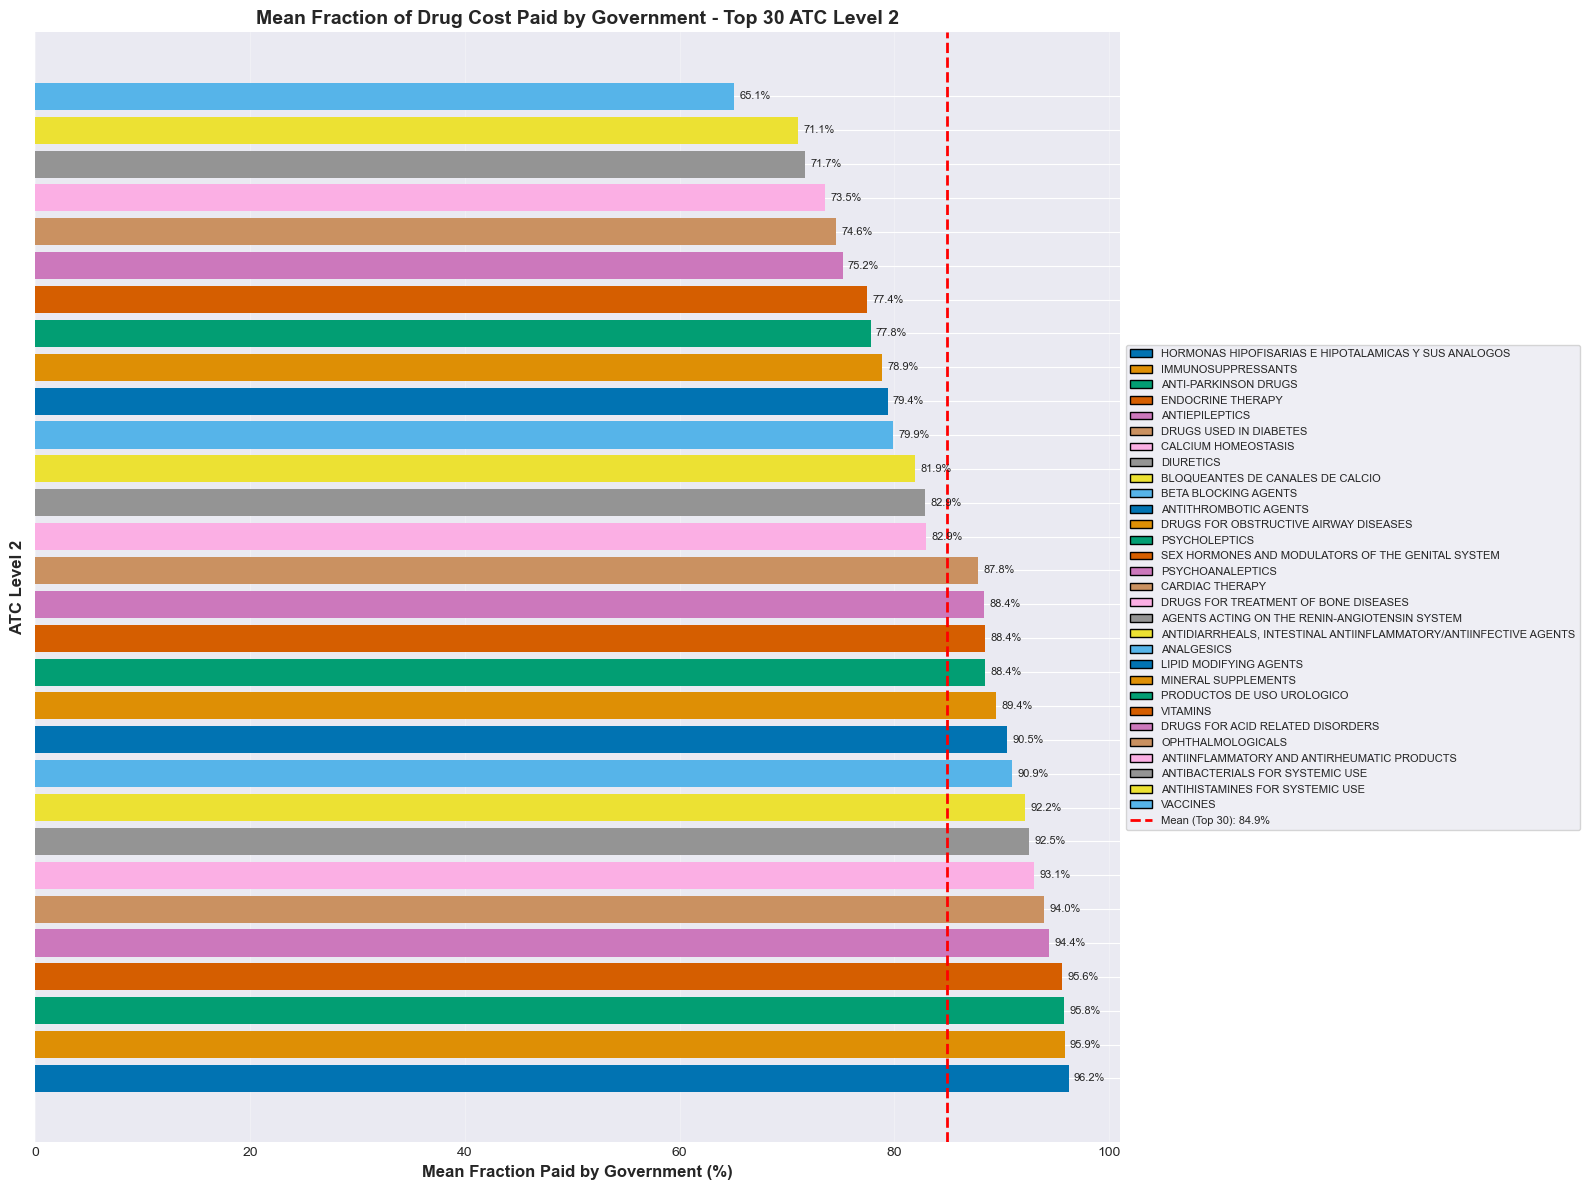

In [4]:
# Calculate mean fraction paid by government for ATC Level 2 (top 30)
atc2_fraction = df.groupby('grup ATC nivell 2').agg({
    'fracció_govern': 'mean',
    'import íntegre': 'sum',
    'import aportació CatSalut': 'sum'
}).sort_values('import íntegre', ascending=False).head(30)

atc2_fraction = atc2_fraction.sort_values('fracció_govern', ascending=False)
atc2_fraction.columns = ['Mean Fraction Gov', 'Total Cost', 'Total Gov Payment']
atc2_fraction['Percentage'] = atc2_fraction['Mean Fraction Gov'] * 100

print("\nMean Fraction Paid by Government - Top 30 ATC Level 2 (by total cost):")
print(atc2_fraction)

# Plot
fig, ax = plt.subplots(figsize=(16, 12))
# Use colorblind-friendly palette
colors = sns.color_palette("colorblind", n_colors=10)  # Base palette
extended_colors = (colors * 3)[:len(atc2_fraction)]  # Extend for 30 items
bars = ax.barh(range(len(atc2_fraction)), atc2_fraction['Percentage'], color=extended_colors)
ax.set_xlabel('Mean Fraction Paid by Government (%)', fontsize=12, fontweight='bold')
ax.set_ylabel('ATC Level 2', fontsize=12, fontweight='bold')
ax.set_title('Mean Fraction of Drug Cost Paid by Government - Top 30 ATC Level 2', fontsize=14, fontweight='bold')
ax.axvline(x=atc2_fraction['Percentage'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean (Top 30): {atc2_fraction["Percentage"].mean():.1f}%')
ax.set_yticks(range(len(atc2_fraction)))
ax.set_yticklabels([])  # Remove y-axis labels
ax.grid(axis='x', alpha=0.3)

# Add percentage labels
for i, (idx, row) in enumerate(atc2_fraction.iterrows()):
    ax.text(row['Percentage'] + 0.5, i, f"{row['Percentage']:.1f}%", va='center', fontsize=8)

# Create legend with drug names
legend_elements = [Patch(facecolor=extended_colors[i], edgecolor='k', label=idx) for i, idx in enumerate(atc2_fraction.index)]
legend_elements.append(plt.Line2D([0], [0], color='red', linestyle='--', linewidth=2, label=f'Mean (Top 30): {atc2_fraction["Percentage"].mean():.1f}%'))
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8, frameon=True)

plt.tight_layout()
plt.show()


Mean Fraction Paid by Government - Bottom 30 ATC Level 2 (by total cost):
                                                    Mean Fraction Gov   Total Cost  Total Gov Payment  Percentage
grup ATC nivell 2                                                                                                
IMMUNOSTIMULANTS                                             0.979451    952578.23          935791.49   97.945126
PANCREATIC HORMONES                                          0.936843   7299918.89         6909777.71   93.684275
OTHER ALIMENTARY TRACT AND METABOLISM PRODUCTS               0.936467   1816071.24         1704999.37   93.646709
ANTIHEMORRHAGICS                                             0.925743   2721654.57         2515884.73   92.574290
IMMUNE SERA AND IMMUNOGLOBULINS                              0.894361   4332757.96         4000598.34   89.436148
VASOPROTECTIVES                                              0.887765  16410279.96        15399401.87   88.776542
DRUGS FOR CON

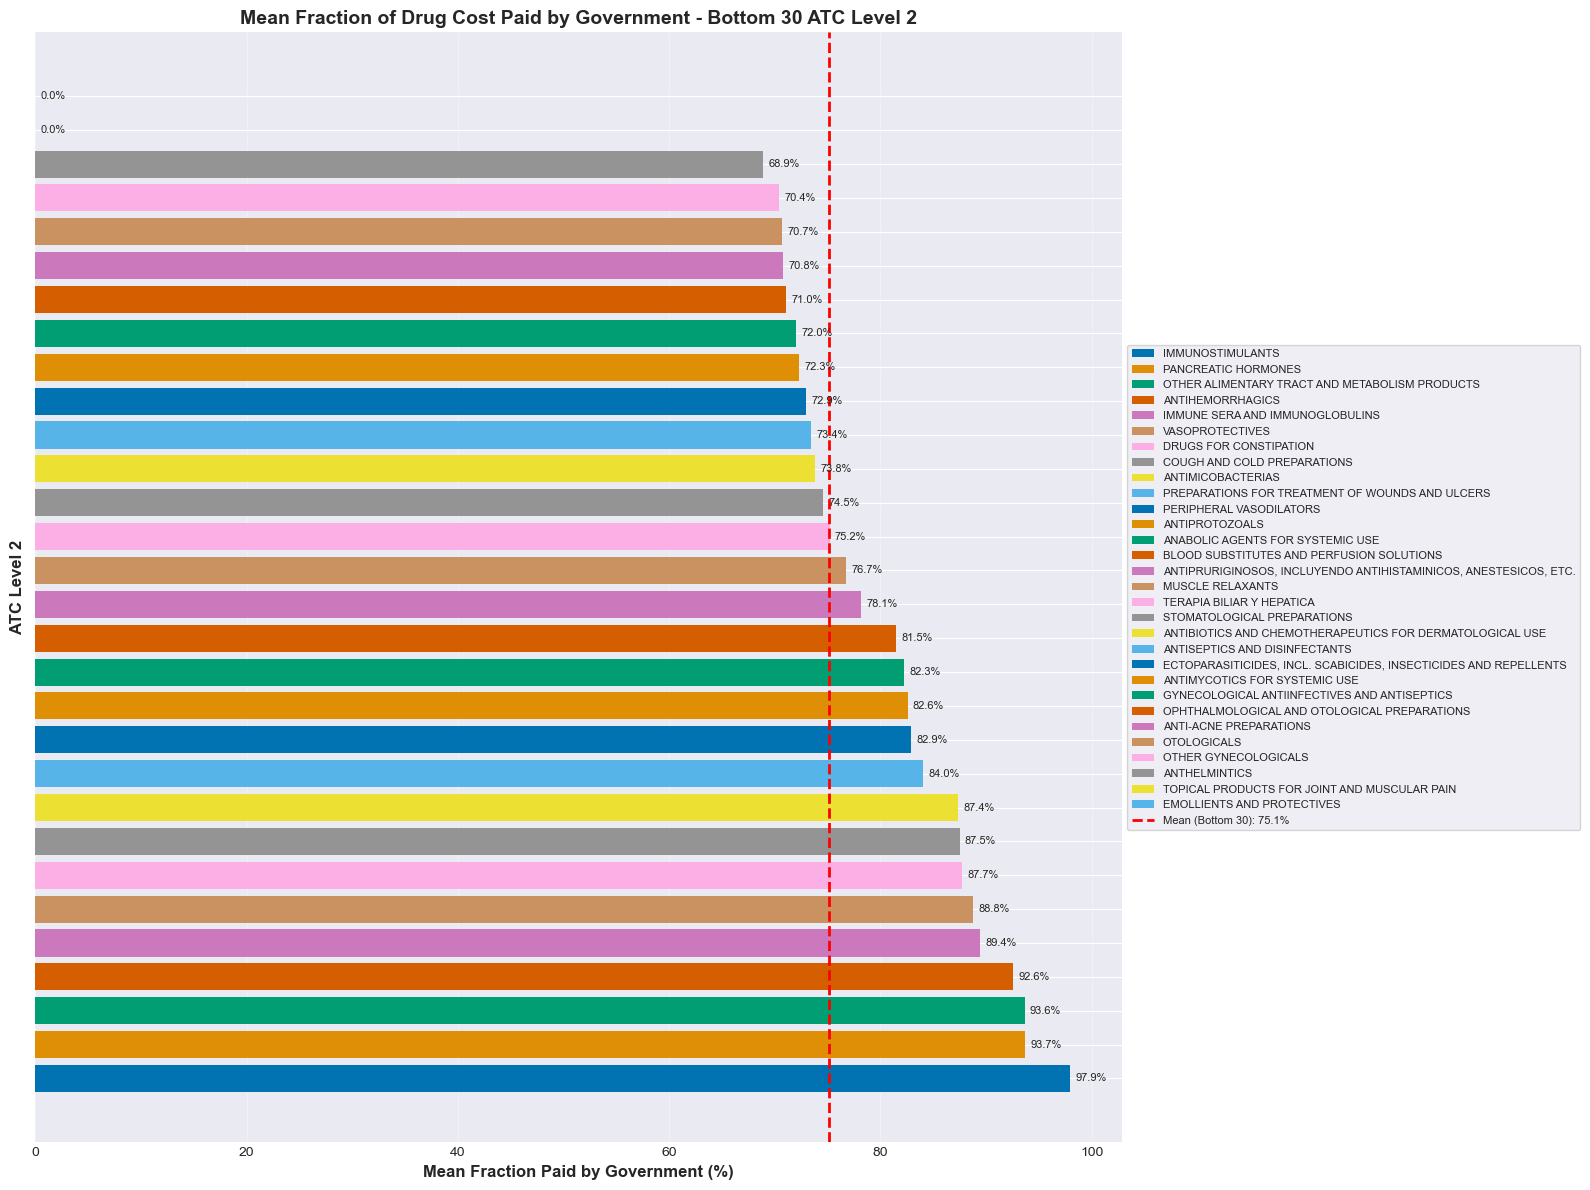

In [5]:
# Calculate mean fraction paid by government for ATC Level 2 (bottom 30)
atc2_fraction_bottom = df.groupby('grup ATC nivell 2').agg({
    'fracció_govern': 'mean',
    'import íntegre': 'sum',
    'import aportació CatSalut': 'sum'
}).sort_values('import íntegre', ascending=True).head(30)

atc2_fraction_bottom = atc2_fraction_bottom.sort_values('fracció_govern', ascending=False)
atc2_fraction_bottom.columns = ['Mean Fraction Gov', 'Total Cost', 'Total Gov Payment']
atc2_fraction_bottom['Percentage'] = atc2_fraction_bottom['Mean Fraction Gov'] * 100

print("\nMean Fraction Paid by Government - Bottom 30 ATC Level 2 (by total cost):")
print(atc2_fraction_bottom)

# Plot
fig, ax = plt.subplots(figsize=(16, 12))
# Use colorblind-friendly palette
colors = sns.color_palette("colorblind", n_colors=10)  # Base palette
extended_colors = (colors * 3)[:len(atc2_fraction_bottom)]  # Extend for 30 items
bars = ax.barh(range(len(atc2_fraction_bottom)), atc2_fraction_bottom['Percentage'], color=extended_colors)
ax.set_xlabel('Mean Fraction Paid by Government (%)', fontsize=12, fontweight='bold')
ax.set_ylabel('ATC Level 2', fontsize=12, fontweight='bold')
ax.set_title('Mean Fraction of Drug Cost Paid by Government - Bottom 30 ATC Level 2', fontsize=14, fontweight='bold')
ax.axvline(x=atc2_fraction_bottom['Percentage'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean (Bottom 30): {atc2_fraction_bottom["Percentage"].mean():.1f}%')
ax.set_yticks(range(len(atc2_fraction_bottom)))
ax.set_yticklabels([])  # Remove y-axis labels
ax.grid(axis='x', alpha=0.3)

# Add percentage labels
for i, (idx, row) in enumerate(atc2_fraction_bottom.iterrows()):
    ax.text(row['Percentage'] + 0.5, i, f"{row['Percentage']:.1f}%", va='center', fontsize=8)

# Create legend with drug names
legend_elements = [plt.Rectangle((0,0),1,1, fc=extended_colors[i], label=idx) for i, idx in enumerate(atc2_fraction_bottom.index)]
legend_elements.append(plt.Line2D([0], [0], color='red', linestyle='--', linewidth=2, label=f'Mean (Bottom 30): {atc2_fraction_bottom["Percentage"].mean():.1f}%'))
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8, frameon=True)

plt.tight_layout()
plt.show()

### Interactive Plot: All ATC Level 2 Drugs

The plot below shows **all** ATC Level 2 drug categories (not just top/bottom 30). 

**How to interact:**
- **Zoom:** Click and drag to select an area
- **Pan:** Hold Shift and drag
- **Reset view:** Double-click anywhere on the plot
- **Hover:** Move your mouse over bars to see detailed information

In [6]:
# Interactive plot showing ALL ATC Level 2 categories
# Install plotly if needed
%pip install plotly -q

import plotly.graph_objects as go

# Calculate for ALL ATC Level 2 categories
atc2_all = df.groupby('grup ATC nivell 2').agg({
    'fracció_govern': 'mean',
    'import íntegre': 'sum',
    'import aportació CatSalut': 'sum'
}).reset_index()

atc2_all.columns = ['ATC Level 2', 'Mean Fraction Gov', 'Total Cost', 'Total Gov Payment']
atc2_all['Patient Payment'] = atc2_all['Total Cost'] - atc2_all['Total Gov Payment']
atc2_all['Percentage'] = atc2_all['Mean Fraction Gov'] * 100

# Sort by total cost
atc2_all = atc2_all.sort_values('Total Cost', ascending=True)

print(f"\nTotal number of ATC Level 2 categories: {len(atc2_all)}")

# Create interactive plotly bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    y=atc2_all['ATC Level 2'],
    x=atc2_all['Total Cost'] / 1_000_000,
    orientation='h',
    marker=dict(
        color=atc2_all['Total Cost'],
        colorscale='Viridis',
        colorbar=dict(title="Total Cost (€)"),
        showscale=True
    ),
    text=[f"{pct:.1f}%" for pct in atc2_all['Percentage']],
    textposition='auto',
    hovertemplate='<b>%{y}</b><br>' +
                  'Total Cost: €%{x:.2f}M<br>' +
                  'Gov Fraction: %{text}<br>' +
                  'Gov Payment: €%{customdata[0]:.2f}M<br>' +
                  'Patient Payment: €%{customdata[1]:.2f}M<br>' +
                  '<extra></extra>',
    customdata=np.column_stack((
        atc2_all['Total Gov Payment'] / 1_000_000,
        atc2_all['Patient Payment'] / 1_000_000
    ))
))

# Add mean reference line
mean_cost = atc2_all['Total Cost'].mean() / 1_000_000
fig.add_vline(x=mean_cost, line_dash="dash", line_color="red",
              annotation_text=f"Mean: €{mean_cost:.1f}M",
              annotation_position="top right")

fig.update_layout(
    title='Mean Fraction of Drug Cost Paid by Government - All ATC Level 2 Categories',
    xaxis_title='Total Cost (million €)',
    yaxis_title='ATC Level 2',
    height=max(800, len(atc2_all) * 15),  # Dynamic height based on number of categories
    showlegend=False,
    hovermode='closest',
    template='plotly_white'
)

fig.show()

Note: you may need to restart the kernel to use updated packages.

Total number of ATC Level 2 categories: 77

Total number of ATC Level 2 categories: 77


## 2. Total Amount Paid - Overall and by ATC Level 1

Total Expenditure by Sex (in millions €):
     Sex  Total Cost  Government Payment  Patient Payment
0    Men  8196.00961         7427.661357       768.348253
1  Women  8657.27656         7870.243496       787.033064


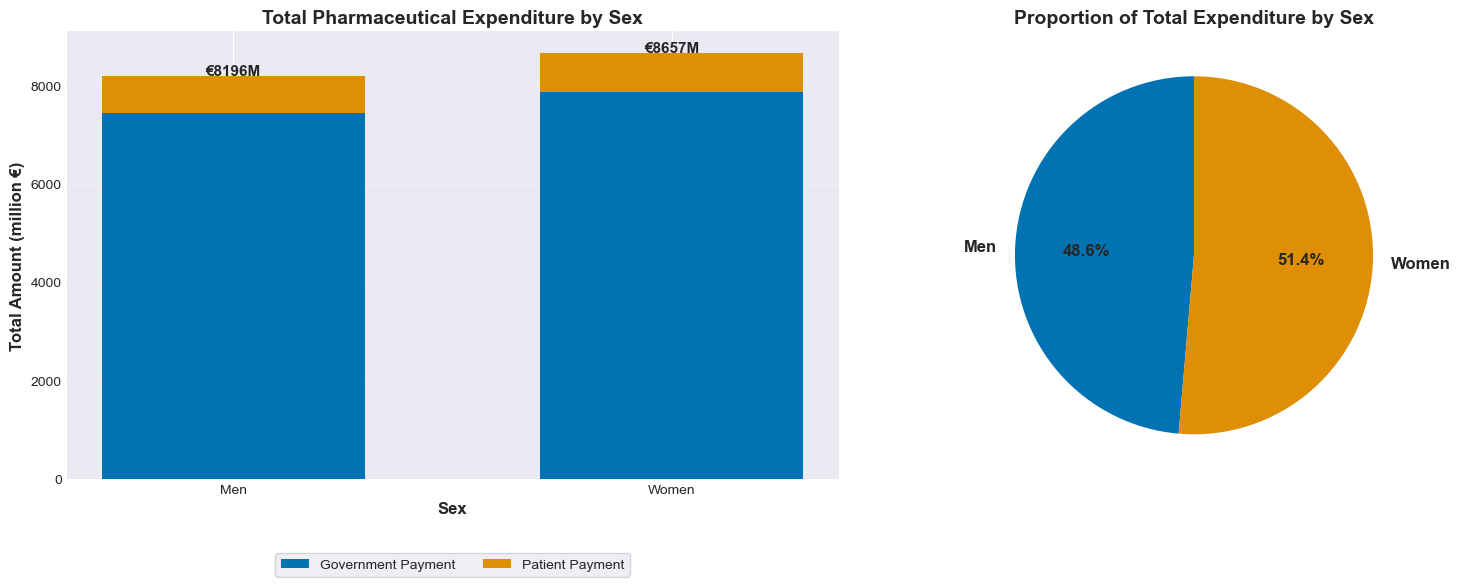

In [7]:
# Total expenditure by Sex
sex_totals = df.groupby('sexe').agg({
    'import íntegre': 'sum',
    'import aportació CatSalut': 'sum'
}).reset_index()

sex_totals.columns = ['Sex', 'Total Cost', 'Government Payment']
sex_totals['Patient Payment'] = sex_totals['Total Cost'] - sex_totals['Government Payment']

print("Total Expenditure by Sex (in millions €):")
print(sex_totals[['Sex', 'Total Cost', 'Government Payment', 'Patient Payment']].assign(
    **{col: sex_totals[col] / 1_000_000 for col in ['Total Cost', 'Government Payment', 'Patient Payment']}
))

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Stacked bar chart
x = np.arange(len(sex_totals))
width = 0.6
cb_colors = sns.color_palette("colorblind")
p1 = ax1.bar(x, sex_totals['Government Payment'] / 1_000_000, width, label='Government Payment', color=cb_colors[0])
p2 = ax1.bar(x, sex_totals['Patient Payment'] / 1_000_000, width, bottom=sex_totals['Government Payment'] / 1_000_000, label='Patient Payment', color=cb_colors[1])

ax1.set_ylabel('Total Amount (million €)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Sex', fontsize=12, fontweight='bold')
ax1.set_title('Total Pharmaceutical Expenditure by Sex', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(sex_totals['Sex'])
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=True)
ax1.grid(axis='y', alpha=0.3)

# Add total labels
for i, row in sex_totals.iterrows():
    total = row['Total Cost'] / 1_000_000
    ax1.text(i, total + 10, f'€{total:.0f}M', ha='center', fontweight='bold', fontsize=11)

# Pie chart showing proportion
ax2.pie(sex_totals['Total Cost'], labels=sex_totals['Sex'], autopct='%1.1f%%', 
        startangle=90, colors=[cb_colors[0], cb_colors[1]], textprops={'fontsize': 12, 'fontweight': 'bold'})
ax2.set_title('Proportion of Total Expenditure by Sex', fontsize=14, fontweight='bold')


plt.tight_layout()
plt.show()


Total Expenditure by Age Group (in millions €):
   Age Group   Total Cost  Government Payment  Patient Payment
0        0-1    26.931490           18.495232         8.436258
6        2-3    26.281001           19.065242         7.215759
11       4-5    30.996346           22.875037         8.121309
16       6-7    39.650703           29.657382         9.993320
21       8-9    57.595094           44.248746        13.346348
1      10-11    64.913459           49.289403        15.624057
2      12-13    73.039315           56.204316        16.834999
3      14-15    82.221309           64.348614        17.872695
4      16-17    85.446950           68.149116        17.297834
5      18-19    79.494729           64.035976        15.458753
7      20-24   204.428374          169.194389        35.233985
8      25-29   237.259236          198.152834        39.106402
9      30-34   320.704654          272.872575        47.832079
10     35-39   461.243754          398.639520        62.604234
12    

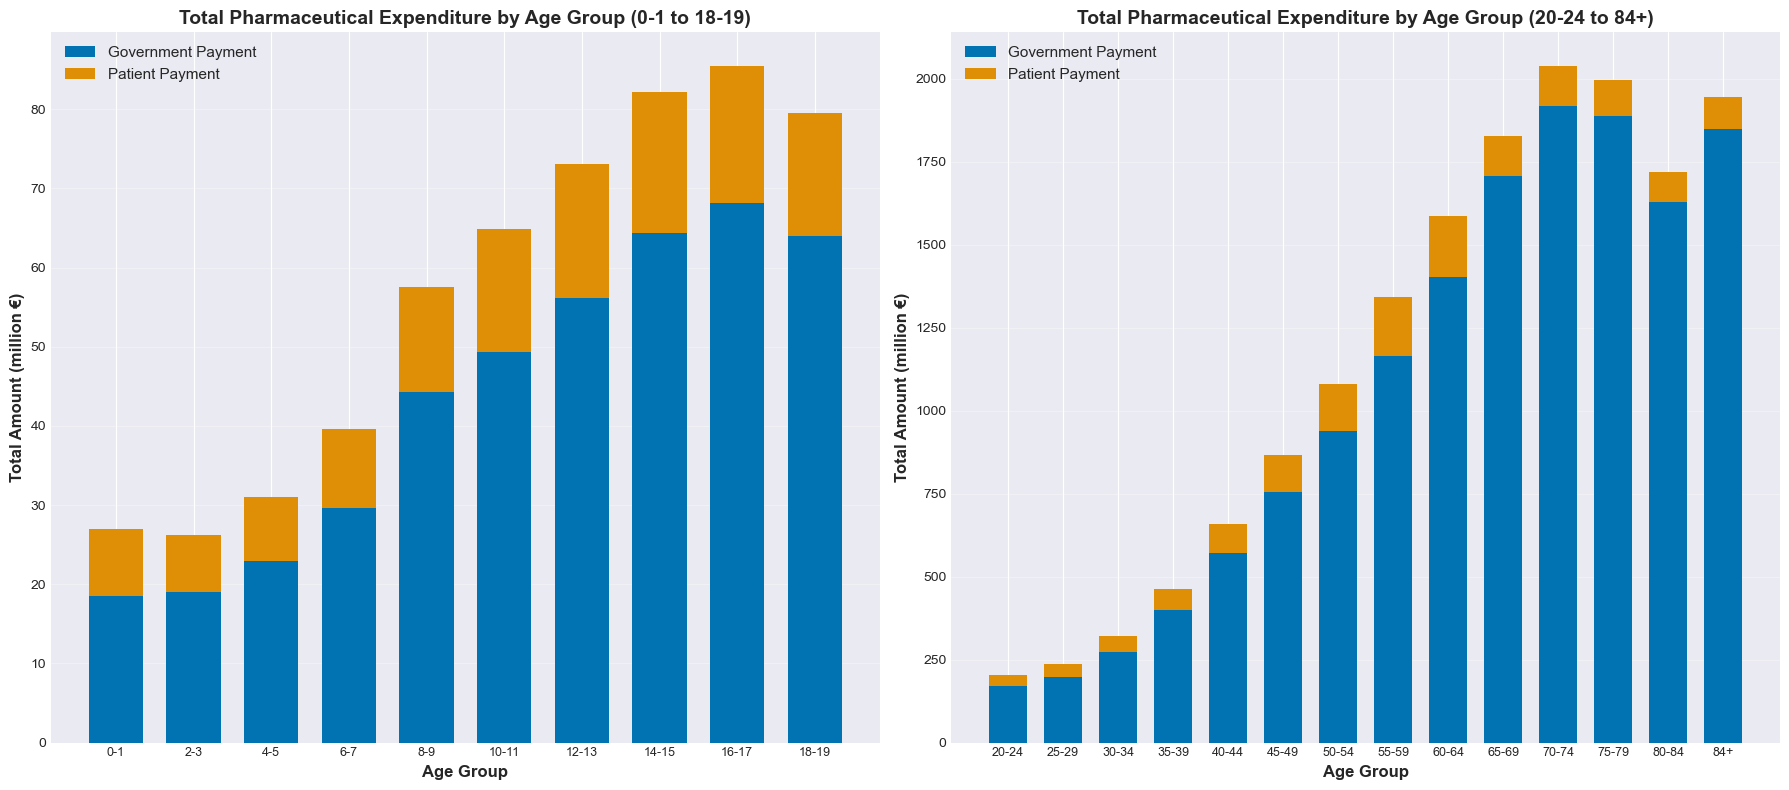

In [8]:
# Total expenditure by Age Group
age_order = ['0-1', '2-3', '4-5', '6-7', '8-9', '10-11', '12-13', '14-15', '16-17', '18-19', 
             '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', 
             '60-64', '65-69', '70-74', '75-79', '80-84', '84+']

age_totals = df.groupby("grup d'edat").agg({
    'import íntegre': 'sum',
    'import aportació CatSalut': 'sum'
}).reset_index()

age_totals.columns = ['Age Group', 'Total Cost', 'Government Payment']
age_totals['Patient Payment'] = age_totals['Total Cost'] - age_totals['Government Payment']

# Reorder by age
age_totals['Age Group'] = pd.Categorical(age_totals['Age Group'], categories=age_order, ordered=True)
age_totals = age_totals.sort_values('Age Group')

print("\nTotal Expenditure by Age Group (in millions €):")
print(age_totals[['Age Group', 'Total Cost', 'Government Payment', 'Patient Payment']].assign(
    **{col: age_totals[col] / 1_000_000 for col in ['Total Cost', 'Government Payment', 'Patient Payment']}
))

# Split into youth and adult age groups for better readability
youth_ages = ['0-1', '2-3', '4-5', '6-7', '8-9', '10-11', '12-13', '14-15', '16-17', '18-19']
adult_ages = ['20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', 
              '60-64', '65-69', '70-74', '75-79', '80-84', '84+']

age_totals_youth = age_totals[age_totals['Age Group'].isin(youth_ages)]
age_totals_adult = age_totals[age_totals['Age Group'].isin(adult_ages)]

# Plot with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
cb_colors = sns.color_palette("colorblind")

# Youth subplot (0-1 to 18-19)
x_youth = np.arange(len(age_totals_youth))
width = 0.7
ax1.bar(x_youth, age_totals_youth['Government Payment'] / 1_000_000, width, 
        label='Government Payment', color=cb_colors[0])
ax1.bar(x_youth, age_totals_youth['Patient Payment'] / 1_000_000, width, 
        bottom=age_totals_youth['Government Payment'] / 1_000_000, 
        label='Patient Payment', color=cb_colors[1])
ax1.set_ylabel('Total Amount (million €)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Age Group', fontsize=12, fontweight='bold')
ax1.set_title('Total Pharmaceutical Expenditure by Age Group (0-1 to 18-19)', fontsize=14, fontweight='bold')
ax1.set_xticks(x_youth)
ax1.set_xticklabels(age_totals_youth['Age Group'], rotation=0, ha='center', fontsize=9)
ax1.legend(fontsize=11)
ax1.grid(axis='y', alpha=0.3)

# Adult subplot (20-24 to 84+)
x_adult = np.arange(len(age_totals_adult))
ax2.bar(x_adult, age_totals_adult['Government Payment'] / 1_000_000, width, 
        label='Government Payment', color=cb_colors[0])
ax2.bar(x_adult, age_totals_adult['Patient Payment'] / 1_000_000, width, 
        bottom=age_totals_adult['Government Payment'] / 1_000_000, 
        label='Patient Payment', color=cb_colors[1])
ax2.set_ylabel('Total Amount (million €)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Age Group', fontsize=12, fontweight='bold')
ax2.set_title('Total Pharmaceutical Expenditure by Age Group (20-24 to 84+)', fontsize=14, fontweight='bold')
ax2.set_xticks(x_adult)
ax2.set_xticklabels(age_totals_adult['Age Group'], rotation=0, ha='center', fontsize=9)
ax2.legend(fontsize=11)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


Total Expenditure by Sanitary Region (in millions €):
                 Sanitary Region   Total Cost  Government Payment  Patient Payment
1                      BARCELONA  8887.587668         8057.841927       829.745741
7                         GIRONA  1672.420406         1513.037512       159.382895
5              CAMP DE TARRAGONA  1301.768549         1183.190008       118.578541
6              CATALUNYA CENTRAL  1130.466835         1030.883072        99.583763
3   BARCELONA METROPOLITANA NORD   960.344337          872.147657        88.196680
8                         LLEIDA   804.764128          734.842593        69.921535
2               BARCELONA CIUTAT   760.616456          689.466000        71.150457
4    BARCELONA METROPOLITANA SUD   535.323339          486.562129        48.761210
10              TERRES DE L'EBRE   440.971633          404.143789        36.827844
9                        PENEDÈS   220.396572          200.816513        19.580059
0             ALT PIRINEU i ARAN

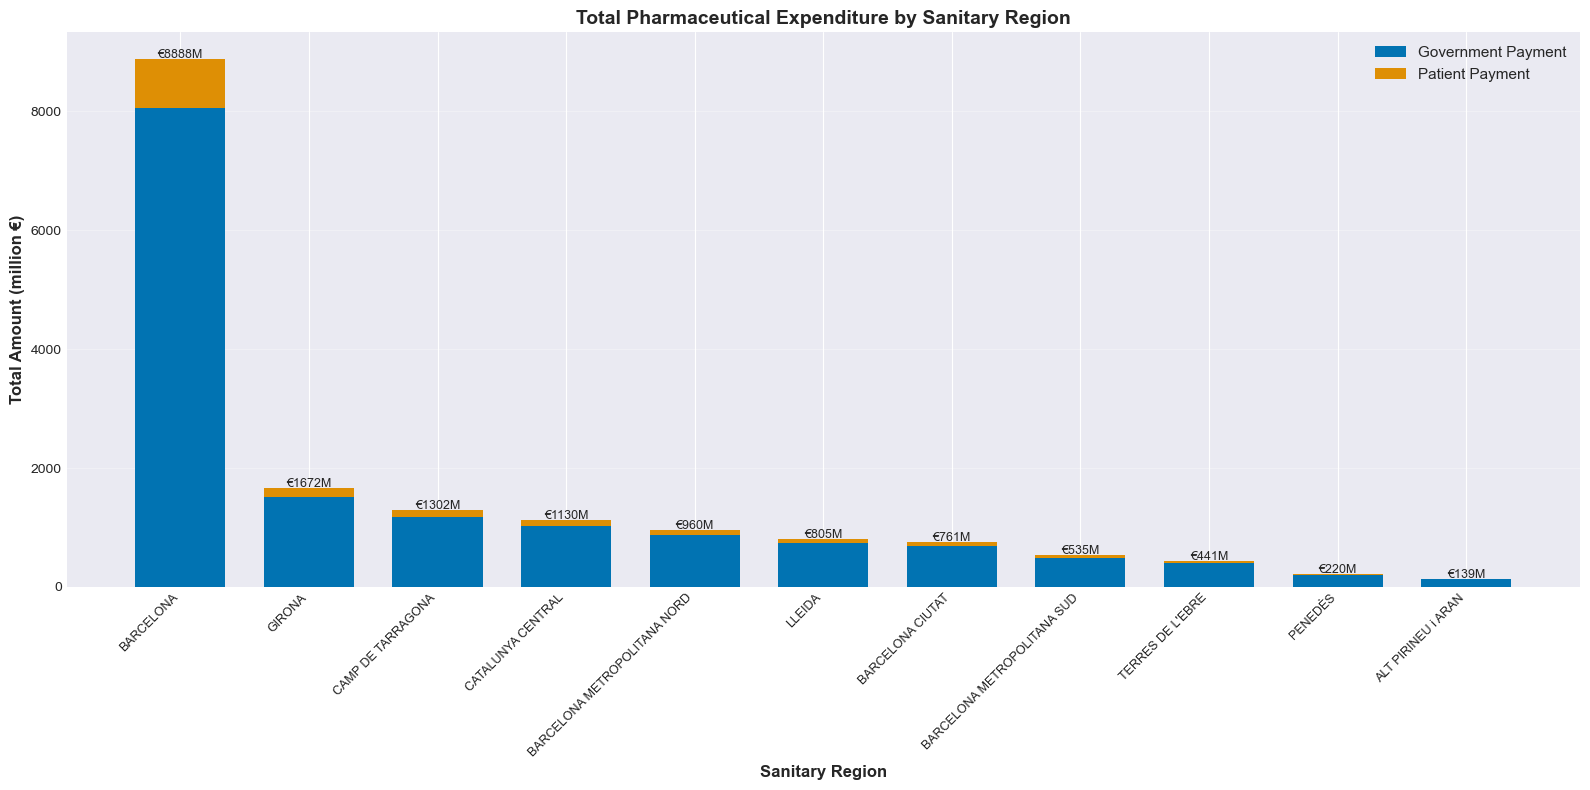

In [9]:
# Total expenditure by Sanitary Region
region_totals = df.groupby('regió sanitària').agg({
    'import íntegre': 'sum',
    'import aportació CatSalut': 'sum'
}).reset_index()

region_totals.columns = ['Sanitary Region', 'Total Cost', 'Government Payment']
region_totals['Patient Payment'] = region_totals['Total Cost'] - region_totals['Government Payment']
region_totals = region_totals.sort_values('Total Cost', ascending=False)

print("\nTotal Expenditure by Sanitary Region (in millions €):")
print(region_totals[['Sanitary Region', 'Total Cost', 'Government Payment', 'Patient Payment']].assign(
    **{col: region_totals[col] / 1_000_000 for col in ['Total Cost', 'Government Payment', 'Patient Payment']}
))

# Plot
fig, ax = plt.subplots(figsize=(16, 8))
x = np.arange(len(region_totals))
width = 0.7
cb_colors = sns.color_palette("colorblind")

p1 = ax.bar(x, region_totals['Government Payment'] / 1_000_000, width, label='Government Payment', color=cb_colors[0])
p2 = ax.bar(x, region_totals['Patient Payment'] / 1_000_000, width, bottom=region_totals['Government Payment'] / 1_000_000, label='Patient Payment', color=cb_colors[1])

ax.set_ylabel('Total Amount (million €)', fontsize=12, fontweight='bold')
ax.set_xlabel('Sanitary Region', fontsize=12, fontweight='bold')
ax.set_title('Total Pharmaceutical Expenditure by Sanitary Region', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(region_totals['Sanitary Region'], rotation=45, ha='right', fontsize=9)
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)

# Add total labels on top
for i, row in region_totals.iterrows():
    total = row['Total Cost'] / 1_000_000
    ax.text(x[region_totals.index.get_loc(i)], total + 10, f'€{total:.0f}M', ha='center', fontsize=9)


plt.tight_layout()
plt.show()


Total Expenditure by Sanitary Region (excluding Barcelona, in millions €):
                 Sanitary Region   Total Cost  Government Payment  Patient Payment
7                         GIRONA  1672.420406         1513.037512       159.382895
5              CAMP DE TARRAGONA  1301.768549         1183.190008       118.578541
6              CATALUNYA CENTRAL  1130.466835         1030.883072        99.583763
3   BARCELONA METROPOLITANA NORD   960.344337          872.147657        88.196680
8                         LLEIDA   804.764128          734.842593        69.921535
2               BARCELONA CIUTAT   760.616456          689.466000        71.150457
4    BARCELONA METROPOLITANA SUD   535.323339          486.562129        48.761210
10              TERRES DE L'EBRE   440.971633          404.143789        36.827844
9                        PENEDÈS   220.396572          200.816513        19.580059
0             ALT PIRINEU i ARAN   138.626245          124.973654        13.652592


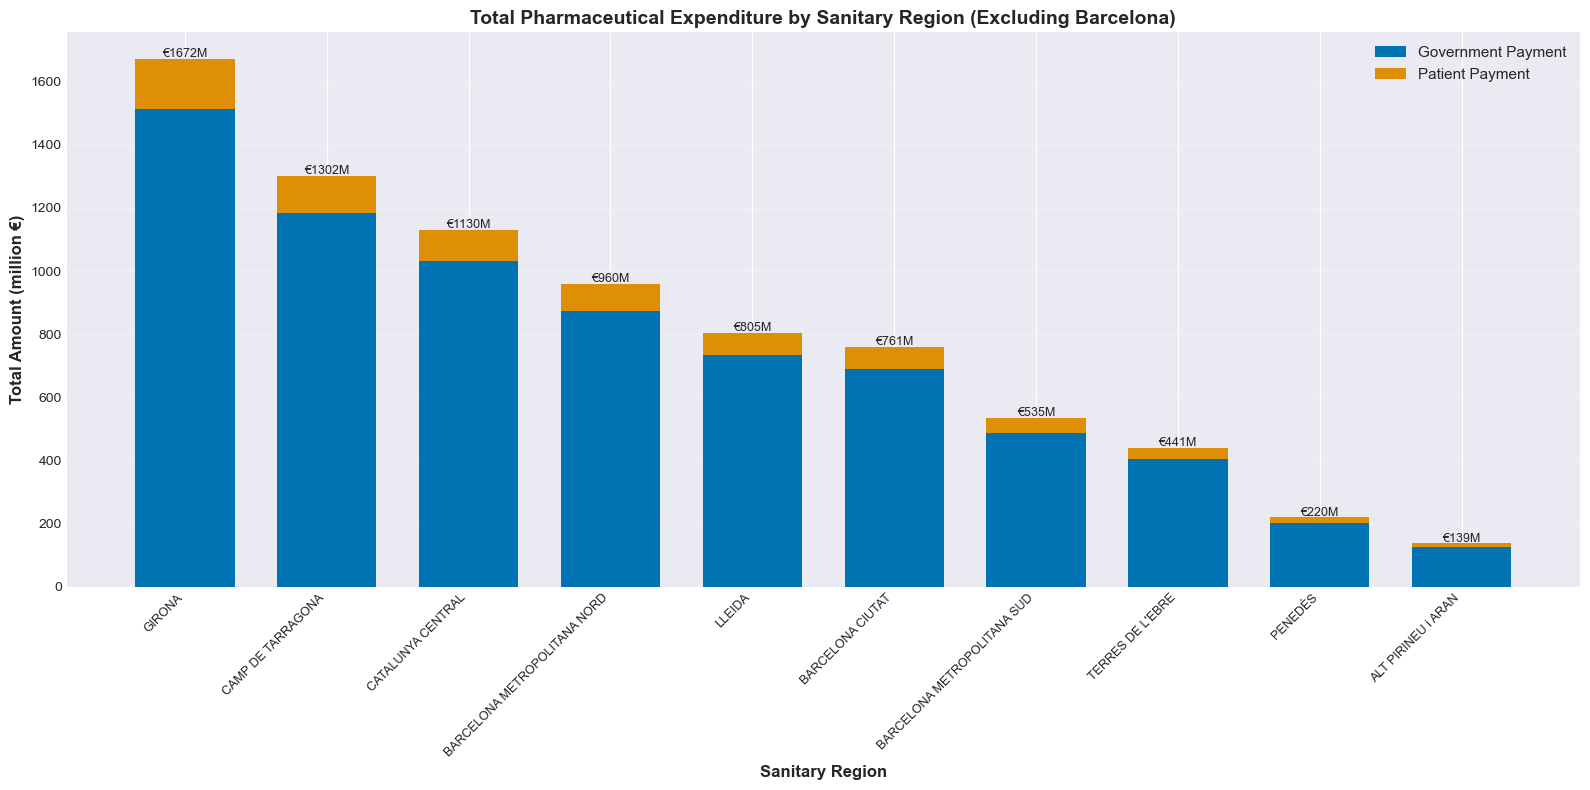

In [10]:
# Total expenditure by Sanitary Region (excluding Barcelona)
region_totals_no_bcn = region_totals[region_totals['Sanitary Region'] != 'BARCELONA']

print("\nTotal Expenditure by Sanitary Region (excluding Barcelona, in millions €):")
print(region_totals_no_bcn[['Sanitary Region', 'Total Cost', 'Government Payment', 'Patient Payment']].assign(
    **{col: region_totals_no_bcn[col] / 1_000_000 for col in ['Total Cost', 'Government Payment', 'Patient Payment']}
))

# Plot
fig, ax = plt.subplots(figsize=(16, 8))
x = np.arange(len(region_totals_no_bcn))
width = 0.7
cb_colors = sns.color_palette("colorblind")

p1 = ax.bar(x, region_totals_no_bcn['Government Payment'] / 1_000_000, width, label='Government Payment', color=cb_colors[0])
p2 = ax.bar(x, region_totals_no_bcn['Patient Payment'] / 1_000_000, width, bottom=region_totals_no_bcn['Government Payment'] / 1_000_000, label='Patient Payment', color=cb_colors[1])

ax.set_ylabel('Total Amount (million €)', fontsize=12, fontweight='bold')
ax.set_xlabel('Sanitary Region', fontsize=12, fontweight='bold')
ax.set_title('Total Pharmaceutical Expenditure by Sanitary Region (Excluding Barcelona)', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(region_totals_no_bcn['Sanitary Region'], rotation=45, ha='right', fontsize=9)
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)

# Add total labels on top
for i, (idx, row) in enumerate(region_totals_no_bcn.iterrows()):
    total = row['Total Cost'] / 1_000_000
    ax.text(i, total + 5, f'€{total:.0f}M', ha='center', fontsize=9)


plt.tight_layout()
plt.show()


Total Expenditure by ATC Level 1 (in millions €):
                                          ATC Level 1   Total Cost  Government Payment  Patient Payment
9                                      NERVOUS SYSTEM  4602.315790         4261.277866       341.037924
0                     ALIMENTARY TRACT AND METABOLISM  3127.342353         2892.653867       234.688486
5                               CARDIOVASCULAR SYSTEM  2580.587721         2283.013699       297.574022
10                                 RESPIRATORY SYSTEM  1529.169735         1399.935987       129.233748
4                      BLOOD AND BLOOD FORMING ORGANS  1385.316834         1300.033410        85.283424
2          ANTINEOPLASTIC AND IMMUNOMODULATING AGENTS   942.317004          914.432443        27.884561
7              GENITO-URINARY SYSTEM AND SEX HORMONES   721.746404          625.484937        96.261467
1                     ANTIINFECTIVES FOR SYSTEMIC USE   474.838272          340.157266       134.681007
8            

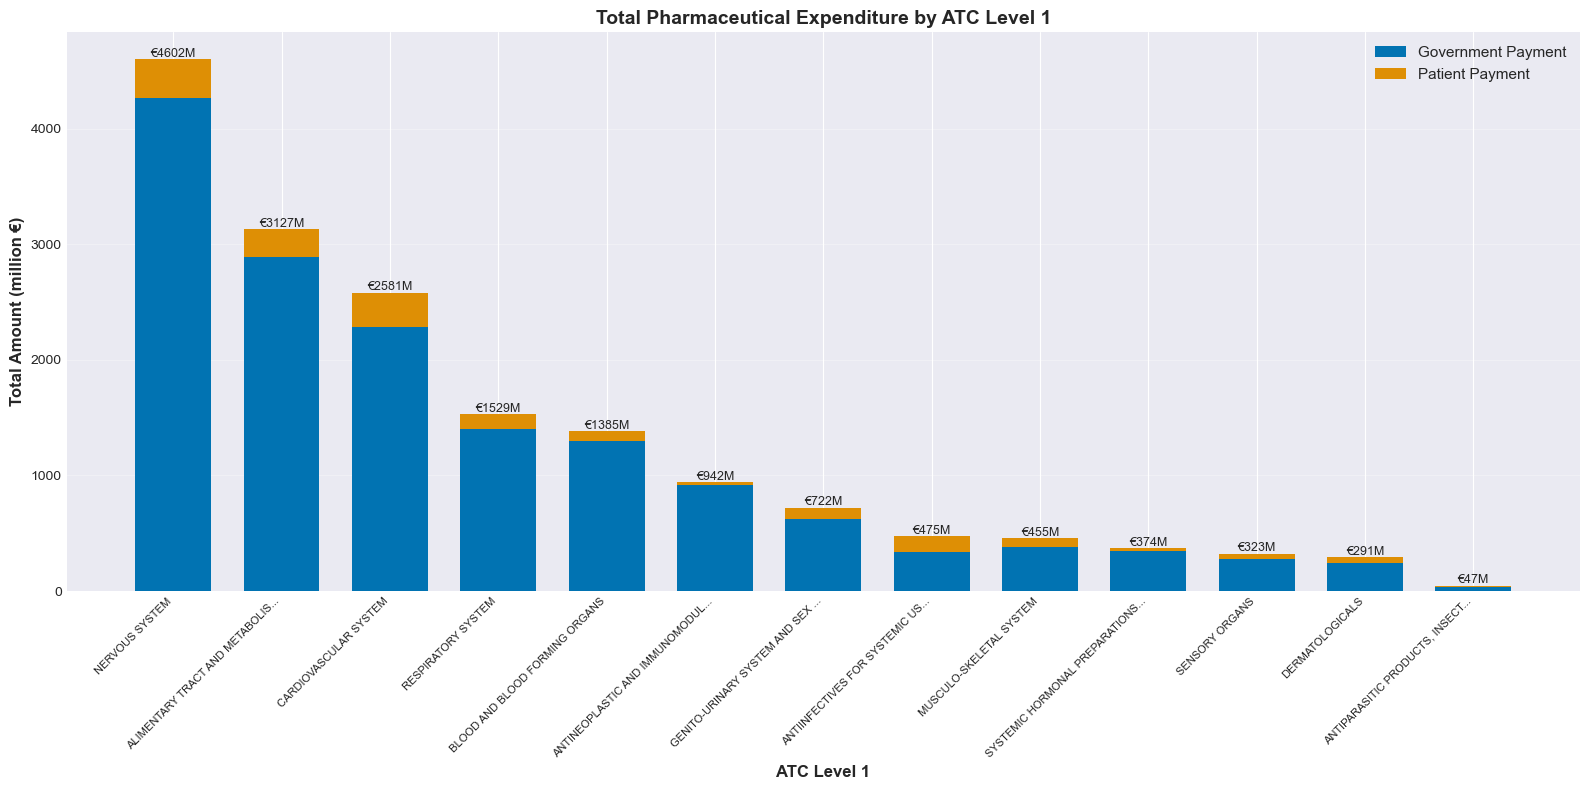

In [11]:
# Total expenditure by ATC Level 1
atc1_totals = df.groupby('grup ATC nivell 1').agg({
    'import íntegre': 'sum',
    'import aportació CatSalut': 'sum'
}).reset_index()

atc1_totals.columns = ['ATC Level 1', 'Total Cost', 'Government Payment']
atc1_totals['Patient Payment'] = atc1_totals['Total Cost'] - atc1_totals['Government Payment']
atc1_totals = atc1_totals.sort_values('Total Cost', ascending=False)

print("\nTotal Expenditure by ATC Level 1 (in millions €):")
print(atc1_totals[['ATC Level 1', 'Total Cost', 'Government Payment', 'Patient Payment']].assign(
    **{col: atc1_totals[col] / 1_000_000 for col in ['Total Cost', 'Government Payment', 'Patient Payment']}
))

# Plot
fig, ax = plt.subplots(figsize=(16, 8))
x = np.arange(len(atc1_totals))
width = 0.7
cb_colors = sns.color_palette("colorblind")

p1 = ax.bar(x, atc1_totals['Government Payment'] / 1_000_000, width, label='Government Payment', color=cb_colors[0])
p2 = ax.bar(x, atc1_totals['Patient Payment'] / 1_000_000, width, bottom=atc1_totals['Government Payment'] / 1_000_000, label='Patient Payment', color=cb_colors[1])

ax.set_ylabel('Total Amount (million €)', fontsize=12, fontweight='bold')
ax.set_xlabel('ATC Level 1', fontsize=12, fontweight='bold')
ax.set_title('Total Pharmaceutical Expenditure by ATC Level 1', fontsize=14, fontweight='bold')
ax.set_xticks(x)
# Use abbreviated labels that fit with rotation
abbreviated_labels = [label[:30] + '...' if len(label) > 30 else label for label in atc1_totals['ATC Level 1']]
ax.set_xticklabels(abbreviated_labels, rotation=45, ha='right', fontsize=8)
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)

# Add total labels on top
for i, row in atc1_totals.iterrows():
    total = row['Total Cost'] / 1_000_000
    ax.text(x[atc1_totals.index.get_loc(i)], total + 20, f'€{total:.0f}M', ha='center', fontsize=9)



plt.tight_layout()
plt.show()

## 3. Comparative Analysis: Sex x ATC Level 1

Total Expenditure by Sex and ATC Level 1 (in millions €):
sexe                                                        Men        Women
grup ATC nivell 1                                                           
NERVOUS SYSTEM                                      1961.226057  2641.089732
ALIMENTARY TRACT AND METABOLISM                     1585.623199  1541.719153
CARDIOVASCULAR SYSTEM                               1486.130672  1094.457049
RESPIRATORY SYSTEM                                   815.379626   713.790109
BLOOD AND BLOOD FORMING ORGANS                       688.748719   696.568115
GENITO-URINARY SYSTEM AND SEX HORMONES               471.129895   250.616510
ANTINEOPLASTIC AND IMMUNOMODULATING AGENTS           416.185556   526.131448
ANTIINFECTIVES FOR SYSTEMIC USE                      216.847674   257.990599
DERMATOLOGICALS                                      145.686292   145.021507
SENSORY ORGANS                                       142.298598   180.502707
MUSCULO-SKELETAL S

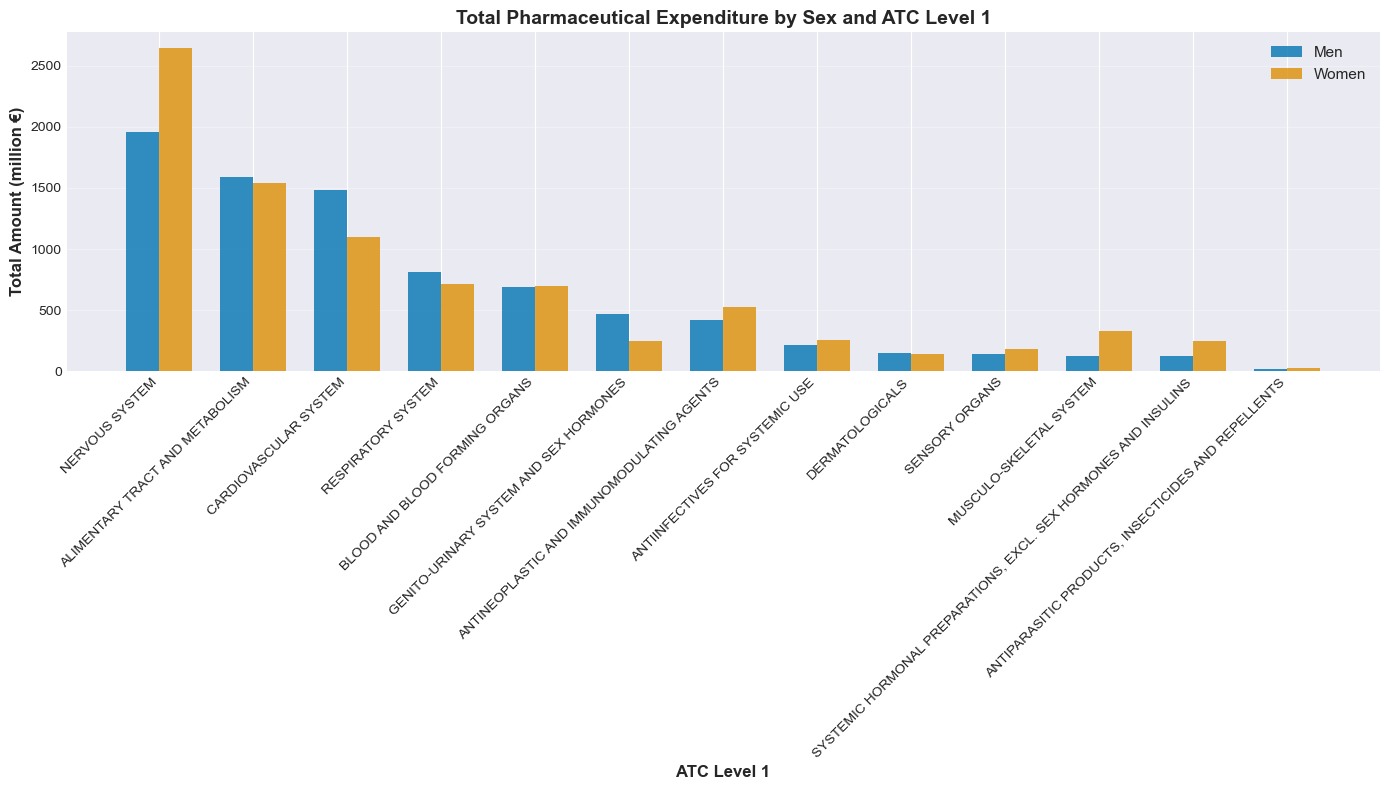

In [12]:
# Sex comparison for each ATC Level 1
sex_atc1 = df.groupby(['grup ATC nivell 1', 'sexe']).agg({
    'import íntegre': 'sum',
    'import aportació CatSalut': 'sum'
}).reset_index()

sex_atc1_pivot = sex_atc1.pivot(index='grup ATC nivell 1', columns='sexe', values='import íntegre')
sex_atc1_pivot = sex_atc1_pivot.sort_values(by=sex_atc1_pivot.columns[0], ascending=False)

print("Total Expenditure by Sex and ATC Level 1 (in millions €):")
print(sex_atc1_pivot / 1_000_000)

# Plot
fig, ax = plt.subplots(figsize=(14, 8))
sex_atc1_pivot_plot = sex_atc1_pivot / 1_000_000
x = np.arange(len(sex_atc1_pivot_plot))
width = 0.35
cb_colors = sns.color_palette("colorblind")

sexes = sex_atc1_pivot_plot.columns
for i, sex in enumerate(sexes):
    ax.bar(x + i*width, sex_atc1_pivot_plot[sex], width, label=sex, color=cb_colors[i], alpha=0.8)

ax.set_ylabel('Total Amount (million €)', fontsize=12, fontweight='bold')
ax.set_xlabel('ATC Level 1', fontsize=12, fontweight='bold')
ax.set_title('Total Pharmaceutical Expenditure by Sex and ATC Level 1', fontsize=14, fontweight='bold')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(sex_atc1_pivot_plot.index, rotation=45, ha='right')
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Comparative Analysis: Age Groups x ATC Level 1

Total Expenditure by Age Group for All ATC Level 1 (in millions €):
grup ATC nivell 1  NERVOUS SYSTEM  ALIMENTARY TRACT AND METABOLISM  CARDIOVASCULAR SYSTEM  RESPIRATORY SYSTEM  \
grup d'edat                                                                                                     
0-1                      3.038692                         6.905816               2.889981            3.768258   
2-3                      2.712835                         1.125500               1.161916            7.611300   
4-5                      3.254059                         1.348194               1.203823            8.713283   
6-7                      5.394430                         1.710870               1.766041            8.423809   
8-9                     11.123141                         2.387454               3.009003            8.695763   
10-11                   17.788466                         3.410817               4.307102            9.183293   
12-13                   25.0

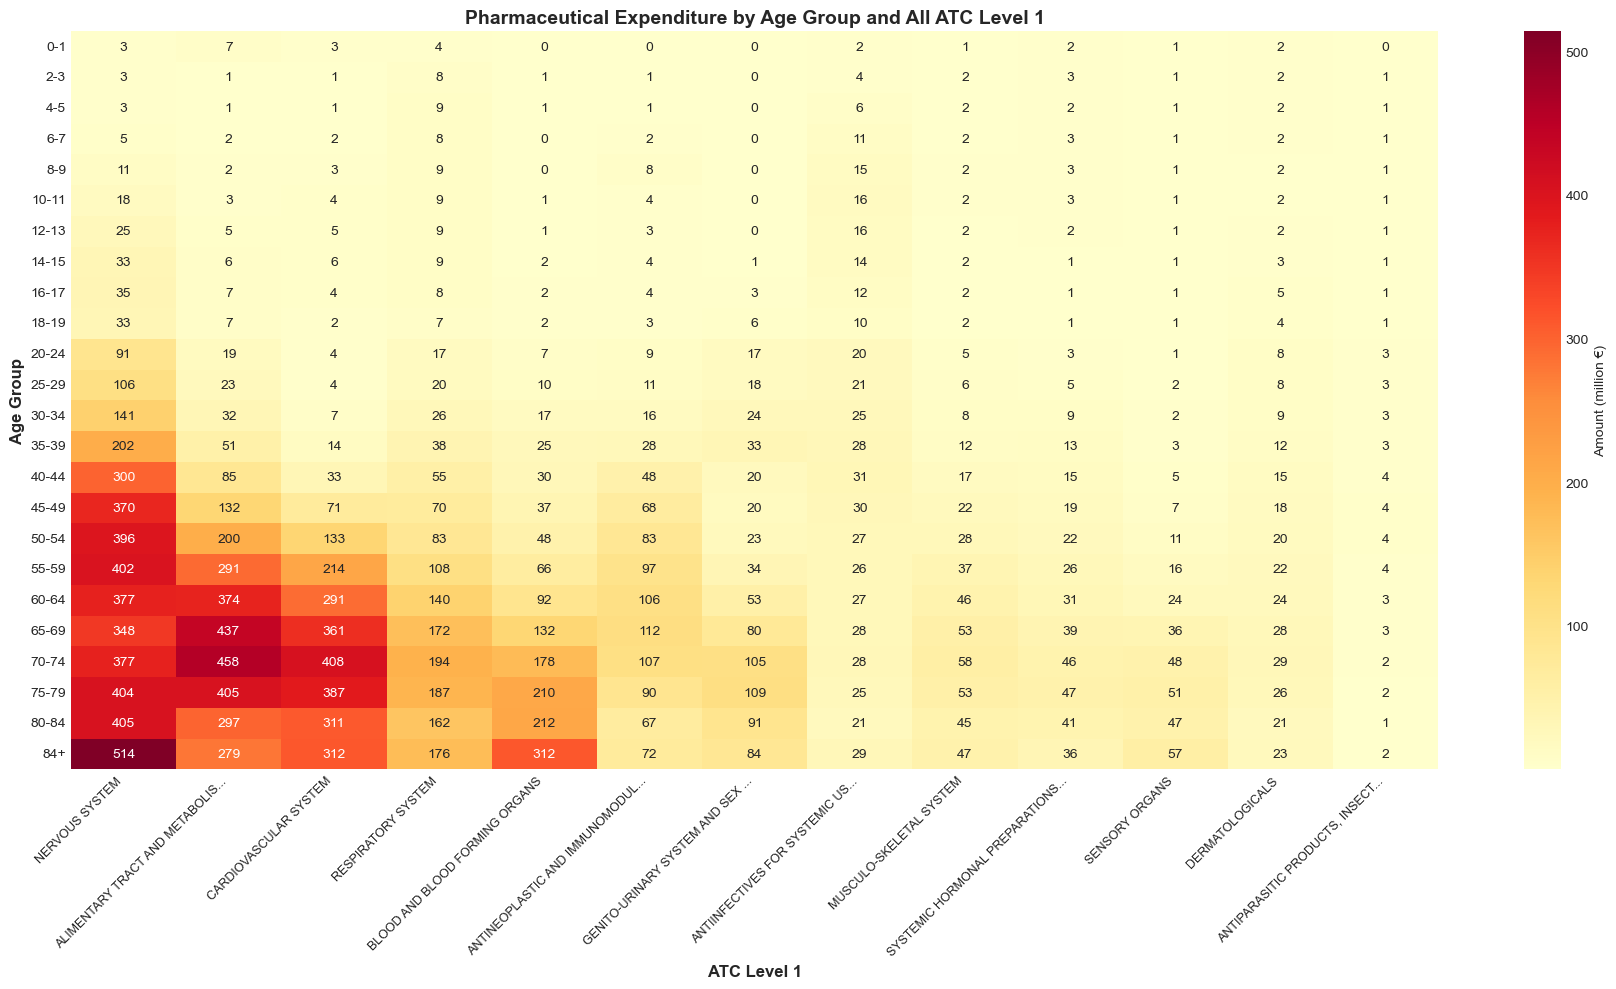

In [13]:
# Age Group comparison for all ATC Level 1 categories
age_atc1_all = df.groupby(["grup d'edat", 'grup ATC nivell 1']).agg({
    'import íntegre': 'sum'
}).reset_index()

# Order age groups
age_atc1_all["grup d'edat"] = pd.Categorical(age_atc1_all["grup d'edat"], categories=age_order, ordered=True)
age_atc1_all = age_atc1_all.sort_values("grup d'edat")

print("Total Expenditure by Age Group for All ATC Level 1 (in millions €):")

# Create a heatmap
pivot_data = age_atc1_all.pivot(index="grup d'edat", columns='grup ATC nivell 1', values='import íntegre') / 1_000_000
# Sort columns by total expenditure
column_order = pivot_data.sum().sort_values(ascending=False).index
pivot_data = pivot_data[column_order]
print(pivot_data)

fig, ax = plt.subplots(figsize=(18, 10))
# Use abbreviated column labels for better fit
abbreviated_cols = [col[:30] + '...' if len(col) > 30 else col for col in pivot_data.columns]
sns.heatmap(pivot_data, annot=True, fmt='.0f', cmap='YlOrRd', cbar_kws={'label': 'Amount (million €)'}, ax=ax, xticklabels=abbreviated_cols)
ax.set_title('Pharmaceutical Expenditure by Age Group and All ATC Level 1', fontsize=14, fontweight='bold')
ax.set_xlabel('ATC Level 1', fontsize=12, fontweight='bold')

ax.set_xlabel('ATC Level 1', fontsize=12, fontweight='bold')
ax.set_ylabel('Age Group', fontsize=12, fontweight='bold')
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=9)
plt.tight_layout()
plt.show()

## 5. Comparative Analysis: Sanitary Regions x ATC Level 1

Total Expenditure by Sanitary Region for All ATC Level 1 (in millions €):
grup ATC nivell 1             NERVOUS SYSTEM  ALIMENTARY TRACT AND METABOLISM  CARDIOVASCULAR SYSTEM  RESPIRATORY SYSTEM  \
regió sanitària                                                                                                            
BARCELONA                        2431.713067                      1596.608337            1350.457957          825.482849   
GIRONA                            472.024294                       281.264733             265.927874          154.397447   
CAMP DE TARRAGONA                 340.234174                       265.091107             205.328929          110.871642   
CATALUNYA CENTRAL                 346.811918                       198.047667             164.383070          101.942883   
BARCELONA METROPOLITANA NORD      247.203968                       200.687951             144.626771           85.625538   
LLEIDA                            233.553070              

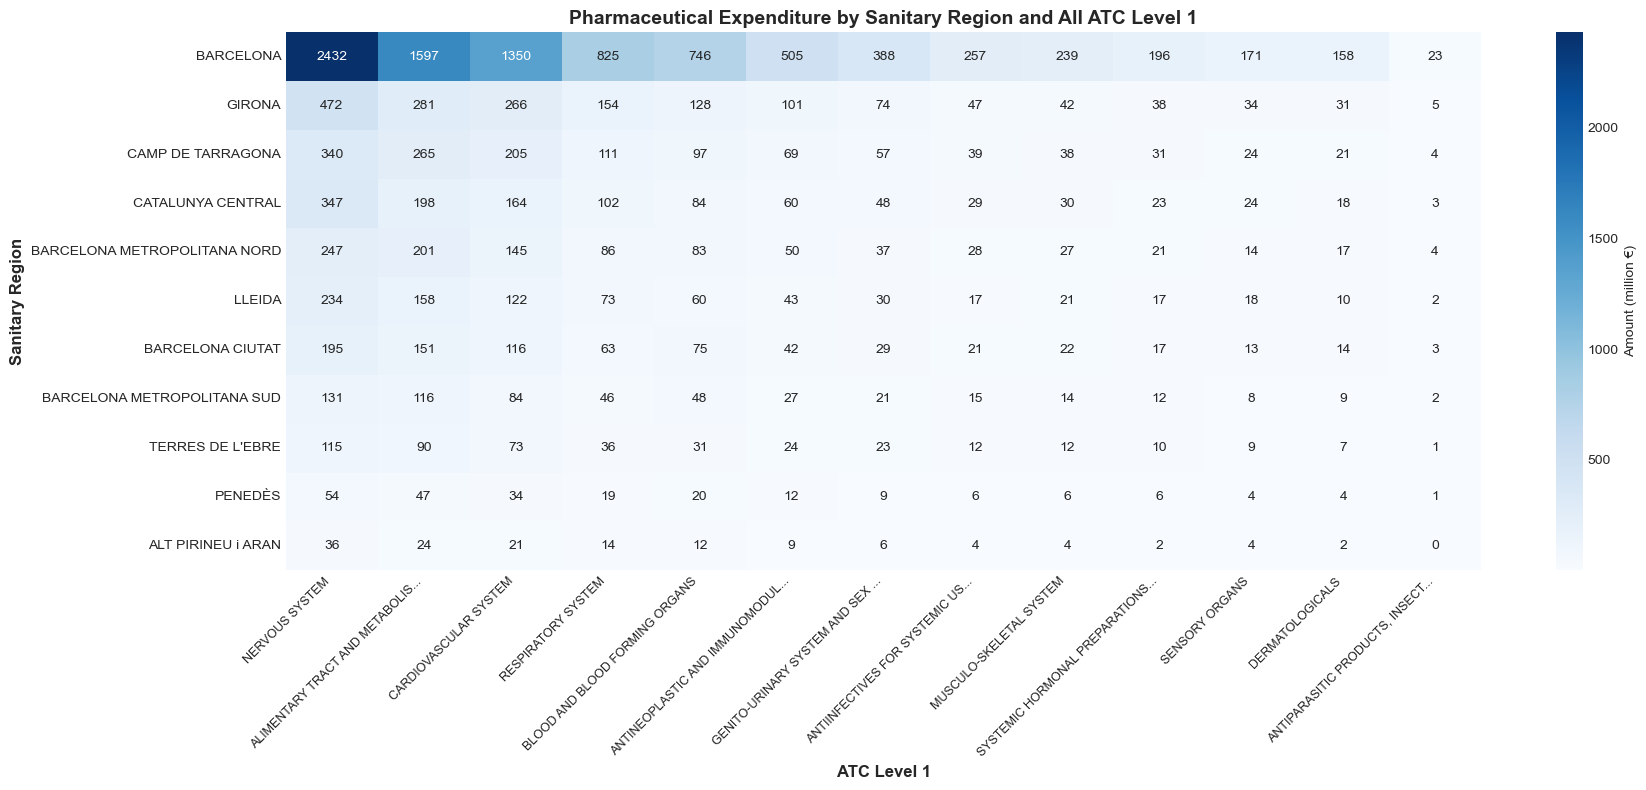

In [14]:
# Sanitary Region comparison for all ATC Level 1 categories
region_atc1_all = df.groupby(['regió sanitària', 'grup ATC nivell 1']).agg({
    'import íntegre': 'sum'
}).reset_index()

print("Total Expenditure by Sanitary Region for All ATC Level 1 (in millions €):")

# Create a heatmap
pivot_data_region = region_atc1_all.pivot(index='regió sanitària', columns='grup ATC nivell 1', values='import íntegre') / 1_000_000
# Sort columns by total expenditure
column_order_region = pivot_data_region.sum().sort_values(ascending=False).index
pivot_data_region = pivot_data_region[column_order_region]
# Sort rows by total
pivot_data_region['Total'] = pivot_data_region.sum(axis=1)
pivot_data_region = pivot_data_region.sort_values('Total', ascending=False).drop('Total', axis=1)

print(pivot_data_region)

fig, ax = plt.subplots(figsize=(18, 8))
# Use abbreviated column labels for better fit
abbreviated_cols_region = [col[:30] + '...' if len(col) > 30 else col for col in pivot_data_region.columns]
sns.heatmap(pivot_data_region, annot=True, fmt='.0f', cmap='Blues', cbar_kws={'label': 'Amount (million €)'}, ax=ax, xticklabels=abbreviated_cols_region)
ax.set_title('Pharmaceutical Expenditure by Sanitary Region and All ATC Level 1', fontsize=14, fontweight='bold')
ax.set_xlabel('ATC Level 1', fontsize=12, fontweight='bold')
ax.set_ylabel('Sanitary Region', fontsize=12, fontweight='bold')
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=9)
plt.tight_layout()
plt.show()


Total Expenditure by Sanitary Region for All ATC Level 1 (excluding BARCELONA, in millions €):
grup ATC nivell 1             NERVOUS SYSTEM  ALIMENTARY TRACT AND METABOLISM  CARDIOVASCULAR SYSTEM  RESPIRATORY SYSTEM  \
regió sanitària                                                                                                            
GIRONA                            472.024294                       281.264733             265.927874          154.397447   
CAMP DE TARRAGONA                 340.234174                       265.091107             205.328929          110.871642   
CATALUNYA CENTRAL                 346.811918                       198.047667             164.383070          101.942883   
BARCELONA METROPOLITANA NORD      247.203968                       200.687951             144.626771           85.625538   
LLEIDA                            233.553070                       157.658192             121.995022           73.101067   
BARCELONA CIUTAT                  19

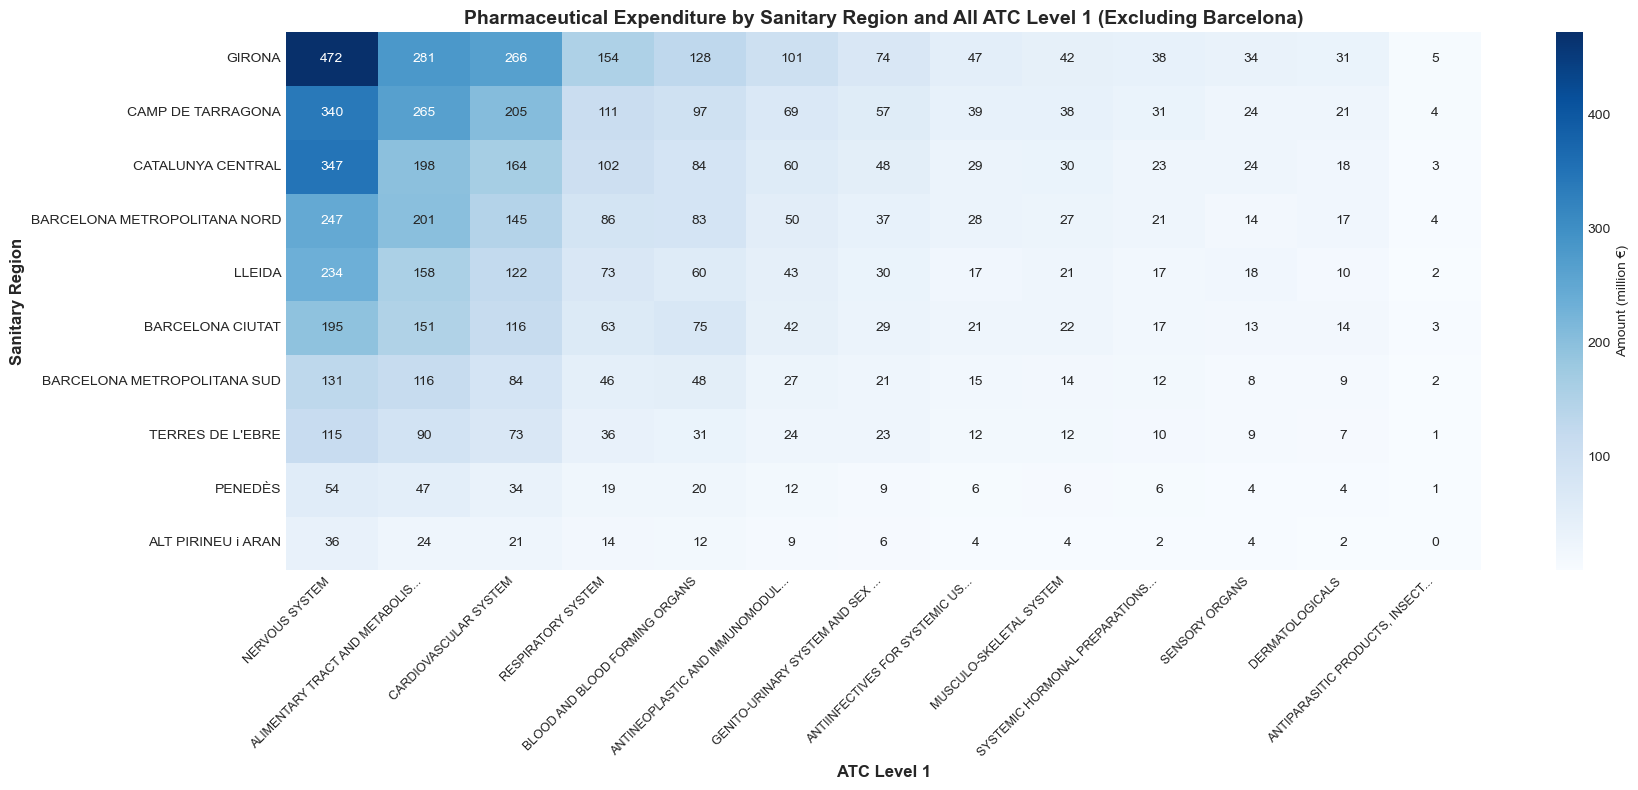

In [15]:
# Sanitary Region comparison for all ATC Level 1 categories (excluding BARCELONA)
region_atc1_no_bcn = df[df['regió sanitària'] != 'BARCELONA'].groupby(['regió sanitària', 'grup ATC nivell 1']).agg({
    'import íntegre': 'sum'
}).reset_index()

print("\nTotal Expenditure by Sanitary Region for All ATC Level 1 (excluding BARCELONA, in millions €):")

# Create a heatmap
pivot_data_region_no_bcn = region_atc1_no_bcn.pivot(index='regió sanitària', columns='grup ATC nivell 1', values='import íntegre') / 1_000_000
# Sort columns by total expenditure
column_order_region_no_bcn = pivot_data_region_no_bcn.sum().sort_values(ascending=False).index
pivot_data_region_no_bcn = pivot_data_region_no_bcn[column_order_region_no_bcn]
# Sort rows by total
pivot_data_region_no_bcn['Total'] = pivot_data_region_no_bcn.sum(axis=1)
pivot_data_region_no_bcn = pivot_data_region_no_bcn.sort_values('Total', ascending=False).drop('Total', axis=1)

print(pivot_data_region_no_bcn)

fig, ax = plt.subplots(figsize=(18, 8))
# Use abbreviated column labels for better fit
abbreviated_cols_region_no_bcn = [col[:30] + '...' if len(col) > 30 else col for col in pivot_data_region_no_bcn.columns]
sns.heatmap(pivot_data_region_no_bcn, annot=True, fmt='.0f', cmap='Blues', cbar_kws={'label': 'Amount (million €)'}, ax=ax, xticklabels=abbreviated_cols_region_no_bcn)
ax.set_title('Pharmaceutical Expenditure by Sanitary Region and All ATC Level 1 (Excluding Barcelona)', fontsize=14, fontweight='bold')
ax.set_xlabel('ATC Level 1', fontsize=12, fontweight='bold')
ax.set_ylabel('Sanitary Region', fontsize=12, fontweight='bold')
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=9)
plt.tight_layout()
plt.show()

## 6. Individual Analysis for Each ATC Level 1 Group


ANALYSIS FOR: NERVOUS SYSTEM

Total Cost: €4602.32M
Government Payment: €4261.28M (87.5%)
Patient Payment: €341.04M (12.5%)

Total Cost: €4602.32M
Government Payment: €4261.28M (87.5%)
Patient Payment: €341.04M (12.5%)


C:\Users\agos1\AppData\Local\Temp\ipykernel_9940\504635607.py:115: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



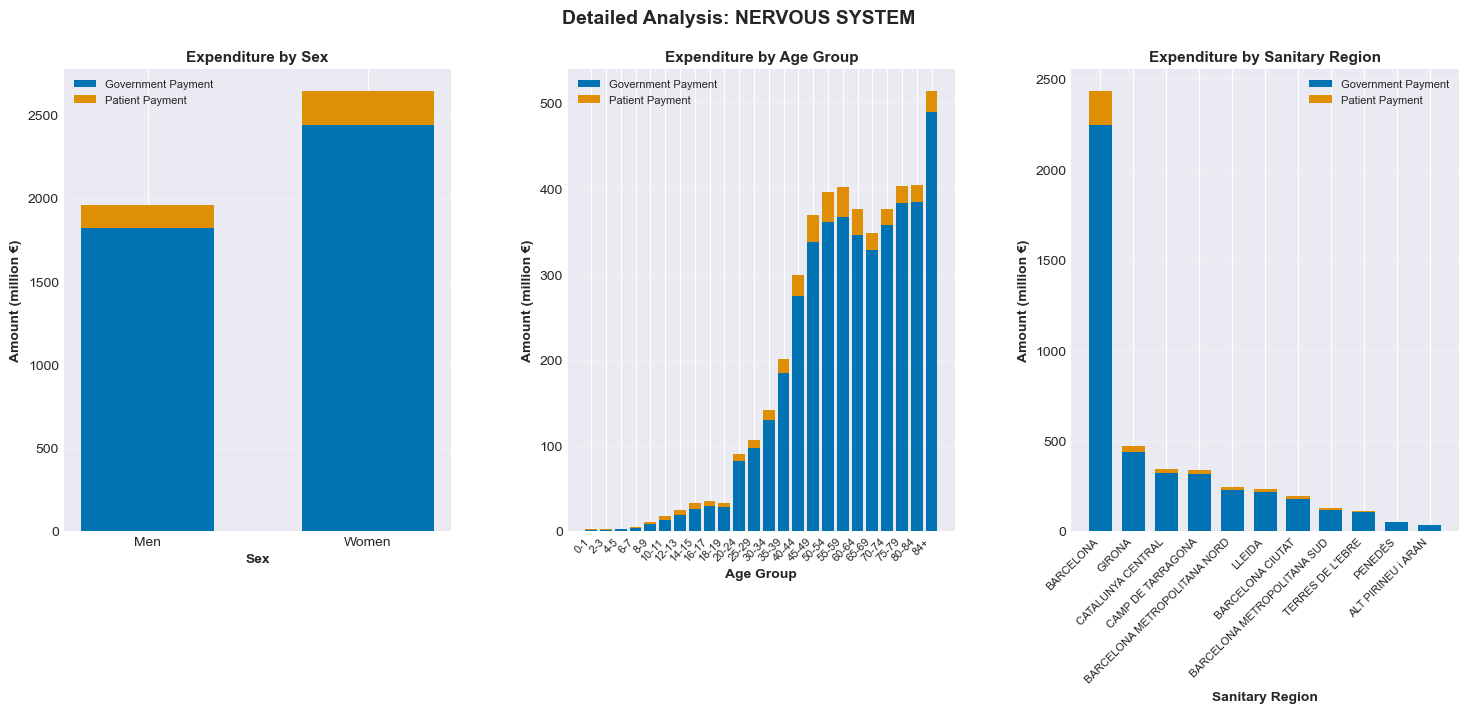


ANALYSIS FOR: ALIMENTARY TRACT AND METABOLISM

Total Cost: €3127.34M
Government Payment: €2892.65M (83.5%)
Patient Payment: €234.69M (16.5%)

Total Cost: €3127.34M
Government Payment: €2892.65M (83.5%)
Patient Payment: €234.69M (16.5%)


C:\Users\agos1\AppData\Local\Temp\ipykernel_9940\504635607.py:115: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



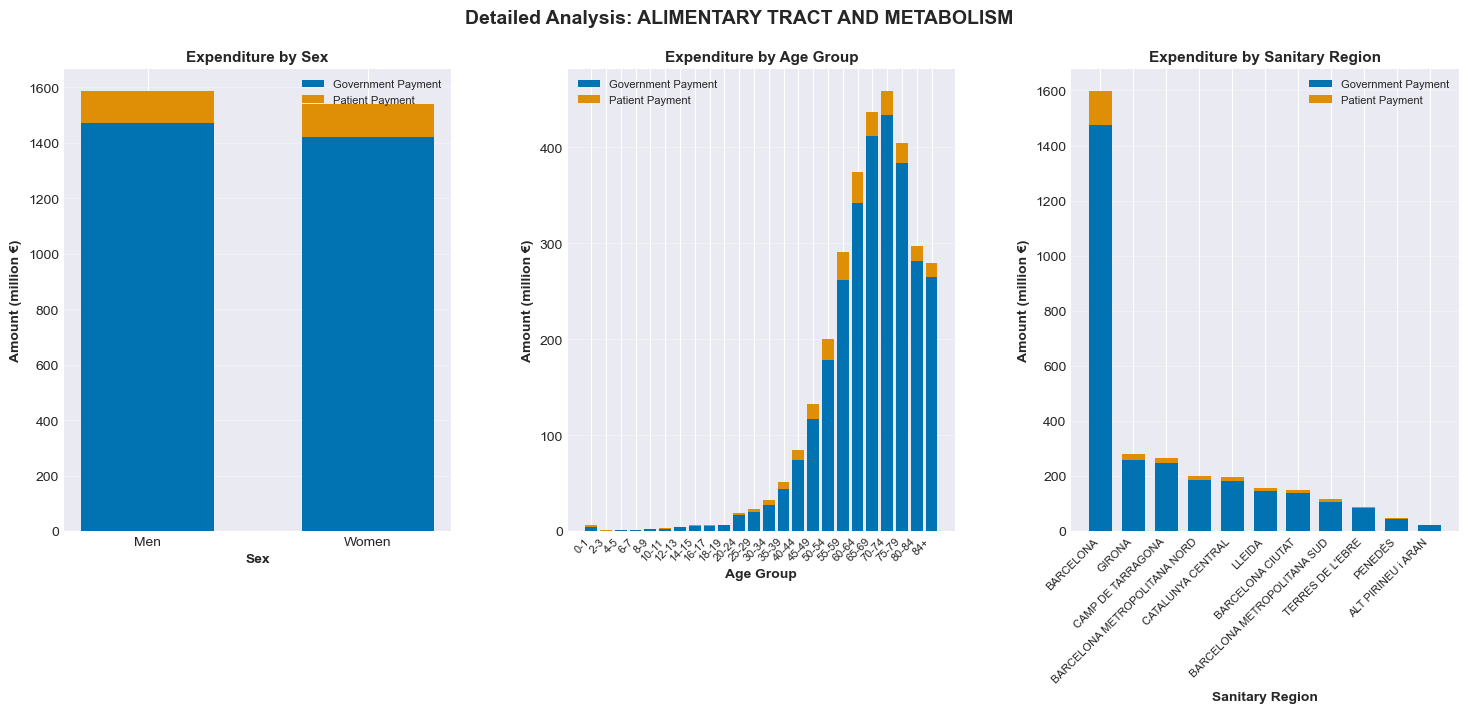


ANALYSIS FOR: CARDIOVASCULAR SYSTEM

Total Cost: €2580.59M
Government Payment: €2283.01M (87.4%)
Patient Payment: €297.57M (12.6%)

Total Cost: €2580.59M
Government Payment: €2283.01M (87.4%)
Patient Payment: €297.57M (12.6%)


C:\Users\agos1\AppData\Local\Temp\ipykernel_9940\504635607.py:115: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



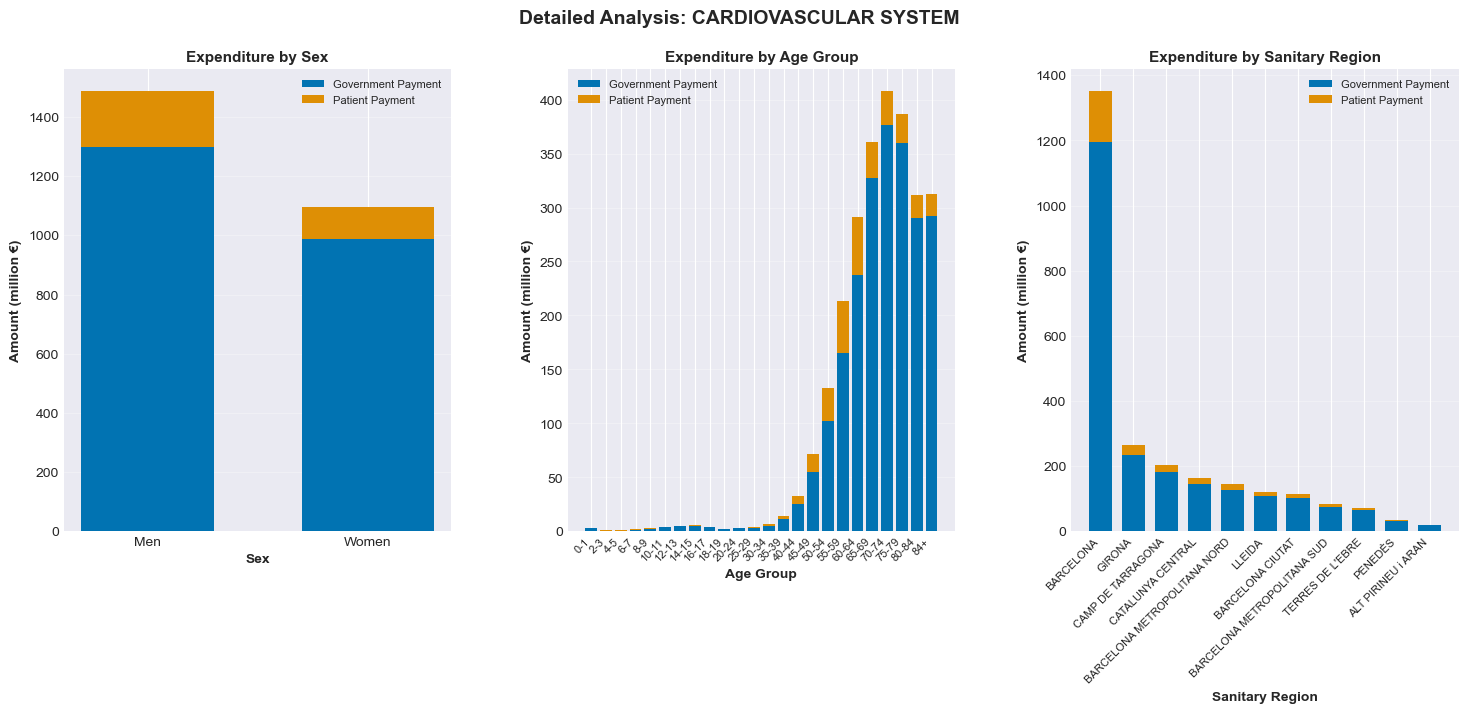


ANALYSIS FOR: RESPIRATORY SYSTEM

Total Cost: €1529.17M
Government Payment: €1399.94M (82.4%)
Patient Payment: €129.23M (17.6%)

Total Cost: €1529.17M
Government Payment: €1399.94M (82.4%)
Patient Payment: €129.23M (17.6%)


C:\Users\agos1\AppData\Local\Temp\ipykernel_9940\504635607.py:115: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



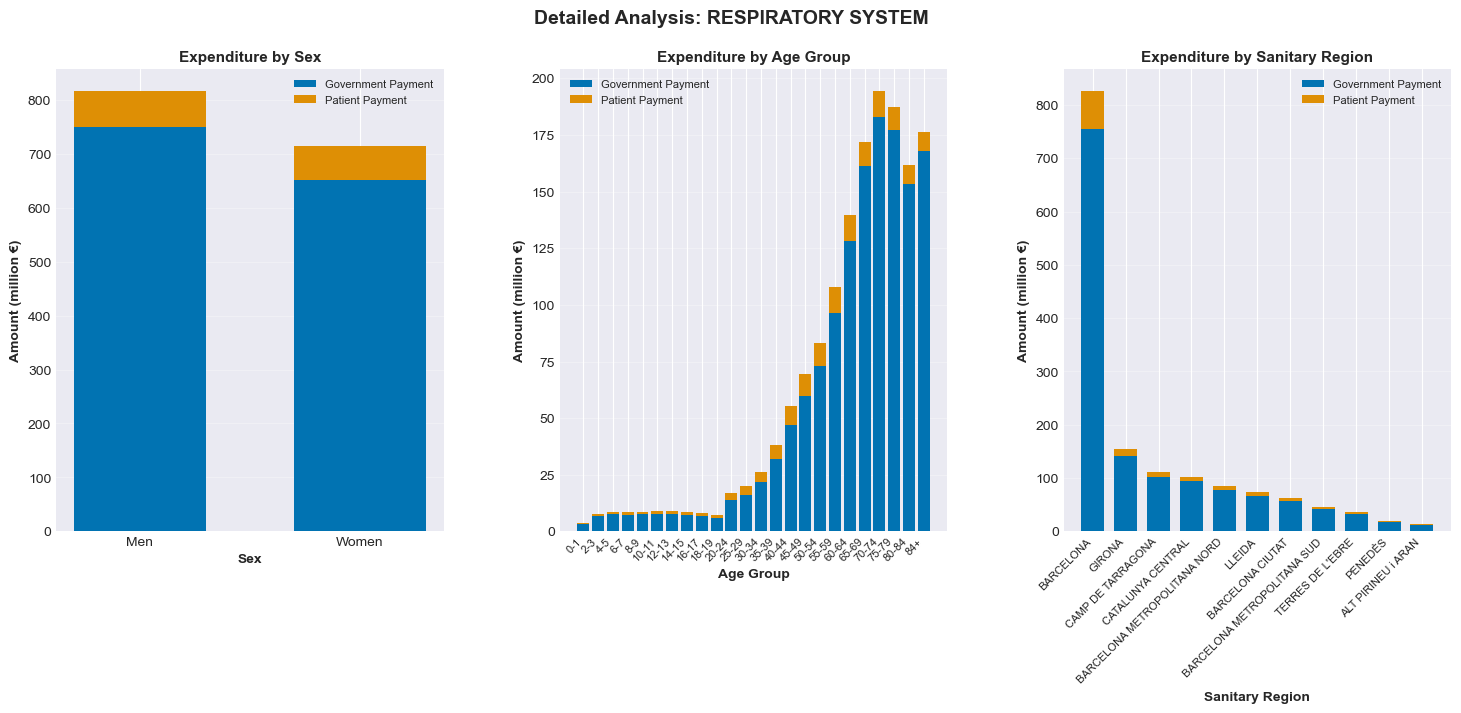


ANALYSIS FOR: BLOOD AND BLOOD FORMING ORGANS

Total Cost: €1385.32M
Government Payment: €1300.03M (84.0%)
Patient Payment: €85.28M (16.0%)


C:\Users\agos1\AppData\Local\Temp\ipykernel_9940\504635607.py:115: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



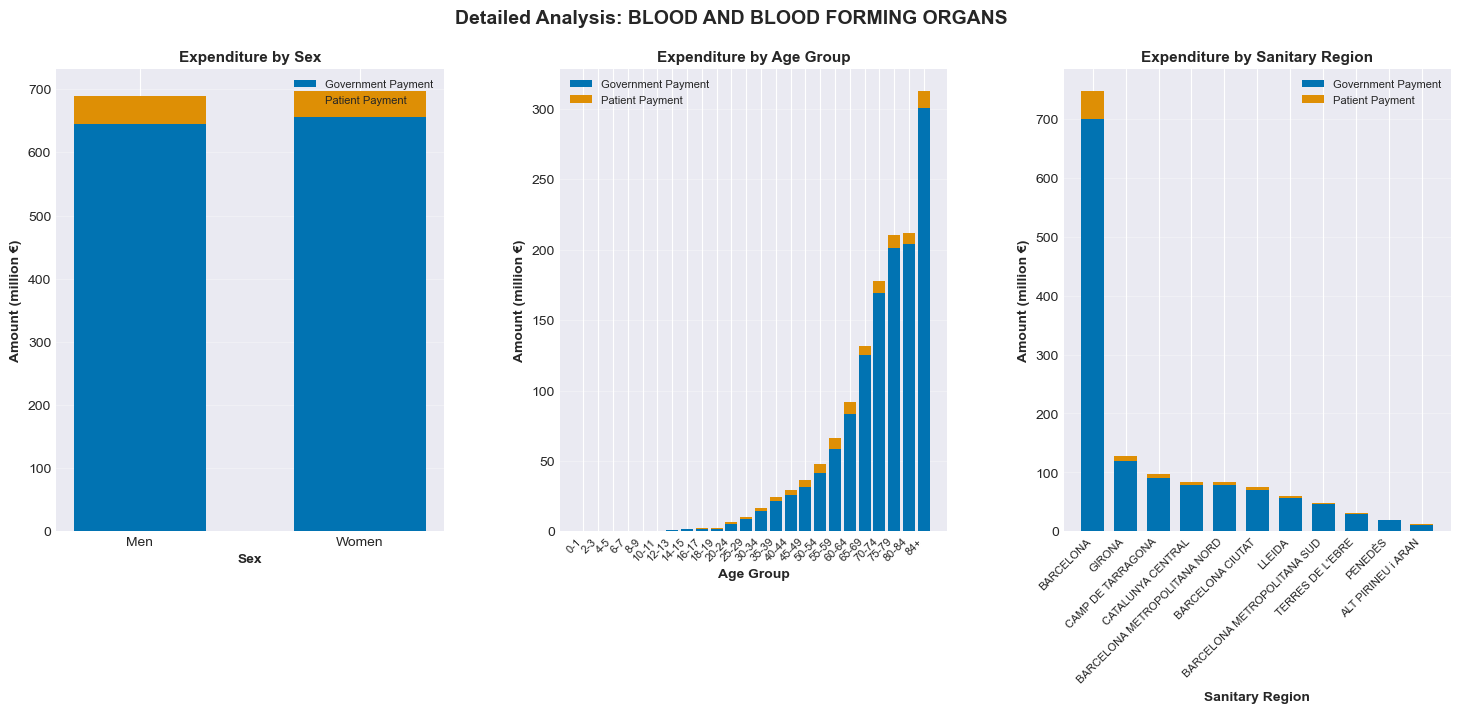


ANALYSIS FOR: ANTINEOPLASTIC AND IMMUNOMODULATING AGENTS

Total Cost: €942.32M
Government Payment: €914.43M (95.4%)
Patient Payment: €27.88M (4.6%)


C:\Users\agos1\AppData\Local\Temp\ipykernel_9940\504635607.py:115: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



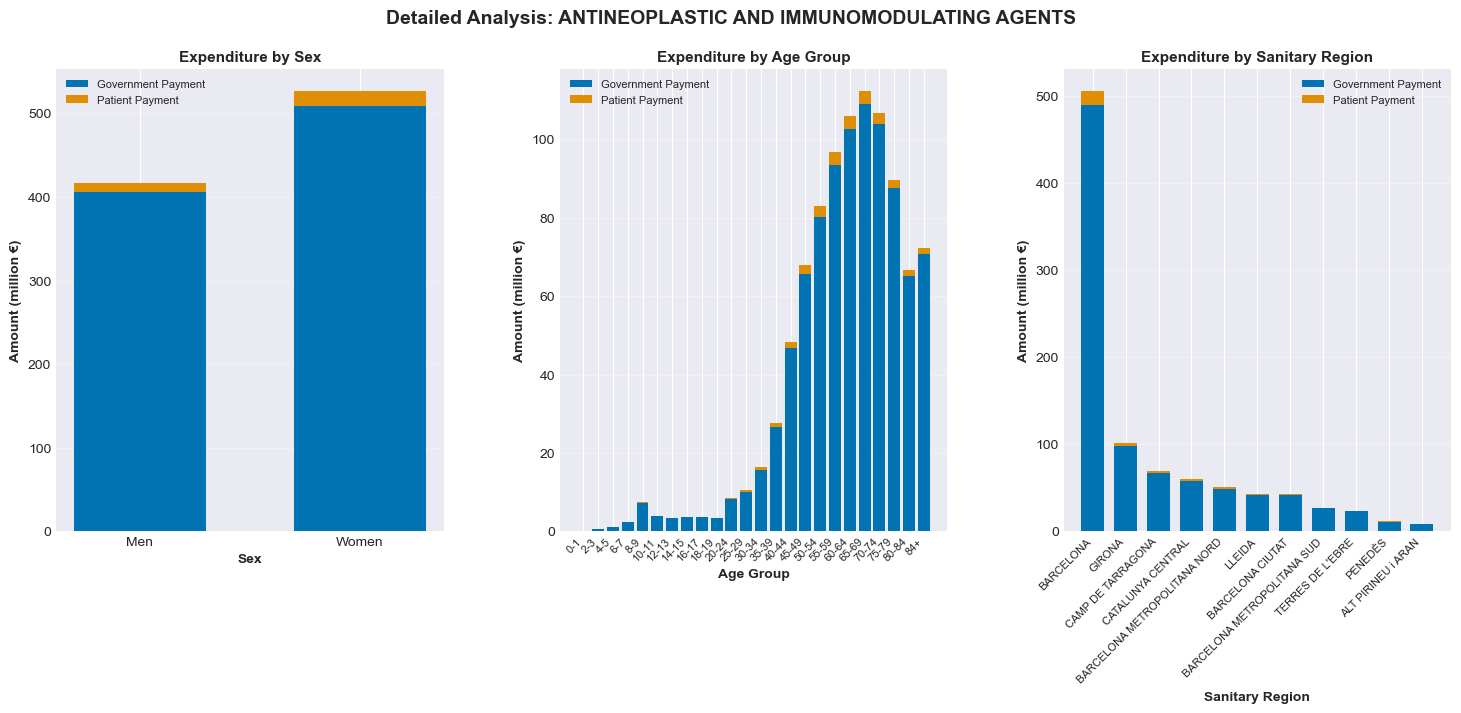


ANALYSIS FOR: GENITO-URINARY SYSTEM AND SEX HORMONES

Total Cost: €721.75M
Government Payment: €625.48M (81.2%)
Patient Payment: €96.26M (18.8%)


C:\Users\agos1\AppData\Local\Temp\ipykernel_9940\504635607.py:115: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



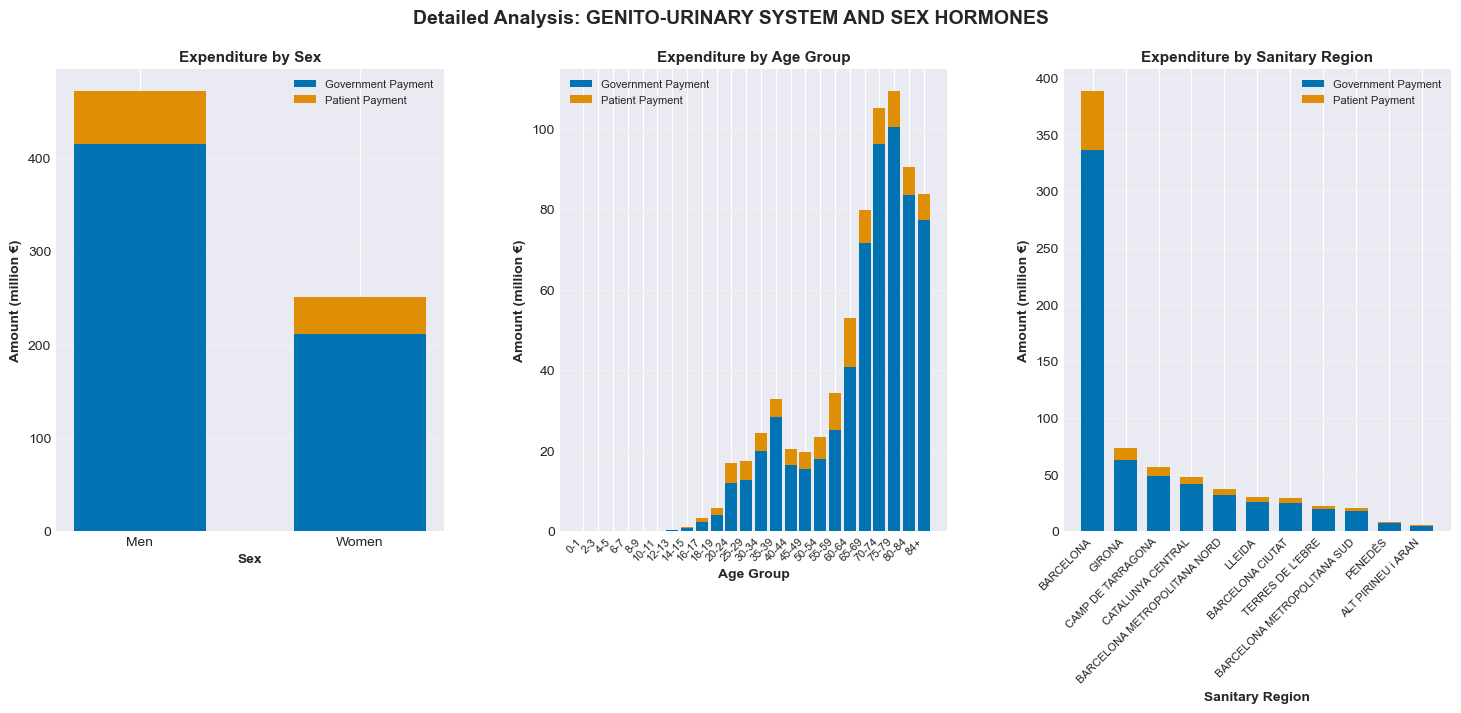


ANALYSIS FOR: ANTIINFECTIVES FOR SYSTEMIC USE

Total Cost: €474.84M
Government Payment: €340.16M (73.2%)
Patient Payment: €134.68M (26.8%)

Total Cost: €474.84M
Government Payment: €340.16M (73.2%)
Patient Payment: €134.68M (26.8%)


C:\Users\agos1\AppData\Local\Temp\ipykernel_9940\504635607.py:115: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



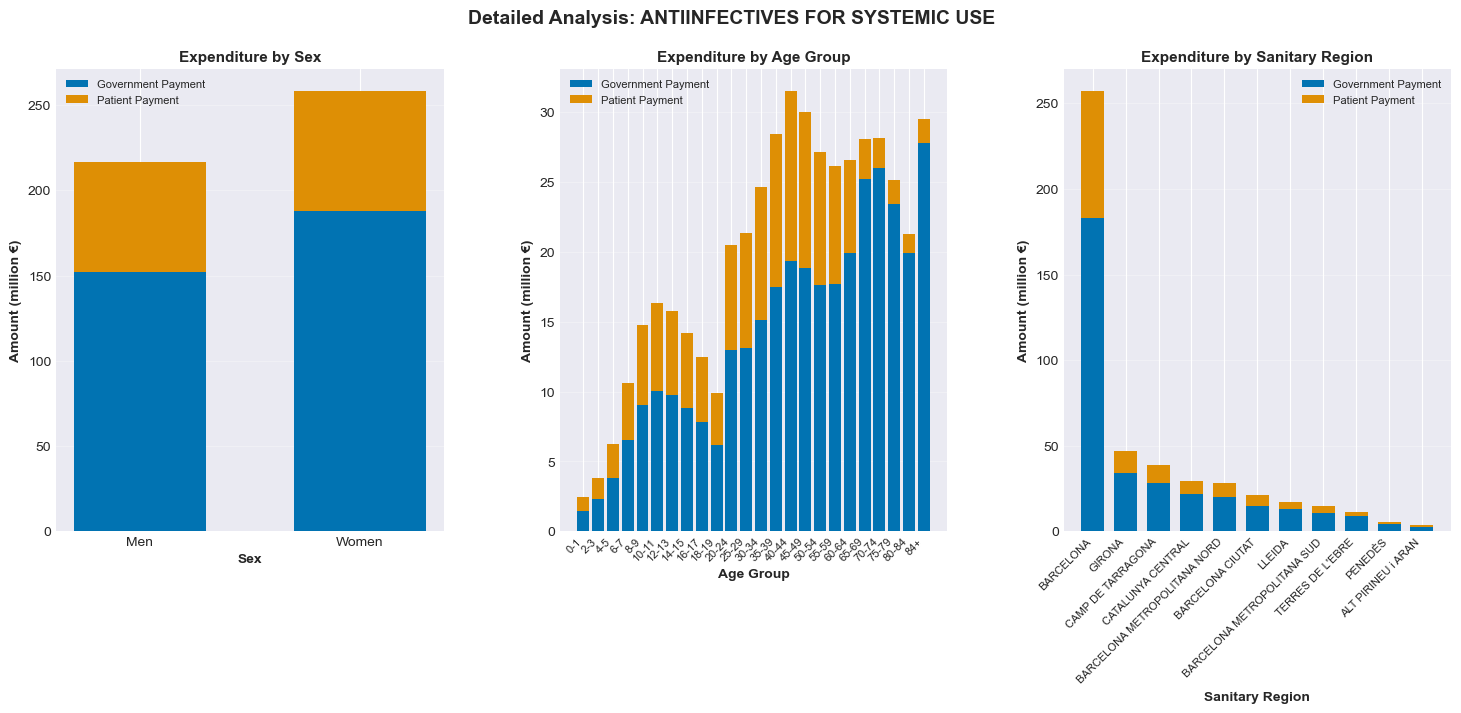


ANALYSIS FOR: MUSCULO-SKELETAL SYSTEM

Total Cost: €455.39M
Government Payment: €377.65M (78.4%)
Patient Payment: €77.74M (21.6%)


C:\Users\agos1\AppData\Local\Temp\ipykernel_9940\504635607.py:115: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



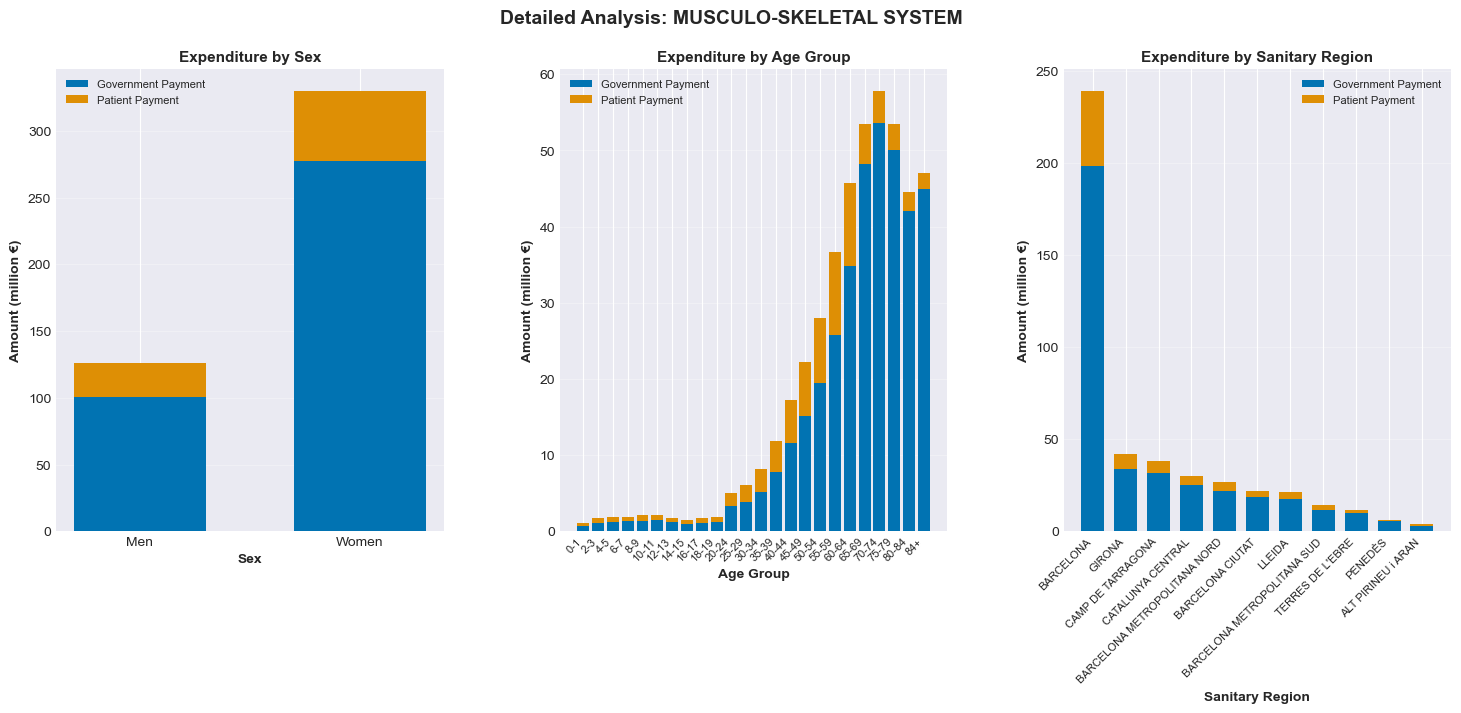


ANALYSIS FOR: SYSTEMIC HORMONAL PREPARATIONS, EXCL. SEX HORMONES AND INSULINS

Total Cost: €373.54M
Government Payment: €346.15M (87.3%)
Patient Payment: €27.40M (12.7%)


C:\Users\agos1\AppData\Local\Temp\ipykernel_9940\504635607.py:115: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



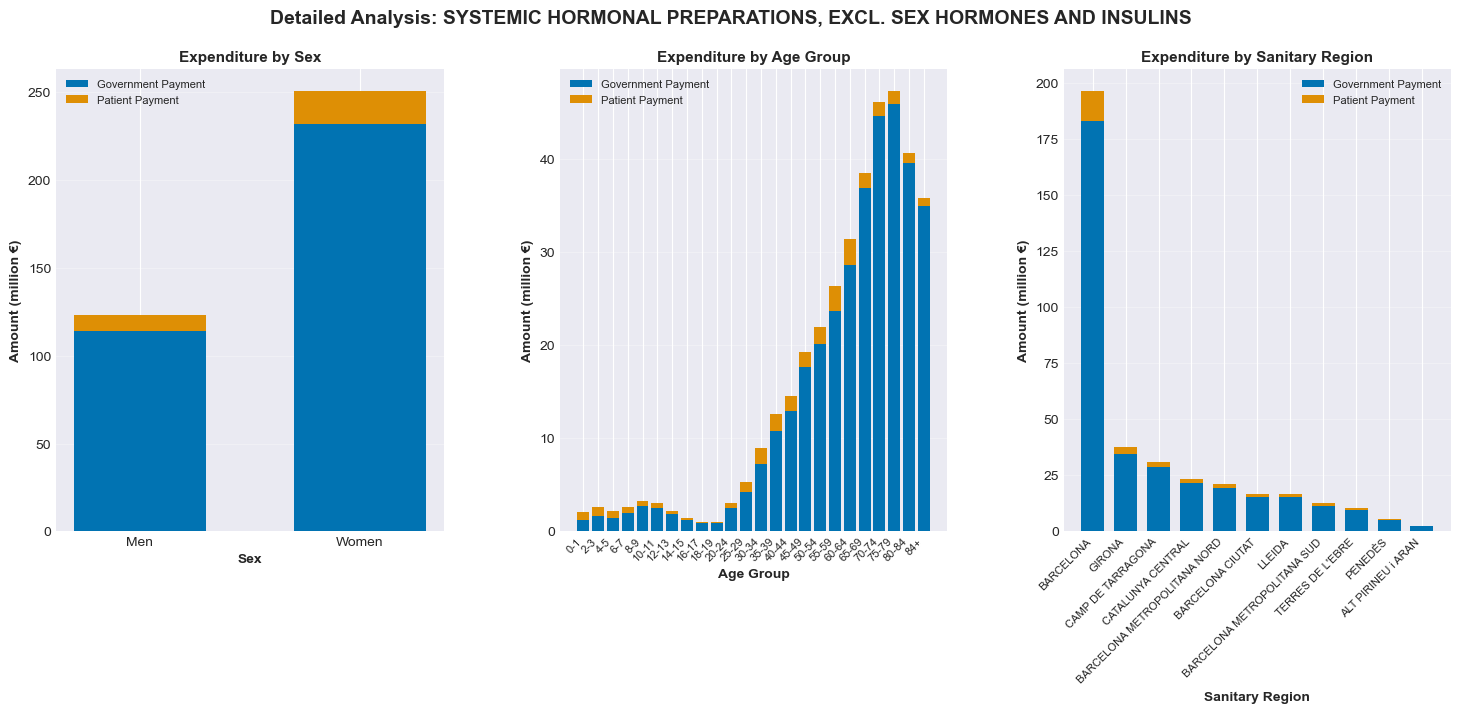


ANALYSIS FOR: SENSORY ORGANS

Total Cost: €322.80M
Government Payment: €276.88M (73.7%)
Patient Payment: €45.92M (26.3%)

Total Cost: €322.80M
Government Payment: €276.88M (73.7%)
Patient Payment: €45.92M (26.3%)


C:\Users\agos1\AppData\Local\Temp\ipykernel_9940\504635607.py:115: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



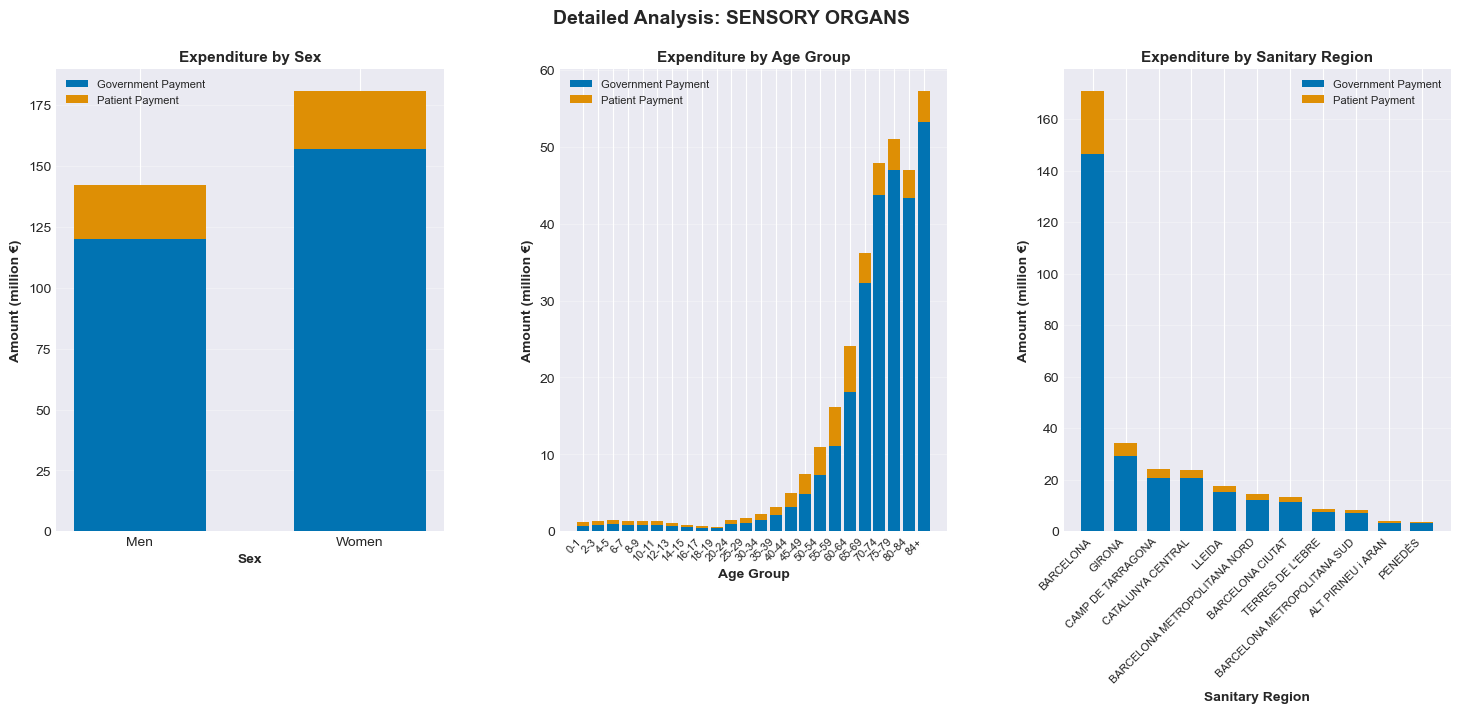


ANALYSIS FOR: DERMATOLOGICALS

Total Cost: €290.71M
Government Payment: €242.07M (75.4%)
Patient Payment: €48.63M (24.6%)


C:\Users\agos1\AppData\Local\Temp\ipykernel_9940\504635607.py:115: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



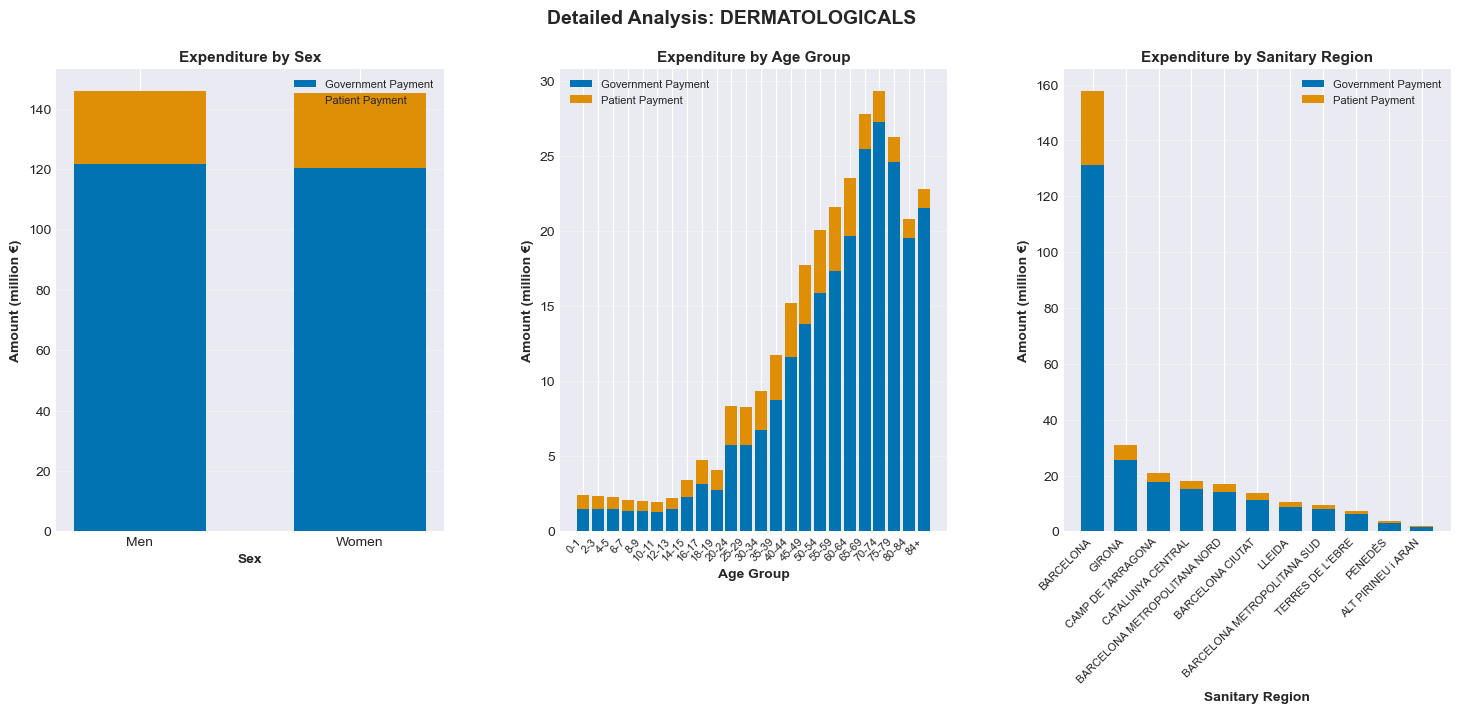


ANALYSIS FOR: ANTIPARASITIC PRODUCTS, INSECTICIDES AND REPELLENTS

Total Cost: €47.21M
Government Payment: €38.17M (76.1%)
Patient Payment: €9.04M (23.9%)


C:\Users\agos1\AppData\Local\Temp\ipykernel_9940\504635607.py:115: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



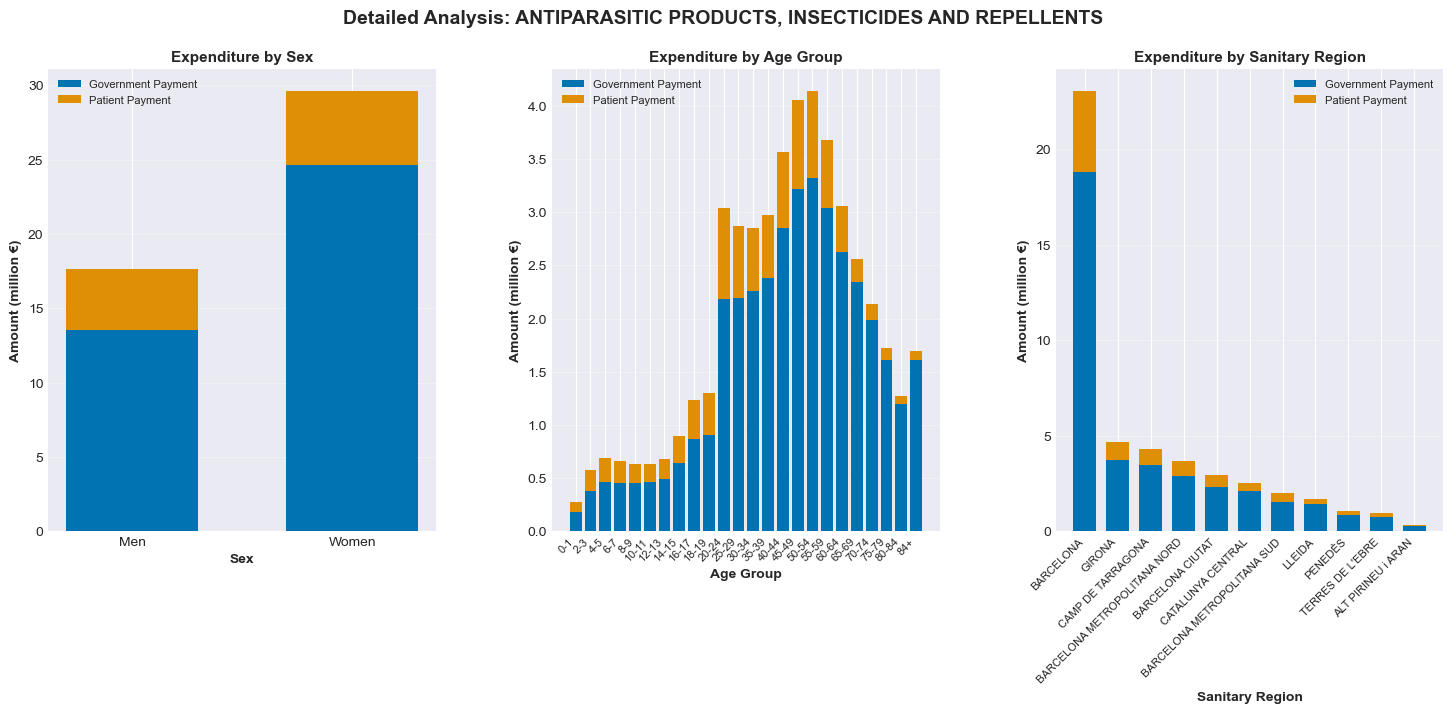


Individual ATC Level 1 analysis complete!


In [16]:
# Get all unique ATC Level 1 groups sorted by total cost
atc1_groups = atc1_totals['ATC Level 1'].tolist()

# Age order for proper sorting
age_order = ['0-1', '2-3', '4-5', '6-7', '8-9', '10-11', '12-13', '14-15', '16-17', '18-19', 
             '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', 
             '60-64', '65-69', '70-74', '75-79', '80-84', '84+']

# Create individual plots for each ATC Level 1 group
for atc_group in atc1_groups:
    print("\n" + "="*80)
    print(f"ANALYSIS FOR: {atc_group}")
    print("="*80)
    
    # Filter data for this ATC Level 1 group
    df_atc = df[df['grup ATC nivell 1'] == atc_group]
    
    # Calculate totals
    total_cost_atc = df_atc['import íntegre'].sum() / 1_000_000
    total_gov_atc = df_atc['import aportació CatSalut'].sum() / 1_000_000
    total_patient_atc = total_cost_atc - total_gov_atc
    mean_fraction_atc = df_atc['fracció_govern'].mean() * 100
    
    print(f"\nTotal Cost: €{total_cost_atc:.2f}M")
    print(f"Government Payment: €{total_gov_atc:.2f}M ({mean_fraction_atc:.1f}%)")
    print(f"Patient Payment: €{total_patient_atc:.2f}M ({100-mean_fraction_atc:.1f}%)")
    
    # Create figure with 3 subplots
    fig = plt.figure(figsize=(18, 6))
    gs = fig.add_gridspec(1, 3, hspace=0.3, wspace=0.3)
    
    cb_colors = sns.color_palette("colorblind")
    
    # 1. By Sex
    ax1 = fig.add_subplot(gs[0, 0])
    sex_data = df_atc.groupby('sexe').agg({
        'import íntegre': 'sum',
        'import aportació CatSalut': 'sum'
    }).reset_index()
    sex_data.columns = ['Sex', 'Total Cost', 'Government Payment']
    sex_data['Patient Payment'] = sex_data['Total Cost'] - sex_data['Government Payment']
    
    x_sex = np.arange(len(sex_data))
    width = 0.6
    ax1.bar(x_sex, sex_data['Government Payment'] / 1_000_000, width, 
            label='Government Payment', color=cb_colors[0])
    ax1.bar(x_sex, sex_data['Patient Payment'] / 1_000_000, width, 
            bottom=sex_data['Government Payment'] / 1_000_000, 
            label='Patient Payment', color=cb_colors[1])
    
    ax1.set_ylabel('Amount (million €)', fontsize=10, fontweight='bold')
    ax1.set_xlabel('Sex', fontsize=10, fontweight='bold')
    ax1.set_title('Expenditure by Sex', fontsize=11, fontweight='bold')
    ax1.set_xticks(x_sex)
    ax1.set_xticklabels(sex_data['Sex'])
    ax1.legend(fontsize=8)
    ax1.grid(axis='y', alpha=0.3)
    
    # 2. By Age Group
    ax2 = fig.add_subplot(gs[0, 1])
    age_data = df_atc.groupby("grup d'edat").agg({
        'import íntegre': 'sum',
        'import aportació CatSalut': 'sum'
    }).reset_index()
    age_data.columns = ['Age Group', 'Total Cost', 'Government Payment']
    age_data['Patient Payment'] = age_data['Total Cost'] - age_data['Government Payment']
    age_data['Age Group'] = pd.Categorical(age_data['Age Group'], categories=age_order, ordered=True)
    age_data = age_data.sort_values('Age Group')
    
    x_age = np.arange(len(age_data))
    width_age = 0.8
    ax2.bar(x_age, age_data['Government Payment'] / 1_000_000, width_age, 
            label='Government Payment', color=cb_colors[0])
    ax2.bar(x_age, age_data['Patient Payment'] / 1_000_000, width_age, 
            bottom=age_data['Government Payment'] / 1_000_000, 
            label='Patient Payment', color=cb_colors[1])
    
    ax2.set_ylabel('Amount (million €)', fontsize=10, fontweight='bold')
    ax2.set_xlabel('Age Group', fontsize=10, fontweight='bold')
    ax2.set_title('Expenditure by Age Group', fontsize=11, fontweight='bold')
    ax2.set_xticks(x_age)
    ax2.set_xticklabels(age_data['Age Group'], rotation=45, ha='right', fontsize=8)
    ax2.legend(fontsize=8)
    ax2.grid(axis='y', alpha=0.3)
    
    # 3. By Sanitary Region
    ax3 = fig.add_subplot(gs[0, 2])
    region_data = df_atc.groupby('regió sanitària').agg({
        'import íntegre': 'sum',
        'import aportació CatSalut': 'sum'
    }).reset_index()
    region_data.columns = ['Region', 'Total Cost', 'Government Payment']
    region_data['Patient Payment'] = region_data['Total Cost'] - region_data['Government Payment']
    region_data = region_data.sort_values('Total Cost', ascending=False)
    
    x_region = np.arange(len(region_data))
    width_region = 0.7
    ax3.bar(x_region, region_data['Government Payment'] / 1_000_000, width_region, 
            label='Government Payment', color=cb_colors[0])
    ax3.bar(x_region, region_data['Patient Payment'] / 1_000_000, width_region, 
            bottom=region_data['Government Payment'] / 1_000_000, 
            label='Patient Payment', color=cb_colors[1])
    
    ax3.set_ylabel('Amount (million €)', fontsize=10, fontweight='bold')
    ax3.set_xlabel('Sanitary Region', fontsize=10, fontweight='bold')
    ax3.set_title('Expenditure by Sanitary Region', fontsize=11, fontweight='bold')
    ax3.set_xticks(x_region)
    ax3.set_xticklabels(region_data['Region'], rotation=45, ha='right', fontsize=8)
    ax3.legend(fontsize=8)
    ax3.grid(axis='y', alpha=0.3)
    
    # Main title for the entire figure
    fig.suptitle(f'Detailed Analysis: {atc_group}', fontsize=14, fontweight='bold')
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
    
print("\n" + "="*80)
print("Individual ATC Level 1 analysis complete!")
print("="*80)

## 7. Summary Statistics

In [17]:
# Overall summary
print("="*80)
print("OVERALL ECONOMIC SUMMARY")
print("="*80)

total_cost = df['import íntegre'].sum()
total_gov_payment = df['import aportació CatSalut'].sum()
total_patient_payment = total_cost - total_gov_payment
mean_gov_fraction = df['fracció_govern'].mean()

print(f"\nTotal Pharmaceutical Cost: €{total_cost/1_000_000:,.2f} million")
print(f"Total Government Payment: €{total_gov_payment/1_000_000:,.2f} million")
print(f"Total Patient Payment: €{total_patient_payment/1_000_000:,.2f} million")
print(f"\nMean Fraction Paid by Government: {mean_gov_fraction*100:.2f}%")
print(f"Mean Fraction Paid by Patients: {(1-mean_gov_fraction)*100:.2f}%")

print(f"\n\nTotal Number of Prescriptions: {df['nombre de receptes'].sum():,}")
print(f"Total Number of Packages: {df['nombre d' + chr(39) + 'envasos'].sum():,}")
print(f"Total Number of Records: {len(df):,}")

print(f"\n\nData Coverage:")
print(f"Years: {df['any'].min()} - {df['any'].max()}")
print(f"Number of ATC Level 1 Categories: {df['grup ATC nivell 1'].nunique()}")
print(f"Number of ATC Level 2 Categories: {df['grup ATC nivell 2'].nunique()}")
print(f"Number of Sanitary Regions: {df['regió sanitària'].nunique()}")
print(f"Number of Age Groups: {df['grup d' + chr(39) + 'edat'].nunique()}")

print("\n" + "="*80)

OVERALL ECONOMIC SUMMARY

Total Pharmaceutical Cost: €16,853.29 million
Total Government Payment: €15,297.90 million
Total Patient Payment: €1,555.38 million

Mean Fraction Paid by Government: 82.46%
Mean Fraction Paid by Patients: 17.54%


Total Number of Prescriptions: 1,359,189,843
Total Number of Packages: 1,359,279,229
Total Number of Records: 7,536,094


Data Coverage:
Years: 2016 - 2025
Number of ATC Level 1 Categories: 13
Number of ATC Level 1 Categories: 13
Number of ATC Level 2 Categories: 77
Number of ATC Level 2 Categories: 77
Number of Sanitary Regions: 11
Number of Sanitary Regions: 11
Number of Age Groups: 24

Number of Age Groups: 24



## 8. Average Cost Per Prescription Analysis

This section analyzes the **average cost per prescription** (total expenditure / number of prescriptions) across different categories.

Average Cost per Prescription by ATC Level 1:
                                    grup ATC nivell 1  Avg Cost per Rx  nombre de receptes
2          ANTINEOPLASTIC AND IMMUNOMODULATING AGENTS        69.267769            13603975
10                                 RESPIRATORY SYSTEM        19.543999            78242418
7              GENITO-URINARY SYSTEM AND SEX HORMONES        18.020148            40052190
4                      BLOOD AND BLOOD FORMING ORGANS        16.194671            85541523
0                     ALIMENTARY TRACT AND METABOLISM        15.598952           200484132
12  SYSTEMIC HORMONAL PREPARATIONS, EXCL. SEX HORM...        14.217461            26273580
6                                     DERMATOLOGICALS        11.893743            24442078
3   ANTIPARASITIC PRODUCTS, INSECTICIDES AND REPEL...        11.858373             3981418
9                                      NERVOUS SYSTEM        11.643034           395284931
1                     ANTIINFECTIVES FOR SYS

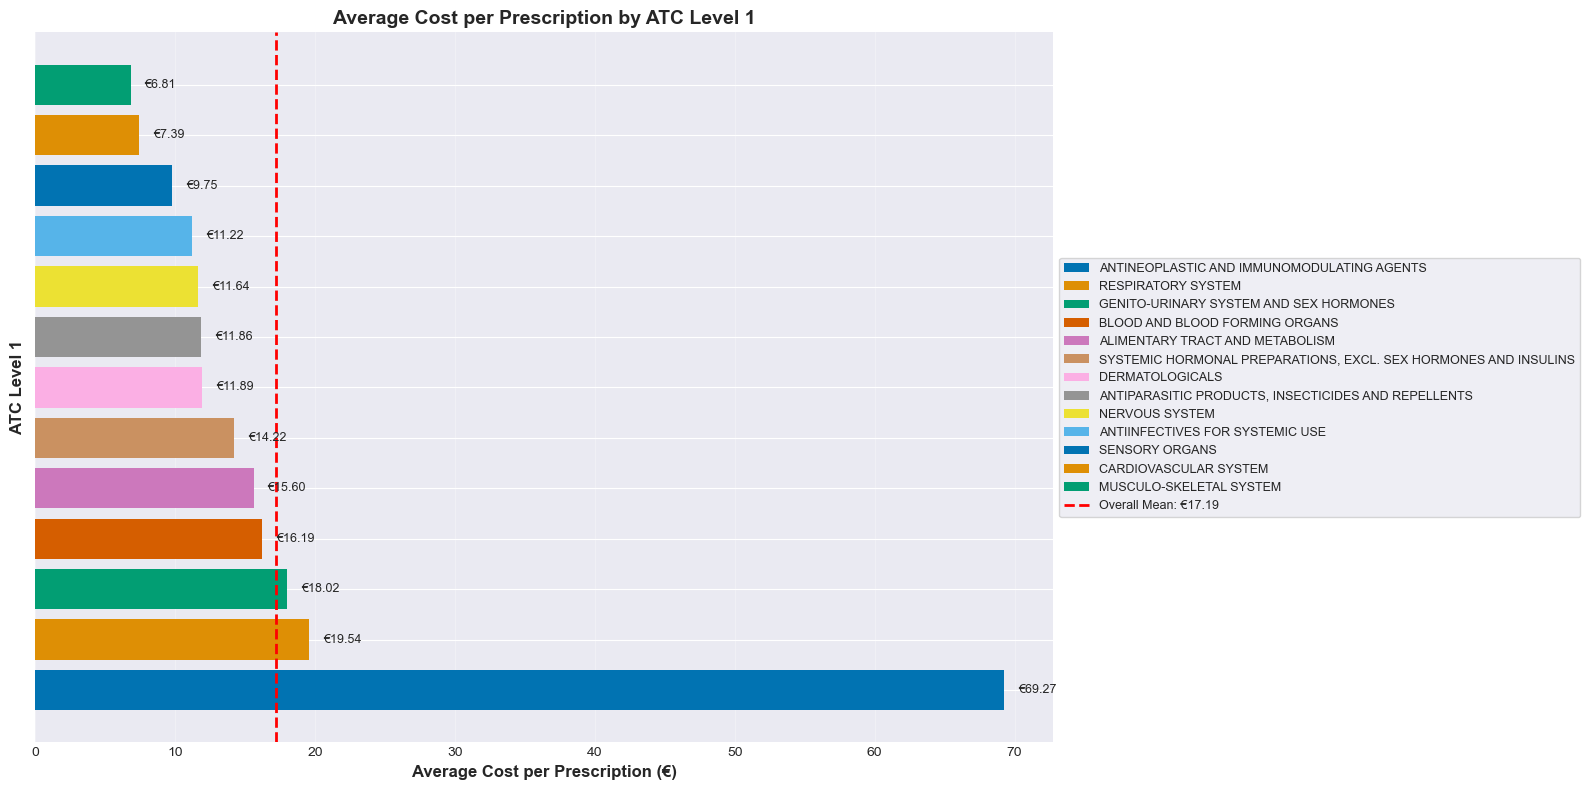

In [18]:
# Average cost per prescription by ATC Level 1
atc1_avg_cost = df.groupby('grup ATC nivell 1').agg({
    'import íntegre': 'sum',
    'nombre de receptes': 'sum'
}).reset_index()

atc1_avg_cost['Avg Cost per Rx'] = atc1_avg_cost['import íntegre'] / atc1_avg_cost['nombre de receptes']
atc1_avg_cost = atc1_avg_cost.sort_values('Avg Cost per Rx', ascending=False)

print("Average Cost per Prescription by ATC Level 1:")
print(atc1_avg_cost[['grup ATC nivell 1', 'Avg Cost per Rx', 'nombre de receptes']])

# Plot
fig, ax = plt.subplots(figsize=(16, 8))
colors = sns.color_palette("colorblind", n_colors=len(atc1_avg_cost))
bars = ax.barh(range(len(atc1_avg_cost)), atc1_avg_cost['Avg Cost per Rx'], color=colors)
ax.set_xlabel('Average Cost per Prescription (€)', fontsize=12, fontweight='bold')
ax.set_ylabel('ATC Level 1', fontsize=12, fontweight='bold')
ax.set_title('Average Cost per Prescription by ATC Level 1', fontsize=14, fontweight='bold')
ax.axvline(x=atc1_avg_cost['Avg Cost per Rx'].mean(), color='red', linestyle='--', linewidth=2, 
           label=f'Overall Mean: €{atc1_avg_cost["Avg Cost per Rx"].mean():.2f}')
ax.set_yticks(range(len(atc1_avg_cost)))
ax.set_yticklabels([])  # Remove y-axis labels
ax.grid(axis='x', alpha=0.3)

# Add cost labels
for i, (idx, row) in enumerate(atc1_avg_cost.iterrows()):
    ax.text(row['Avg Cost per Rx'] + 1, i, f"€{row['Avg Cost per Rx']:.2f}", va='center', fontsize=9)

# Create legend with drug names
legend_elements = [plt.Rectangle((0,0),1,1, fc=colors[i], label=row['grup ATC nivell 1']) 
                   for i, (idx, row) in enumerate(atc1_avg_cost.iterrows())]
legend_elements.append(plt.Line2D([0], [0], color='red', linestyle='--', linewidth=2, 
                                 label=f'Overall Mean: €{atc1_avg_cost["Avg Cost per Rx"].mean():.2f}'))
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=9, frameon=True)

plt.tight_layout()
plt.show()


Average Cost per Prescription - Top 30 ATC Level 2 (by prescription volume):
                                    grup ATC nivell 2  Avg Cost per Rx  nombre de receptes
51                                 IMMUNOSUPPRESSANTS        57.886325             8563026
43                             DRUGS USED IN DIABETES        30.229037            72654753
41              DRUGS FOR OBSTRUCTIVE AIRWAY DISEASES        28.532989            46666651
12                                     ANTIEPILEPTICS        23.820088            29669954
26                              ANTITHROMBOTIC AGENTS        19.666619            64717157
66                         PRODUCTOS DE USO UROLOGICO        19.538883            28497285
69  SEX HORMONES AND MODULATORS OF THE GENITAL SYSTEM        15.969676             9113872
32                                    CARDIAC THERAPY        15.171316            11772677
67                                   PSYCHOANALEPTICS        15.156558            83559531
61          

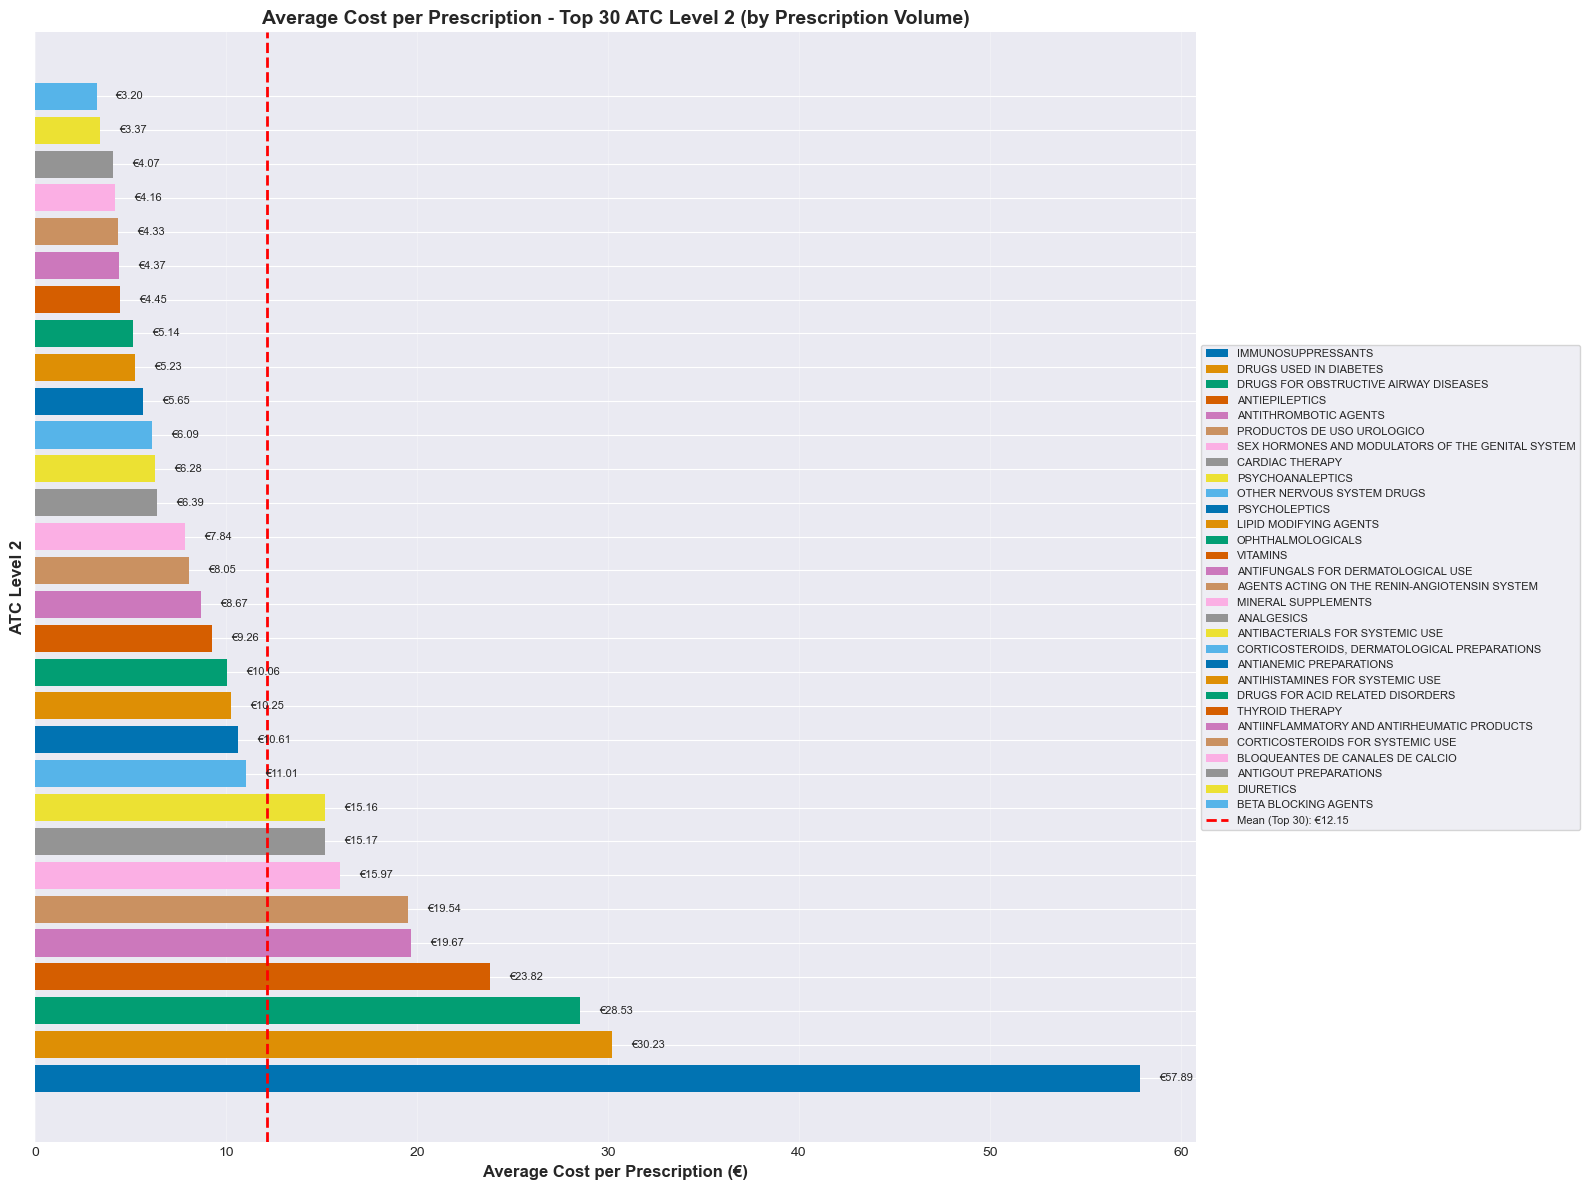

In [19]:
# Average cost per prescription by ATC Level 2 (top 30 by total prescriptions)
atc2_avg_cost = df.groupby('grup ATC nivell 2').agg({
    'import íntegre': 'sum',
    'nombre de receptes': 'sum'
}).reset_index()

atc2_avg_cost['Avg Cost per Rx'] = atc2_avg_cost['import íntegre'] / atc2_avg_cost['nombre de receptes']

# Get top 30 by number of prescriptions
atc2_avg_cost_top = atc2_avg_cost.nlargest(30, 'nombre de receptes').sort_values('Avg Cost per Rx', ascending=False)

print("\nAverage Cost per Prescription - Top 30 ATC Level 2 (by prescription volume):")
print(atc2_avg_cost_top[['grup ATC nivell 2', 'Avg Cost per Rx', 'nombre de receptes']])

# Plot
fig, ax = plt.subplots(figsize=(16, 12))
colors = sns.color_palette("colorblind", n_colors=10)
extended_colors = (colors * 3)[:len(atc2_avg_cost_top)]
bars = ax.barh(range(len(atc2_avg_cost_top)), atc2_avg_cost_top['Avg Cost per Rx'], color=extended_colors)
ax.set_xlabel('Average Cost per Prescription (€)', fontsize=12, fontweight='bold')
ax.set_ylabel('ATC Level 2', fontsize=12, fontweight='bold')
ax.set_title('Average Cost per Prescription - Top 30 ATC Level 2 (by Prescription Volume)', fontsize=14, fontweight='bold')
ax.axvline(x=atc2_avg_cost_top['Avg Cost per Rx'].mean(), color='red', linestyle='--', linewidth=2, 
           label=f'Mean (Top 30): €{atc2_avg_cost_top["Avg Cost per Rx"].mean():.2f}')
ax.set_yticks(range(len(atc2_avg_cost_top)))
ax.set_yticklabels([])
ax.grid(axis='x', alpha=0.3)

# Add cost labels
for i, (idx, row) in enumerate(atc2_avg_cost_top.iterrows()):
    ax.text(row['Avg Cost per Rx'] + 1, i, f"€{row['Avg Cost per Rx']:.2f}", va='center', fontsize=8)

# Create legend
legend_elements = [plt.Rectangle((0,0),1,1, fc=extended_colors[i], label=row['grup ATC nivell 2']) 
                   for i, (idx, row) in enumerate(atc2_avg_cost_top.iterrows())]
legend_elements.append(plt.Line2D([0], [0], color='red', linestyle='--', linewidth=2, 
                                 label=f'Mean (Top 30): €{atc2_avg_cost_top["Avg Cost per Rx"].mean():.2f}'))
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8, frameon=True)

plt.tight_layout()
plt.show()


Average Cost per Prescription by Sex:
    sexe  Avg Cost per Rx  nombre de receptes
0    Men        13.898201           589717321
1  Women        11.250924           769472522


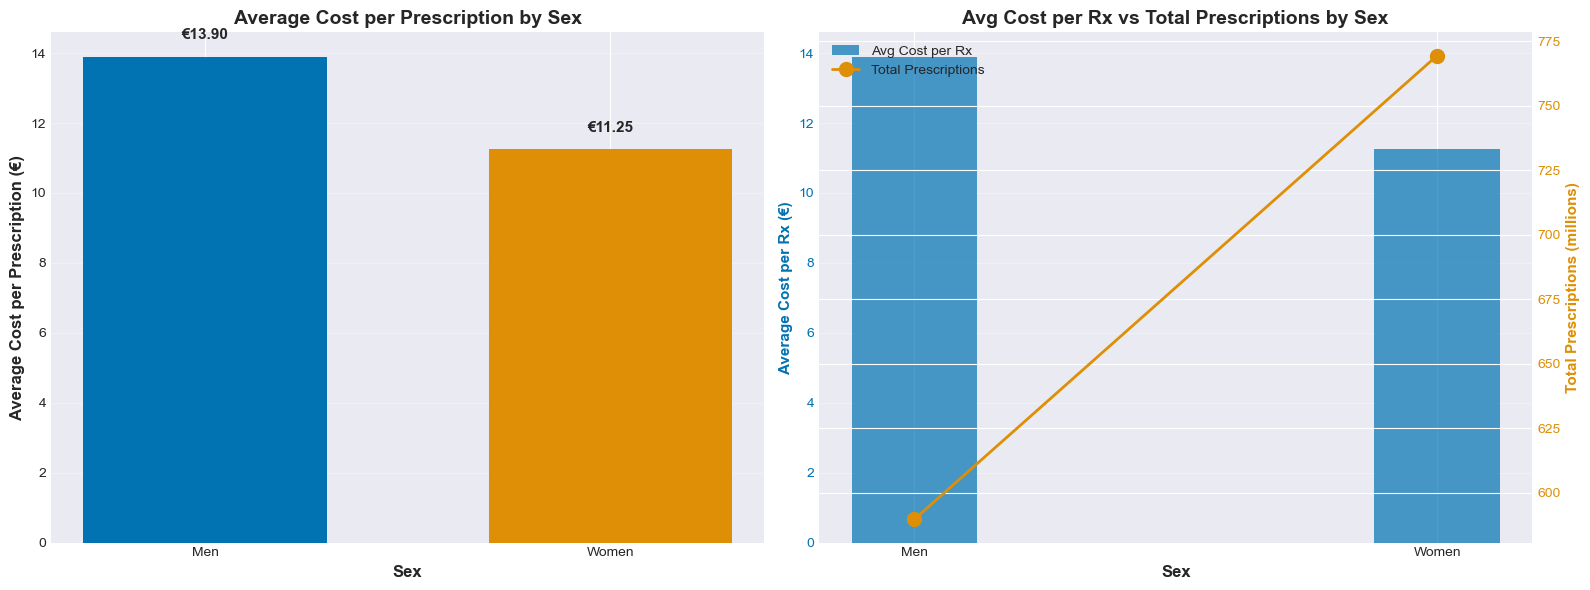

In [20]:
# Average cost per prescription by Sex
sex_avg_cost = df.groupby('sexe').agg({
    'import íntegre': 'sum',
    'nombre de receptes': 'sum'
}).reset_index()

sex_avg_cost['Avg Cost per Rx'] = sex_avg_cost['import íntegre'] / sex_avg_cost['nombre de receptes']

print("\nAverage Cost per Prescription by Sex:")
print(sex_avg_cost[['sexe', 'Avg Cost per Rx', 'nombre de receptes']])

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
cb_colors = sns.color_palette("colorblind")

# Bar chart
x = np.arange(len(sex_avg_cost))
width = 0.6
bars = ax1.bar(x, sex_avg_cost['Avg Cost per Rx'], width, color=[cb_colors[0], cb_colors[1]])
ax1.set_ylabel('Average Cost per Prescription (€)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Sex', fontsize=12, fontweight='bold')
ax1.set_title('Average Cost per Prescription by Sex', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(sex_avg_cost['sexe'])
ax1.grid(axis='y', alpha=0.3)

# Add value labels
for i, row in sex_avg_cost.iterrows():
    ax1.text(i, row['Avg Cost per Rx'] + 0.5, f'€{row["Avg Cost per Rx"]:.2f}', 
            ha='center', fontweight='bold', fontsize=11)

# Comparison chart with prescription volume
ax2_twin = ax2.twinx()
x2 = np.arange(len(sex_avg_cost))
bars2 = ax2.bar(x2, sex_avg_cost['Avg Cost per Rx'], width*0.4, label='Avg Cost per Rx', color=cb_colors[0], alpha=0.7)
line2 = ax2_twin.plot(x2, sex_avg_cost['nombre de receptes'] / 1_000_000, 'o-', linewidth=2, markersize=10, 
                      label='Total Prescriptions', color=cb_colors[1])
ax2.set_ylabel('Average Cost per Rx (€)', fontsize=11, fontweight='bold', color=cb_colors[0])
ax2_twin.set_ylabel('Total Prescriptions (millions)', fontsize=11, fontweight='bold', color=cb_colors[1])
ax2.set_xlabel('Sex', fontsize=12, fontweight='bold')
ax2.set_title('Avg Cost per Rx vs Total Prescriptions by Sex', fontsize=14, fontweight='bold')
ax2.set_xticks(x2)
ax2.set_xticklabels(sex_avg_cost['sexe'])
ax2.tick_params(axis='y', labelcolor=cb_colors[0])
ax2_twin.tick_params(axis='y', labelcolor=cb_colors[1])
ax2.grid(axis='y', alpha=0.3)

# Combine legends
lines1, labels1 = ax2.get_legend_handles_labels()
lines2, labels2 = ax2_twin.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()


Average Cost per Prescription by Age Group:
   grup d'edat  Avg Cost per Rx  nombre de receptes
0          0-1         5.103832             5276720
6          2-3         5.329387             4931337
11         4-5         6.696968             4628415
16         6-7         9.381338             4226551
21         8-9        13.394831             4299800
1        10-11        15.018601             4322204
2        12-13        16.838061             4337751
3        14-15        17.452240             4711218
4        16-17        16.028219             5331032
5        18-19        14.705859             5405650
7        20-24        14.235680            14360282
8        25-29        14.086130            16843465
9        30-34        14.308064            22414259
10       35-39        14.289230            32279119
12       40-44        13.845914            47546294
13       45-49        13.448220            64530260
14       50-54        13.012052            82948115
15       55-59     

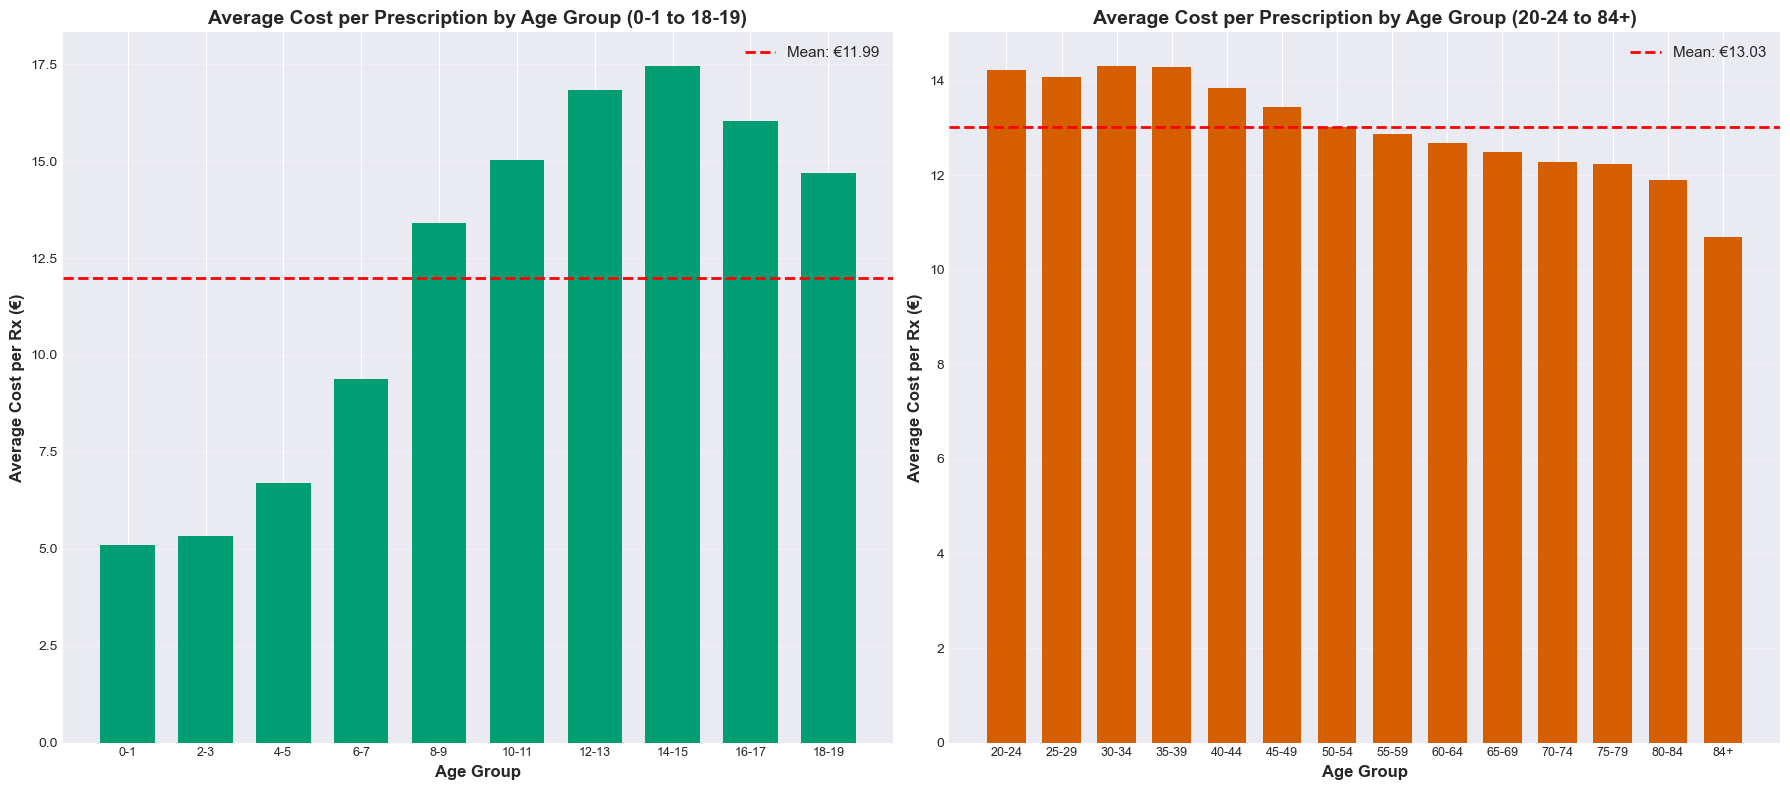

In [21]:
# Average cost per prescription by Age Group
age_avg_cost = df.groupby("grup d'edat").agg({
    'import íntegre': 'sum',
    'nombre de receptes': 'sum'
}).reset_index()

age_avg_cost['Avg Cost per Rx'] = age_avg_cost['import íntegre'] / age_avg_cost['nombre de receptes']
age_avg_cost["grup d'edat"] = pd.Categorical(age_avg_cost["grup d'edat"], categories=age_order, ordered=True)
age_avg_cost = age_avg_cost.sort_values("grup d'edat")

print("\nAverage Cost per Prescription by Age Group:")
print(age_avg_cost[["grup d'edat", 'Avg Cost per Rx', 'nombre de receptes']])

# Split into youth and adult
age_avg_cost_youth = age_avg_cost[age_avg_cost["grup d'edat"].isin(youth_ages)]
age_avg_cost_adult = age_avg_cost[age_avg_cost["grup d'edat"].isin(adult_ages)]

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
cb_colors = sns.color_palette("colorblind")

# Youth subplot
x_youth = np.arange(len(age_avg_cost_youth))
ax1.bar(x_youth, age_avg_cost_youth['Avg Cost per Rx'], 0.7, color=cb_colors[2])
ax1.set_ylabel('Average Cost per Rx (€)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Age Group', fontsize=12, fontweight='bold')
ax1.set_title('Average Cost per Prescription by Age Group (0-1 to 18-19)', fontsize=14, fontweight='bold')
ax1.set_xticks(x_youth)
ax1.set_xticklabels(age_avg_cost_youth["grup d'edat"], rotation=0, ha='center', fontsize=9)
ax1.axhline(y=age_avg_cost_youth['Avg Cost per Rx'].mean(), color='red', linestyle='--', linewidth=2,
           label=f'Mean: €{age_avg_cost_youth["Avg Cost per Rx"].mean():.2f}')
ax1.legend(fontsize=11)
ax1.grid(axis='y', alpha=0.3)

# Adult subplot
x_adult = np.arange(len(age_avg_cost_adult))
ax2.bar(x_adult, age_avg_cost_adult['Avg Cost per Rx'], 0.7, color=cb_colors[3])
ax2.set_ylabel('Average Cost per Rx (€)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Age Group', fontsize=12, fontweight='bold')
ax2.set_title('Average Cost per Prescription by Age Group (20-24 to 84+)', fontsize=14, fontweight='bold')
ax2.set_xticks(x_adult)
ax2.set_xticklabels(age_avg_cost_adult["grup d'edat"], rotation=0, ha='center', fontsize=9)
ax2.axhline(y=age_avg_cost_adult['Avg Cost per Rx'].mean(), color='red', linestyle='--', linewidth=2,
           label=f'Mean: €{age_avg_cost_adult["Avg Cost per Rx"].mean():.2f}')
ax2.legend(fontsize=11)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


Average Cost per Prescription by Sanitary Region:
                 regió sanitària  Avg Cost per Rx  nombre de receptes
2               BARCELONA CIUTAT        13.689081            55563733
4    BARCELONA METROPOLITANA SUD        13.382056            40003072
9                        PENEDÈS        13.228654            16660544
3   BARCELONA METROPOLITANA NORD        12.948769            74164915
5              CAMP DE TARRAGONA        12.661074           102816600
8                         LLEIDA        12.596236            63889256
1                      BARCELONA        12.295760           722817289
6              CATALUNYA CENTRAL        12.112942            93327186
10              TERRES DE L'EBRE        12.096203            36455375
0             ALT PIRINEU i ARAN        11.850238            11698182
7                         GIRONA        11.794745           141793691


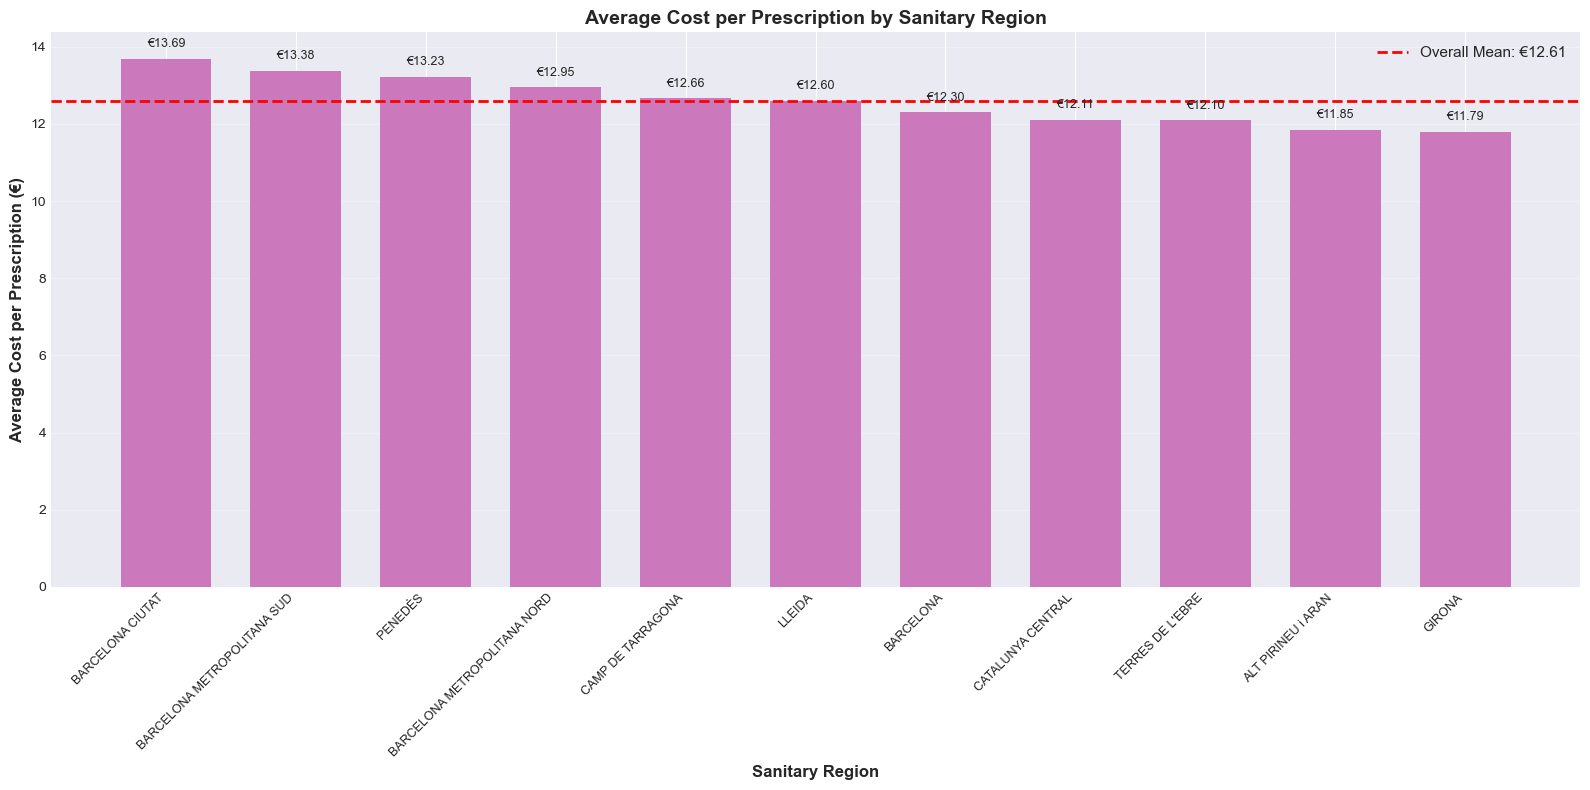

In [22]:
# Average cost per prescription by Sanitary Region
region_avg_cost = df.groupby('regió sanitària').agg({
    'import íntegre': 'sum',
    'nombre de receptes': 'sum'
}).reset_index()

region_avg_cost['Avg Cost per Rx'] = region_avg_cost['import íntegre'] / region_avg_cost['nombre de receptes']
region_avg_cost = region_avg_cost.sort_values('Avg Cost per Rx', ascending=False)

print("\nAverage Cost per Prescription by Sanitary Region:")
print(region_avg_cost[['regió sanitària', 'Avg Cost per Rx', 'nombre de receptes']])

# Plot
fig, ax = plt.subplots(figsize=(16, 8))
x = np.arange(len(region_avg_cost))
cb_colors = sns.color_palette("colorblind")

bars = ax.bar(x, region_avg_cost['Avg Cost per Rx'], 0.7, color=cb_colors[4])
ax.set_ylabel('Average Cost per Prescription (€)', fontsize=12, fontweight='bold')
ax.set_xlabel('Sanitary Region', fontsize=12, fontweight='bold')
ax.set_title('Average Cost per Prescription by Sanitary Region', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(region_avg_cost['regió sanitària'], rotation=45, ha='right', fontsize=9)
ax.axhline(y=region_avg_cost['Avg Cost per Rx'].mean(), color='red', linestyle='--', linewidth=2,
          label=f'Overall Mean: €{region_avg_cost["Avg Cost per Rx"].mean():.2f}')
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)

# Add value labels on top
for i, row in region_avg_cost.iterrows():
    ax.text(x[region_avg_cost.index.get_loc(i)], row['Avg Cost per Rx'] + 0.3, 
           f'€{row["Avg Cost per Rx"]:.2f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()


Average Cost per Prescription by Sanitary Region (excluding Barcelona):
                 regió sanitària  Avg Cost per Rx  nombre de receptes
2               BARCELONA CIUTAT        13.689081            55563733
4    BARCELONA METROPOLITANA SUD        13.382056            40003072
9                        PENEDÈS        13.228654            16660544
3   BARCELONA METROPOLITANA NORD        12.948769            74164915
5              CAMP DE TARRAGONA        12.661074           102816600
8                         LLEIDA        12.596236            63889256
6              CATALUNYA CENTRAL        12.112942            93327186
10              TERRES DE L'EBRE        12.096203            36455375
0             ALT PIRINEU i ARAN        11.850238            11698182
7                         GIRONA        11.794745           141793691


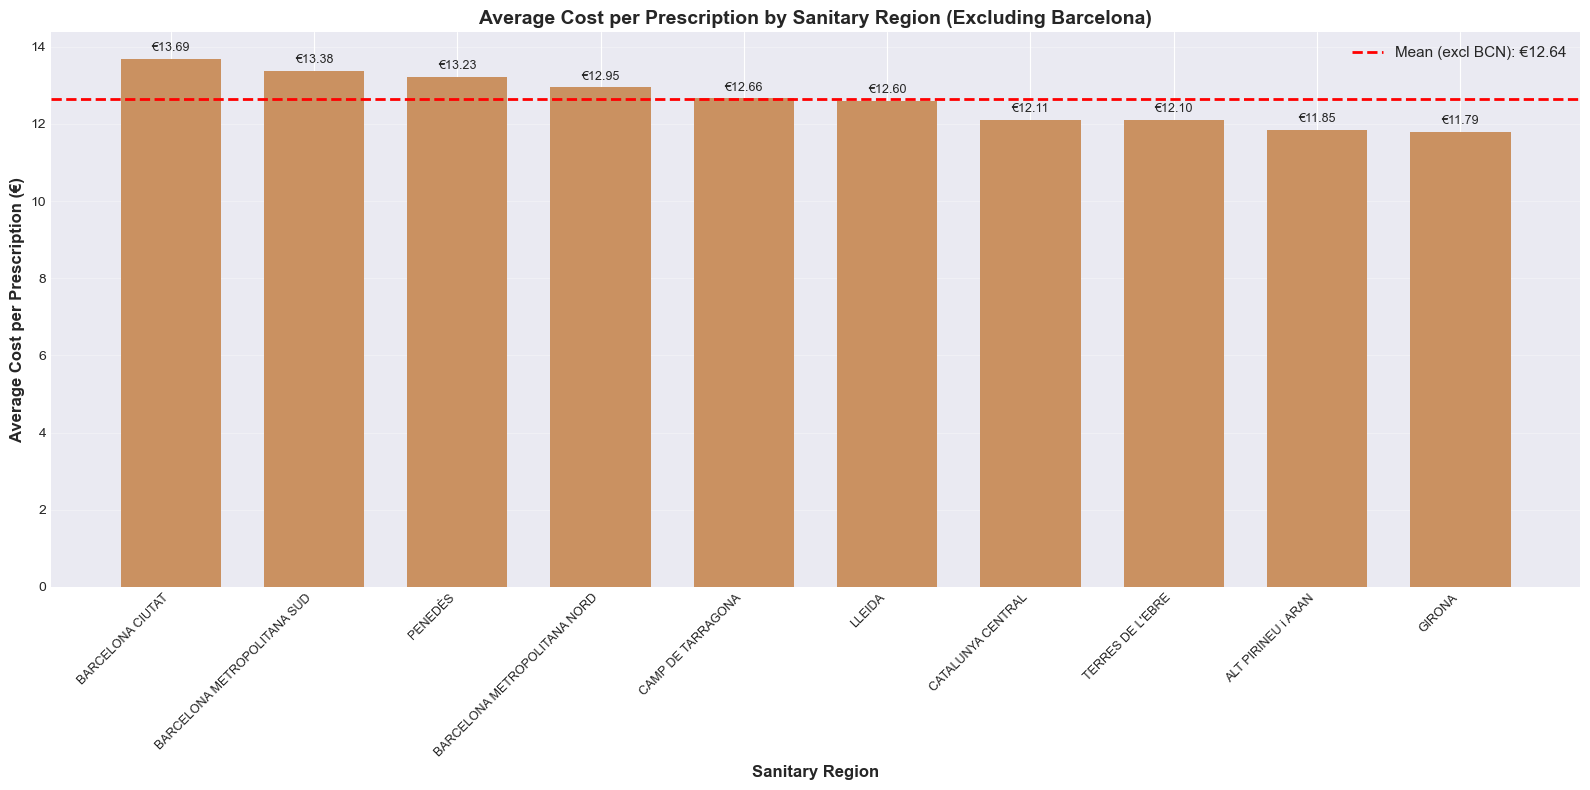

In [23]:
# Average cost per prescription by Sanitary Region (excluding Barcelona)
region_avg_cost_no_bcn = region_avg_cost[region_avg_cost['regió sanitària'] != 'BARCELONA'].copy()

print("\nAverage Cost per Prescription by Sanitary Region (excluding Barcelona):")
print(region_avg_cost_no_bcn[['regió sanitària', 'Avg Cost per Rx', 'nombre de receptes']])

# Plot
fig, ax = plt.subplots(figsize=(16, 8))
x = np.arange(len(region_avg_cost_no_bcn))
cb_colors = sns.color_palette("colorblind")

bars = ax.bar(x, region_avg_cost_no_bcn['Avg Cost per Rx'], 0.7, color=cb_colors[5])
ax.set_ylabel('Average Cost per Prescription (€)', fontsize=12, fontweight='bold')
ax.set_xlabel('Sanitary Region', fontsize=12, fontweight='bold')
ax.set_title('Average Cost per Prescription by Sanitary Region (Excluding Barcelona)', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(region_avg_cost_no_bcn['regió sanitària'], rotation=45, ha='right', fontsize=9)
ax.axhline(y=region_avg_cost_no_bcn['Avg Cost per Rx'].mean(), color='red', linestyle='--', linewidth=2,
          label=f'Mean (excl BCN): €{region_avg_cost_no_bcn["Avg Cost per Rx"].mean():.2f}')
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)

# Add value labels
for i, (idx, row) in enumerate(region_avg_cost_no_bcn.iterrows()):
    ax.text(i, row['Avg Cost per Rx'] + 0.2, f'€{row["Avg Cost per Rx"]:.2f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

### Comparative Analysis: Average Cost per Prescription by Demographics and ATC Groups

Average Cost per Prescription by Sex and ATC Level 1:
sexe                                                      Men      Women
grup ATC nivell 1                                                       
ANTINEOPLASTIC AND IMMUNOMODULATING AGENTS          76.627541  64.376730
RESPIRATORY SYSTEM                                  22.184927  17.204466
GENITO-URINARY SYSTEM AND SEX HORMONES              18.006754  18.045381
ALIMENTARY TRACT AND METABOLISM                     17.913334  13.769312
BLOOD AND BLOOD FORMING ORGANS                      16.185778  16.203474
SYSTEMIC HORMONAL PREPARATIONS, EXCL. SEX HORMO...  15.871948  13.523554
NERVOUS SYSTEM                                      14.528977  10.146419
DERMATOLOGICALS                                     13.084526  10.897453
ANTIPARASITIC PRODUCTS, INSECTICIDES AND REPELL...  12.404691  11.555441
ANTIINFECTIVES FOR SYSTEMIC USE                     12.151848  10.545662
SENSORY ORGANS                                      10.072894   9.5061

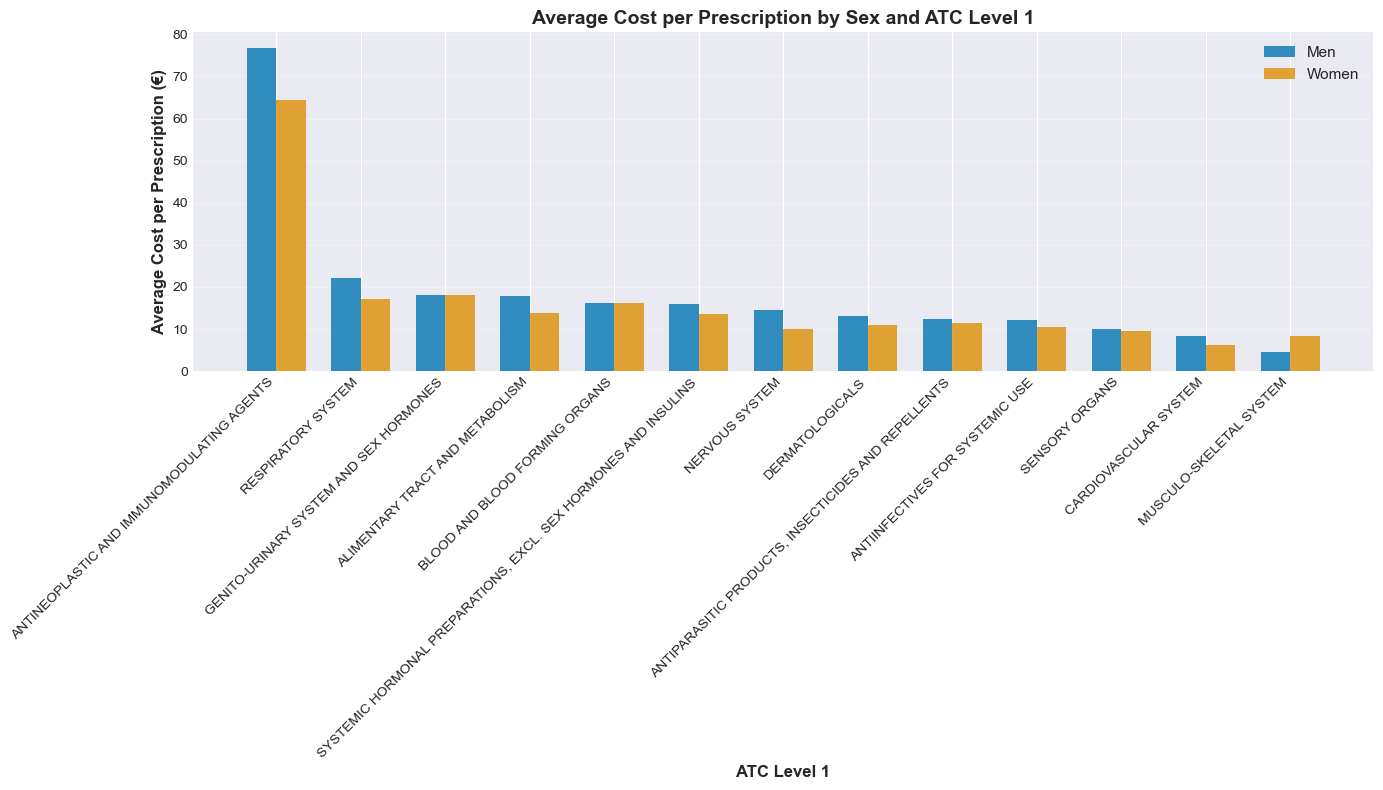

In [24]:
# Average cost per prescription: Sex x ATC Level 1
sex_atc1_avg = df.groupby(['grup ATC nivell 1', 'sexe']).agg({
    'import íntegre': 'sum',
    'nombre de receptes': 'sum'
}).reset_index()

sex_atc1_avg['Avg Cost per Rx'] = sex_atc1_avg['import íntegre'] / sex_atc1_avg['nombre de receptes']
sex_atc1_avg_pivot = sex_atc1_avg.pivot(index='grup ATC nivell 1', columns='sexe', values='Avg Cost per Rx')
sex_atc1_avg_pivot = sex_atc1_avg_pivot.sort_values(by=sex_atc1_avg_pivot.columns[0], ascending=False)

print("Average Cost per Prescription by Sex and ATC Level 1:")
print(sex_atc1_avg_pivot)

# Plot
fig, ax = plt.subplots(figsize=(14, 8))
x = np.arange(len(sex_atc1_avg_pivot))
width = 0.35
cb_colors = sns.color_palette("colorblind")

sexes = sex_atc1_avg_pivot.columns
for i, sex in enumerate(sexes):
    ax.bar(x + i*width, sex_atc1_avg_pivot[sex], width, label=sex, color=cb_colors[i], alpha=0.8)

ax.set_ylabel('Average Cost per Prescription (€)', fontsize=12, fontweight='bold')
ax.set_xlabel('ATC Level 1', fontsize=12, fontweight='bold')
ax.set_title('Average Cost per Prescription by Sex and ATC Level 1', fontsize=14, fontweight='bold')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(sex_atc1_avg_pivot.index, rotation=45, ha='right')
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

Average Cost per Prescription by Age Group and ATC Level 1:
grup ATC nivell 1  ANTINEOPLASTIC AND IMMUNOMODULATING AGENTS  CARDIOVASCULAR SYSTEM  ALIMENTARY TRACT AND METABOLISM  RESPIRATORY SYSTEM  \
grup d'edat                                                                                                                                 
0-1                                                 64.732049              83.593111                         7.877633            5.881259   
2-3                                                 51.234939              43.763324                         6.816379            8.266315   
4-5                                                 53.914891              38.202053                         9.225047           10.176572   
6-7                                                 75.322383              39.769433                        11.644351           11.063172   
8-9                                                109.183951              47.898805          

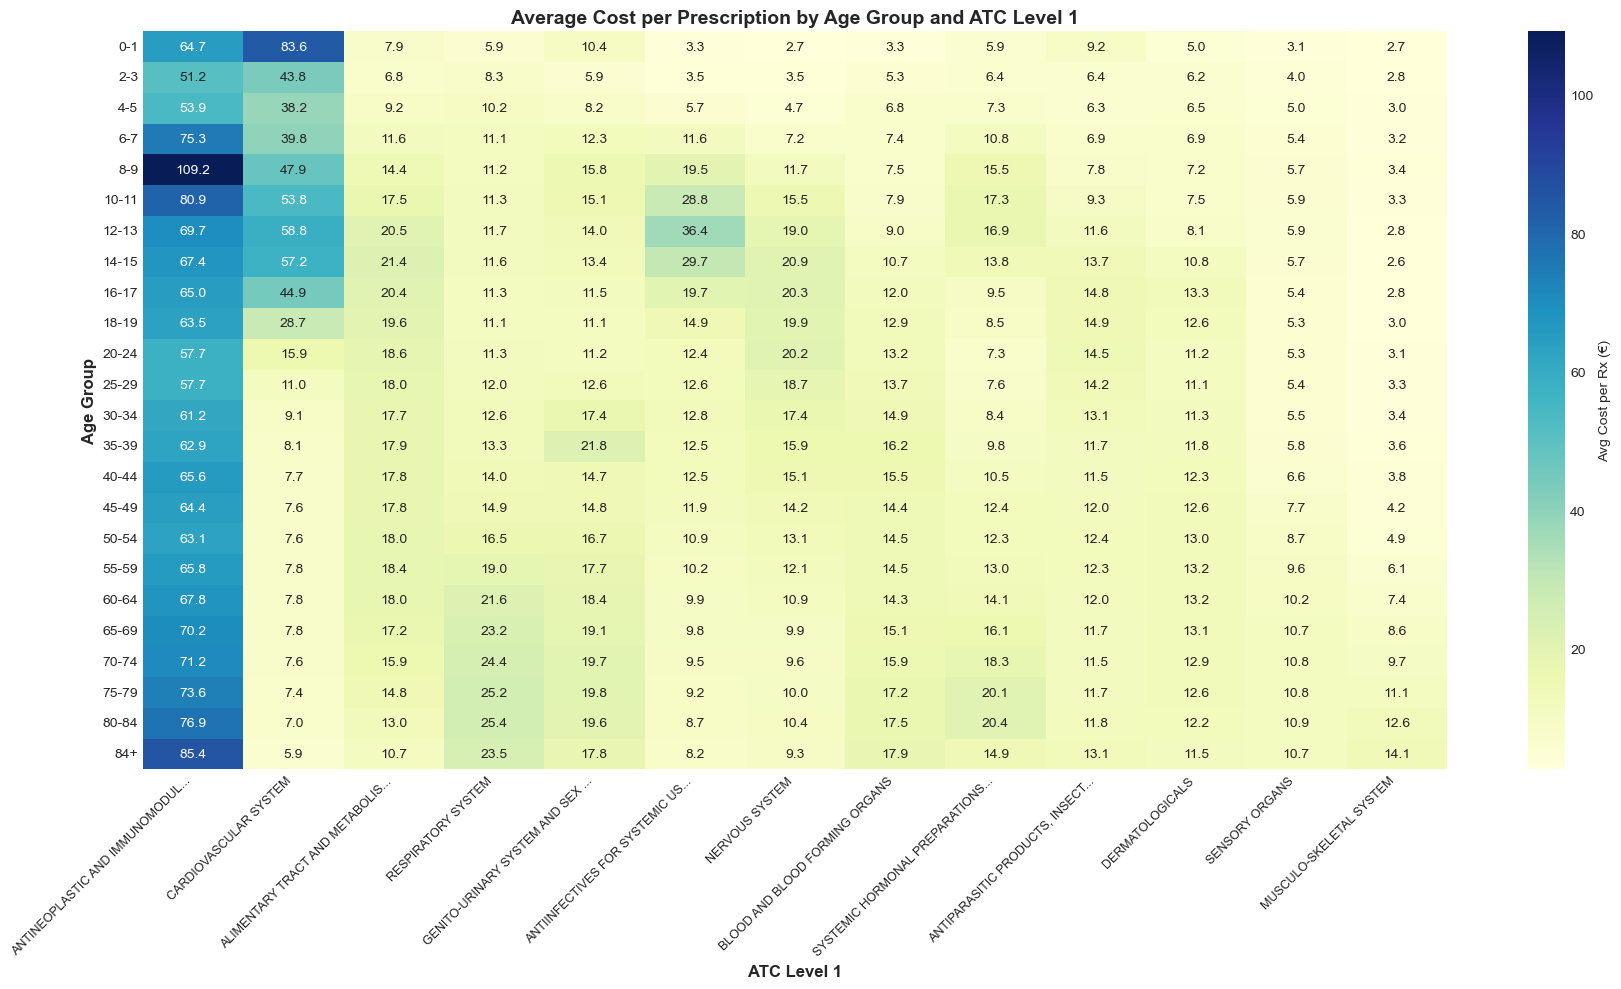

In [25]:
# Average cost per prescription: Age x ATC Level 1 (heatmap)
age_atc1_avg = df.groupby(["grup d'edat", 'grup ATC nivell 1']).agg({
    'import íntegre': 'sum',
    'nombre de receptes': 'sum'
}).reset_index()

age_atc1_avg['Avg Cost per Rx'] = age_atc1_avg['import íntegre'] / age_atc1_avg['nombre de receptes']
age_atc1_avg["grup d'edat"] = pd.Categorical(age_atc1_avg["grup d'edat"], categories=age_order, ordered=True)
age_atc1_avg = age_atc1_avg.sort_values("grup d'edat")

print("Average Cost per Prescription by Age Group and ATC Level 1:")

# Create heatmap
pivot_avg = age_atc1_avg.pivot(index="grup d'edat", columns='grup ATC nivell 1', values='Avg Cost per Rx')
column_order_avg = pivot_avg.mean().sort_values(ascending=False).index
pivot_avg = pivot_avg[column_order_avg]
print(pivot_avg)

fig, ax = plt.subplots(figsize=(18, 10))
abbreviated_cols_avg = [col[:30] + '...' if len(col) > 30 else col for col in pivot_avg.columns]
sns.heatmap(pivot_avg, annot=True, fmt='.1f', cmap='YlGnBu', cbar_kws={'label': 'Avg Cost per Rx (€)'}, 
            ax=ax, xticklabels=abbreviated_cols_avg)
ax.set_title('Average Cost per Prescription by Age Group and ATC Level 1', fontsize=14, fontweight='bold')
ax.set_xlabel('ATC Level 1', fontsize=12, fontweight='bold')
ax.set_ylabel('Age Group', fontsize=12, fontweight='bold')
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=9)
plt.tight_layout()
plt.show()

Average Cost per Prescription by Sanitary Region and ATC Level 1:
grup ATC nivell 1             ANTINEOPLASTIC AND IMMUNOMODULATING AGENTS  RESPIRATORY SYSTEM  GENITO-URINARY SYSTEM AND SEX HORMONES  \
regió sanitària                                                                                                                        
BARCELONA CIUTAT                                               75.714842           18.883490                               16.290875   
BARCELONA METROPOLITANA SUD                                    70.643230           18.567703                               16.440909   
PENEDÈS                                                        73.404208           18.338672                               16.034622   
BARCELONA METROPOLITANA NORD                                   70.755140           18.304844                               15.909503   
BARCELONA                                                      68.426683           19.867492                          

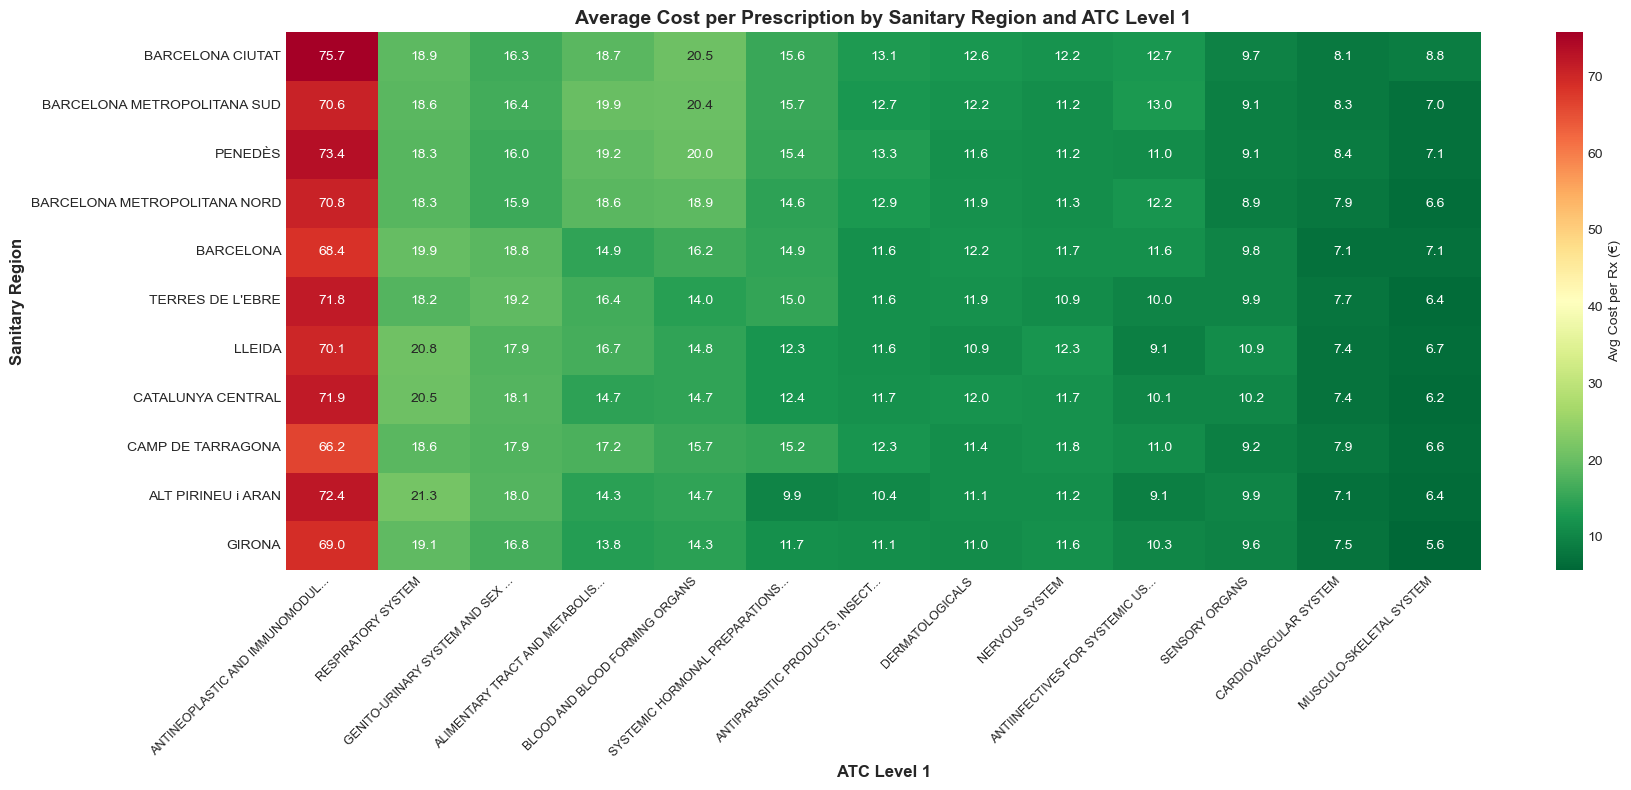

In [26]:
# Average cost per prescription: Region x ATC Level 1 (heatmap)
region_atc1_avg = df.groupby(['regió sanitària', 'grup ATC nivell 1']).agg({
    'import íntegre': 'sum',
    'nombre de receptes': 'sum'
}).reset_index()

region_atc1_avg['Avg Cost per Rx'] = region_atc1_avg['import íntegre'] / region_atc1_avg['nombre de receptes']

print("Average Cost per Prescription by Sanitary Region and ATC Level 1:")

# Create heatmap
pivot_region_avg = region_atc1_avg.pivot(index='regió sanitària', columns='grup ATC nivell 1', values='Avg Cost per Rx')
column_order_region_avg = pivot_region_avg.mean().sort_values(ascending=False).index
pivot_region_avg = pivot_region_avg[column_order_region_avg]

# Sort rows by average
pivot_region_avg['Row_Avg'] = pivot_region_avg.mean(axis=1)
pivot_region_avg = pivot_region_avg.sort_values('Row_Avg', ascending=False).drop('Row_Avg', axis=1)
print(pivot_region_avg)

fig, ax = plt.subplots(figsize=(18, 8))
abbreviated_cols_region_avg = [col[:30] + '...' if len(col) > 30 else col for col in pivot_region_avg.columns]
sns.heatmap(pivot_region_avg, annot=True, fmt='.1f', cmap='RdYlGn_r', cbar_kws={'label': 'Avg Cost per Rx (€)'}, 
            ax=ax, xticklabels=abbreviated_cols_region_avg)
ax.set_title('Average Cost per Prescription by Sanitary Region and ATC Level 1', fontsize=14, fontweight='bold')
ax.set_xlabel('ATC Level 1', fontsize=12, fontweight='bold')
ax.set_ylabel('Sanitary Region', fontsize=12, fontweight='bold')
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=9)
plt.tight_layout()
plt.show()

In [27]:
# Summary statistics for average cost per prescription
print("="*80)
print("AVERAGE COST PER PRESCRIPTION SUMMARY")
print("="*80)

overall_avg_cost = df['import íntegre'].sum() / df['nombre de receptes'].sum()
print(f"\nOverall Average Cost per Prescription: €{overall_avg_cost:.2f}")

print(f"\nBy Sex:")
for idx, row in sex_avg_cost.iterrows():
    print(f"  {row['sexe']}: €{row['Avg Cost per Rx']:.2f}")

print(f"\nBy ATC Level 1 (Top 5 Most Expensive):")
for idx, row in atc1_avg_cost.head(5).iterrows():
    print(f"  {row['grup ATC nivell 1'][:50]}: €{row['Avg Cost per Rx']:.2f}")

print(f"\nBy ATC Level 1 (Top 5 Least Expensive):")
for idx, row in atc1_avg_cost.tail(5).iterrows():
    print(f"  {row['grup ATC nivell 1'][:50]}: €{row['Avg Cost per Rx']:.2f}")

print(f"\nBy Age Group:")
print(f"  Youth (0-19): €{age_avg_cost_youth['Avg Cost per Rx'].mean():.2f}")
print(f"  Adult (20+): €{age_avg_cost_adult['Avg Cost per Rx'].mean():.2f}")
print(f"  Highest: {age_avg_cost.loc[age_avg_cost['Avg Cost per Rx'].idxmax(), 'grup d' + chr(39) + 'edat']} " + 
      f"(€{age_avg_cost['Avg Cost per Rx'].max():.2f})")
print(f"  Lowest: {age_avg_cost.loc[age_avg_cost['Avg Cost per Rx'].idxmin(), 'grup d' + chr(39) + 'edat']} " + 
      f"(€{age_avg_cost['Avg Cost per Rx'].min():.2f})")

print(f"\nBy Sanitary Region:")
print(f"  Highest: {region_avg_cost.iloc[0]['regió sanitària']} (€{region_avg_cost.iloc[0]['Avg Cost per Rx']:.2f})")
print(f"  Lowest: {region_avg_cost.iloc[-1]['regió sanitària']} (€{region_avg_cost.iloc[-1]['Avg Cost per Rx']:.2f})")
print(f"  Range: €{region_avg_cost['Avg Cost per Rx'].max() - region_avg_cost['Avg Cost per Rx'].min():.2f}")

print("\n" + "="*80)

AVERAGE COST PER PRESCRIPTION SUMMARY

Overall Average Cost per Prescription: €12.40

By Sex:
  Men: €13.90
  Women: €11.25

By ATC Level 1 (Top 5 Most Expensive):
  ANTINEOPLASTIC AND IMMUNOMODULATING AGENTS: €69.27
  RESPIRATORY SYSTEM: €19.54
  GENITO-URINARY SYSTEM AND SEX HORMONES: €18.02
  BLOOD AND BLOOD FORMING ORGANS: €16.19
  ALIMENTARY TRACT AND METABOLISM: €15.60

By ATC Level 1 (Top 5 Least Expensive):
  NERVOUS SYSTEM: €11.64
  ANTIINFECTIVES FOR SYSTEMIC USE: €11.22
  SENSORY ORGANS: €9.75
  CARDIOVASCULAR SYSTEM: €7.39
  MUSCULO-SKELETAL SYSTEM: €6.81

By Age Group:
  Youth (0-19): €11.99
  Adult (20+): €13.03
  Highest: 14-15 (€17.45)
  Lowest: 0-1 (€5.10)

By Sanitary Region:
  Highest: BARCELONA CIUTAT (€13.69)
  Lowest: GIRONA (€11.79)
  Range: €1.89



## 9. Prescription Volume Analysis

This section analyzes the **number of prescriptions** across different categories to understand prescription patterns.

Number of Prescriptions by ATC Level 1:
                                    grup ATC nivell 1  nombre de receptes  Percentage
9                                      NERVOUS SYSTEM           395284931   29.082393
5                               CARDIOVASCULAR SYSTEM           348982484   25.675772
0                     ALIMENTARY TRACT AND METABOLISM           200484132   14.750267
4                      BLOOD AND BLOOD FORMING ORGANS            85541523    6.293567
10                                 RESPIRATORY SYSTEM            78242418    5.756548
8                             MUSCULO-SKELETAL SYSTEM            66877188    4.920371
1                     ANTIINFECTIVES FOR SYSTEMIC USE            42308975    3.112808
7              GENITO-URINARY SYSTEM AND SEX HORMONES            40052190    2.946769
11                                     SENSORY ORGANS            33114951    2.436374
12  SYSTEMIC HORMONAL PREPARATIONS, EXCL. SEX HORM...            26273580    1.933032
6             

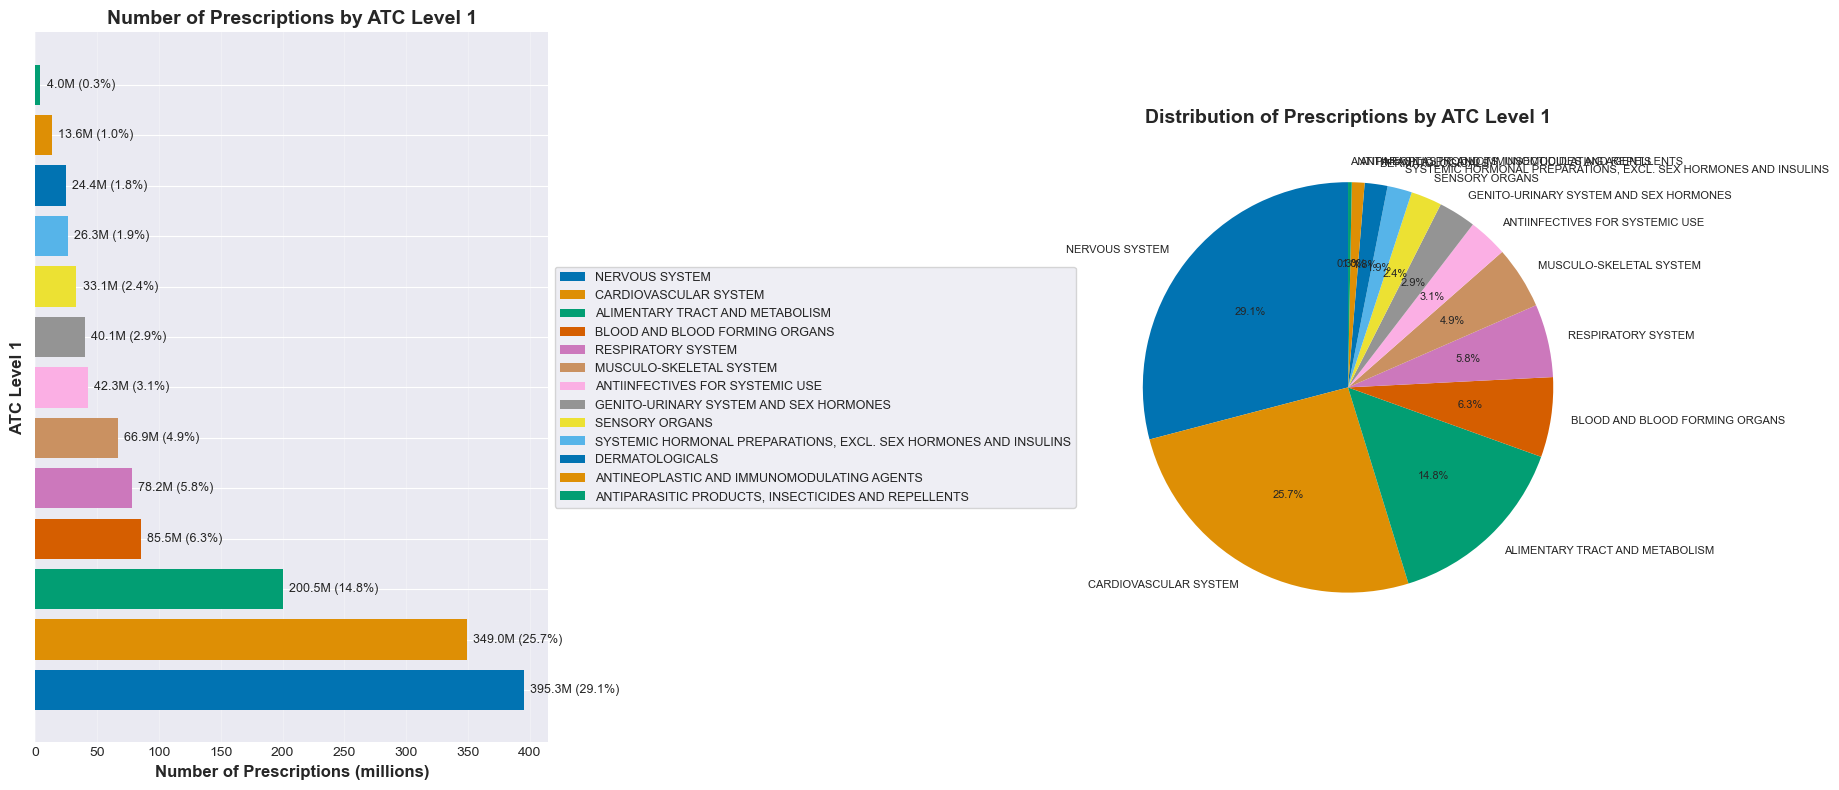

In [ ]:
# Number of prescriptions by ATC Level 1
atc1_rx_count = df.groupby('grup ATC nivell 1').agg({
    'nombre de receptes': 'sum',
    'import íntegre': 'sum'
}).reset_index()

atc1_rx_count = atc1_rx_count.sort_values('nombre de receptes', ascending=False)
atc1_rx_count['Percentage'] = (atc1_rx_count['nombre de receptes'] / atc1_rx_count['nombre de receptes'].sum()) * 100

print("Number of Prescriptions by ATC Level 1:")
print(atc1_rx_count[['grup ATC nivell 1', 'nombre de receptes', 'Percentage']])

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
colors = sns.color_palette("colorblind", n_colors=len(atc1_rx_count))

# Bar chart
bars = ax1.barh(range(len(atc1_rx_count)), atc1_rx_count['nombre de receptes'] / 1_000_000, color=colors)
ax1.set_xlabel('Number of Prescriptions (millions)', fontsize=12, fontweight='bold')
ax1.set_ylabel('ATC Level 1', fontsize=12, fontweight='bold')
ax1.set_title('Number of Prescriptions by ATC Level 1', fontsize=14, fontweight='bold')
ax1.set_yticks(range(len(atc1_rx_count)))
ax1.set_yticklabels([])
ax1.grid(axis='x', alpha=0.3)

# Add count labels
for i, (idx, row) in enumerate(atc1_rx_count.iterrows()):
    ax1.text(row['nombre de receptes'] / 1_000_000 + 5, i, 
            f"{row['nombre de receptes']/1_000_000:.1f}M ({row['Percentage']:.1f}%)", 
            va='center', fontsize=9)

# Pie chart
ax2.pie(atc1_rx_count['nombre de receptes'], labels=None, 
        autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize': 8})
ax2.set_title('Distribution of Prescriptions by ATC Level 1', fontsize=14, fontweight='bold')

# Legend for bar chart
legend_elements = [plt.Rectangle((0,0),1,1, fc=colors[i], label=row['grup ATC nivell 1']) 
                   for i, (idx, row) in enumerate(atc1_rx_count.iterrows())]
ax1.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=9, frameon=True)

plt.tight_layout()
plt.show()


Number of Prescriptions - Top 30 ATC Level 2:
                                    grup ATC nivell 2  nombre de receptes  Percentage
2                                          ANALGESICS           149523987   11.000964
0       AGENTS ACTING ON THE RENIN-ANGIOTENSIN SYSTEM           116175357    8.547397
68                                      PSYCHOLEPTICS           116003609    8.534761
52                             LIPID MODIFYING AGENTS            92683465    6.819023
67                                   PSYCHOANALEPTICS            83559531    6.147745
38                   DRUGS FOR ACID RELATED DISORDERS            80656503    5.934160
43                             DRUGS USED IN DIABETES            72654753    5.345446
26                              ANTITHROMBOTIC AGENTS            64717157    4.761451
37                                          DIURETICS            47460288    3.491807
41              DRUGS FOR OBSTRUCTIVE AIRWAY DISEASES            46666651    3.433417
18     

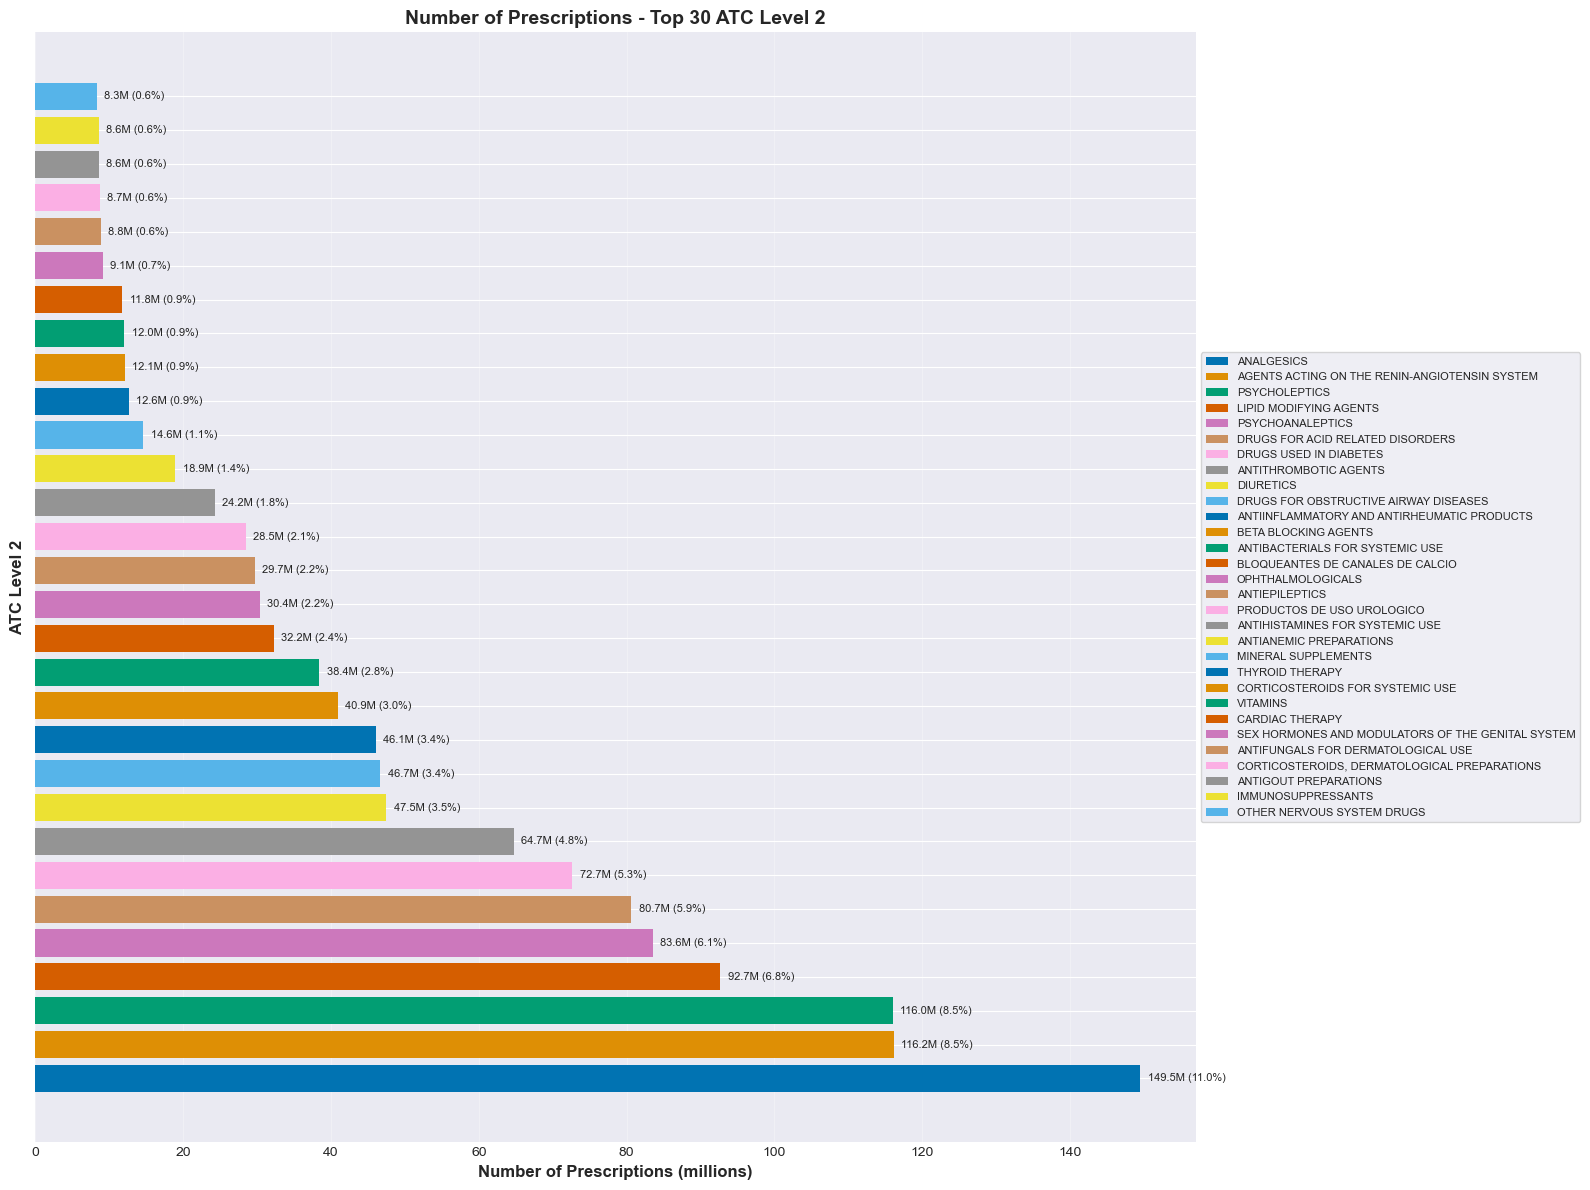

In [29]:
# Number of prescriptions by ATC Level 2 (top 30)
atc2_rx_count = df.groupby('grup ATC nivell 2').agg({
    'nombre de receptes': 'sum',
    'import íntegre': 'sum'
}).reset_index()

atc2_rx_count_top = atc2_rx_count.nlargest(30, 'nombre de receptes')
atc2_rx_count_top['Percentage'] = (atc2_rx_count_top['nombre de receptes'] / df['nombre de receptes'].sum()) * 100

print("\nNumber of Prescriptions - Top 30 ATC Level 2:")
print(atc2_rx_count_top[['grup ATC nivell 2', 'nombre de receptes', 'Percentage']])

# Plot
fig, ax = plt.subplots(figsize=(16, 12))
colors = sns.color_palette("colorblind", n_colors=10)
extended_colors = (colors * 3)[:len(atc2_rx_count_top)]

bars = ax.barh(range(len(atc2_rx_count_top)), atc2_rx_count_top['nombre de receptes'] / 1_000_000, 
               color=extended_colors)
ax.set_xlabel('Number of Prescriptions (millions)', fontsize=12, fontweight='bold')
ax.set_ylabel('ATC Level 2', fontsize=12, fontweight='bold')
ax.set_title('Number of Prescriptions - Top 30 ATC Level 2', fontsize=14, fontweight='bold')
ax.set_yticks(range(len(atc2_rx_count_top)))
ax.set_yticklabels([])
ax.grid(axis='x', alpha=0.3)

# Add count labels
for i, (idx, row) in enumerate(atc2_rx_count_top.iterrows()):
    ax.text(row['nombre de receptes'] / 1_000_000 + 1, i, 
            f"{row['nombre de receptes']/1_000_000:.1f}M ({row['Percentage']:.1f}%)", 
            va='center', fontsize=8)

# Legend
legend_elements = [plt.Rectangle((0,0),1,1, fc=extended_colors[i], label=row['grup ATC nivell 2']) 
                   for i, (idx, row) in enumerate(atc2_rx_count_top.iterrows())]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8, frameon=True)

plt.tight_layout()
plt.show()


Number of Prescriptions by Sex:
    sexe  nombre de receptes  Percentage
0    Men           589717321   43.387414
1  Women           769472522   56.612586


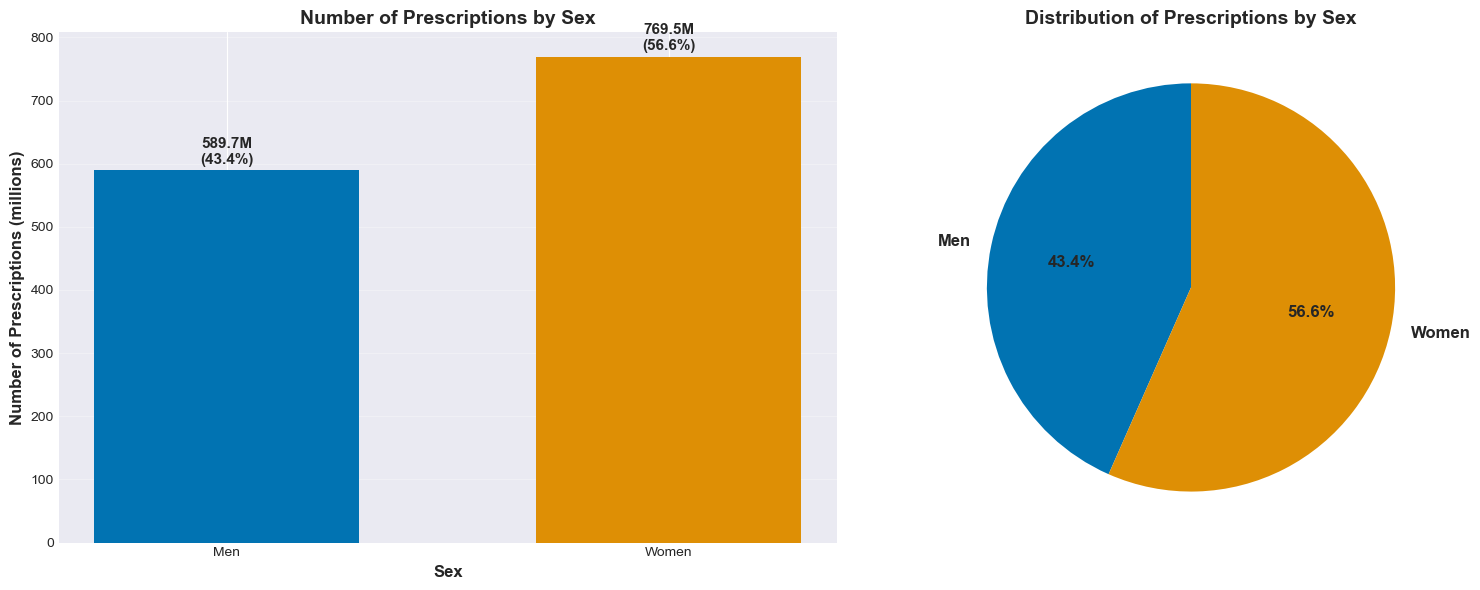

In [30]:
# Number of prescriptions by Sex
sex_rx_count = df.groupby('sexe').agg({
    'nombre de receptes': 'sum',
    'import íntegre': 'sum'
}).reset_index()

sex_rx_count['Percentage'] = (sex_rx_count['nombre de receptes'] / sex_rx_count['nombre de receptes'].sum()) * 100

print("\nNumber of Prescriptions by Sex:")
print(sex_rx_count[['sexe', 'nombre de receptes', 'Percentage']])

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
cb_colors = sns.color_palette("colorblind")

# Bar chart
x = np.arange(len(sex_rx_count))
width = 0.6
bars = ax1.bar(x, sex_rx_count['nombre de receptes'] / 1_000_000, width, 
              color=[cb_colors[0], cb_colors[1]])
ax1.set_ylabel('Number of Prescriptions (millions)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Sex', fontsize=12, fontweight='bold')
ax1.set_title('Number of Prescriptions by Sex', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(sex_rx_count['sexe'])
ax1.grid(axis='y', alpha=0.3)

# Add value labels
for i, row in sex_rx_count.iterrows():
    ax1.text(i, row['nombre de receptes'] / 1_000_000 + 10, 
            f"{row['nombre de receptes']/1_000_000:.1f}M\n({row['Percentage']:.1f}%)", 
            ha='center', fontweight='bold', fontsize=11)

# Pie chart
ax2.pie(sex_rx_count['nombre de receptes'], labels=sex_rx_count['sexe'], autopct='%1.1f%%', 
        startangle=90, colors=[cb_colors[0], cb_colors[1]], 
        textprops={'fontsize': 12, 'fontweight': 'bold'})
ax2.set_title('Distribution of Prescriptions by Sex', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


Number of Prescriptions by Age Group:
   grup d'edat  nombre de receptes  Percentage
0          0-1             5276720    0.388225
6          2-3             4931337    0.362814
11         4-5             4628415    0.340527
16         6-7             4226551    0.310961
21         8-9             4299800    0.316350
1        10-11             4322204    0.317999
2        12-13             4337751    0.319142
3        14-15             4711218    0.346620
4        16-17             5331032    0.392221
5        18-19             5405650    0.397711
7        20-24            14360282    1.056532
8        25-29            16843465    1.239228
9        30-34            22414259    1.649090
10       35-39            32279119    2.374879
12       40-44            47546294    3.498135
13       45-49            64530260    4.747700
14       50-54            82948115    6.102762
15       55-59           104294973    7.673319
17       60-64           125065184    9.201451
18       65-69       

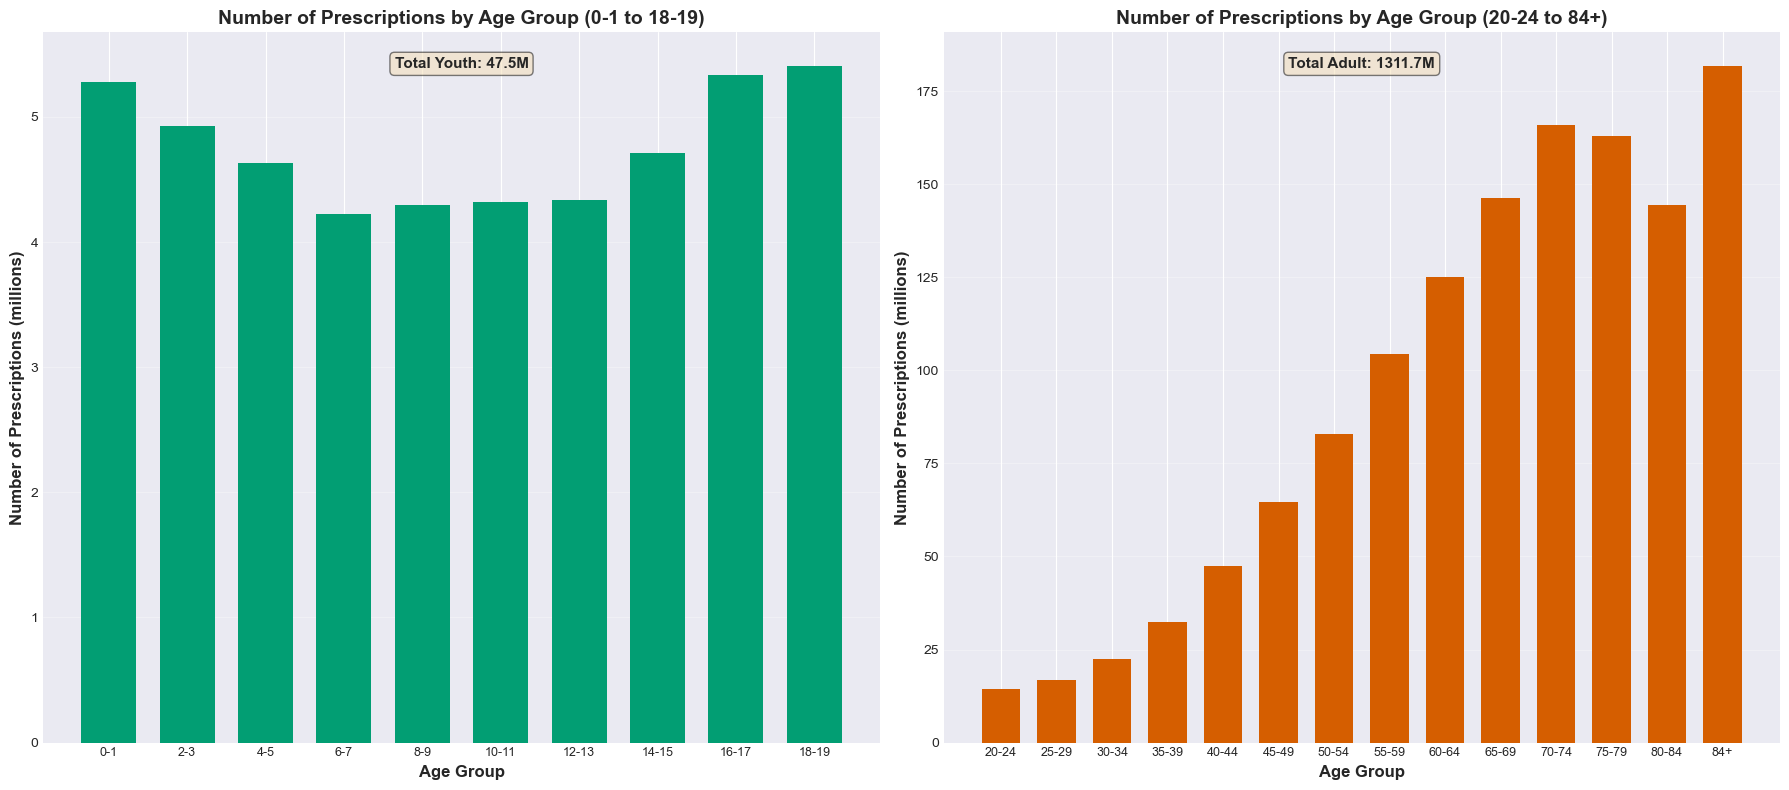

In [31]:
# Number of prescriptions by Age Group
age_rx_count = df.groupby("grup d'edat").agg({
    'nombre de receptes': 'sum',
    'import íntegre': 'sum'
}).reset_index()

age_rx_count["grup d'edat"] = pd.Categorical(age_rx_count["grup d'edat"], categories=age_order, ordered=True)
age_rx_count = age_rx_count.sort_values("grup d'edat")
age_rx_count['Percentage'] = (age_rx_count['nombre de receptes'] / age_rx_count['nombre de receptes'].sum()) * 100

print("\nNumber of Prescriptions by Age Group:")
print(age_rx_count[["grup d'edat", 'nombre de receptes', 'Percentage']])

# Split into youth and adult
age_rx_count_youth = age_rx_count[age_rx_count["grup d'edat"].isin(youth_ages)]
age_rx_count_adult = age_rx_count[age_rx_count["grup d'edat"].isin(adult_ages)]

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
cb_colors = sns.color_palette("colorblind")

# Youth subplot
x_youth = np.arange(len(age_rx_count_youth))
ax1.bar(x_youth, age_rx_count_youth['nombre de receptes'] / 1_000_000, 0.7, color=cb_colors[2])
ax1.set_ylabel('Number of Prescriptions (millions)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Age Group', fontsize=12, fontweight='bold')
ax1.set_title('Number of Prescriptions by Age Group (0-1 to 18-19)', fontsize=14, fontweight='bold')
ax1.set_xticks(x_youth)
ax1.set_xticklabels(age_rx_count_youth["grup d'edat"], rotation=0, ha='center', fontsize=9)
ax1.grid(axis='y', alpha=0.3)

# Add total
total_youth = age_rx_count_youth['nombre de receptes'].sum()
ax1.text(0.5, 0.95, f'Total Youth: {total_youth/1_000_000:.1f}M', 
        transform=ax1.transAxes, ha='center', fontsize=11, fontweight='bold',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Adult subplot
x_adult = np.arange(len(age_rx_count_adult))
ax2.bar(x_adult, age_rx_count_adult['nombre de receptes'] / 1_000_000, 0.7, color=cb_colors[3])
ax2.set_ylabel('Number of Prescriptions (millions)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Age Group', fontsize=12, fontweight='bold')
ax2.set_title('Number of Prescriptions by Age Group (20-24 to 84+)', fontsize=14, fontweight='bold')
ax2.set_xticks(x_adult)
ax2.set_xticklabels(age_rx_count_adult["grup d'edat"], rotation=0, ha='center', fontsize=9)
ax2.grid(axis='y', alpha=0.3)

# Add total
total_adult = age_rx_count_adult['nombre de receptes'].sum()
ax2.text(0.5, 0.95, f'Total Adult: {total_adult/1_000_000:.1f}M', 
        transform=ax2.transAxes, ha='center', fontsize=11, fontweight='bold',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()


Number of Prescriptions by Sanitary Region:
                 regió sanitària  nombre de receptes  Percentage
1                      BARCELONA           722817289   53.180010
7                         GIRONA           141793691   10.432221
5              CAMP DE TARRAGONA           102816600    7.564550
6              CATALUNYA CENTRAL            93327186    6.866383
3   BARCELONA METROPOLITANA NORD            74164915    5.456553
8                         LLEIDA            63889256    4.700540
2               BARCELONA CIUTAT            55563733    4.088004
4    BARCELONA METROPOLITANA SUD            40003072    2.943156
10              TERRES DE L'EBRE            36455375    2.682140
9                        PENEDÈS            16660544    1.225770
0             ALT PIRINEU i ARAN            11698182    0.860673


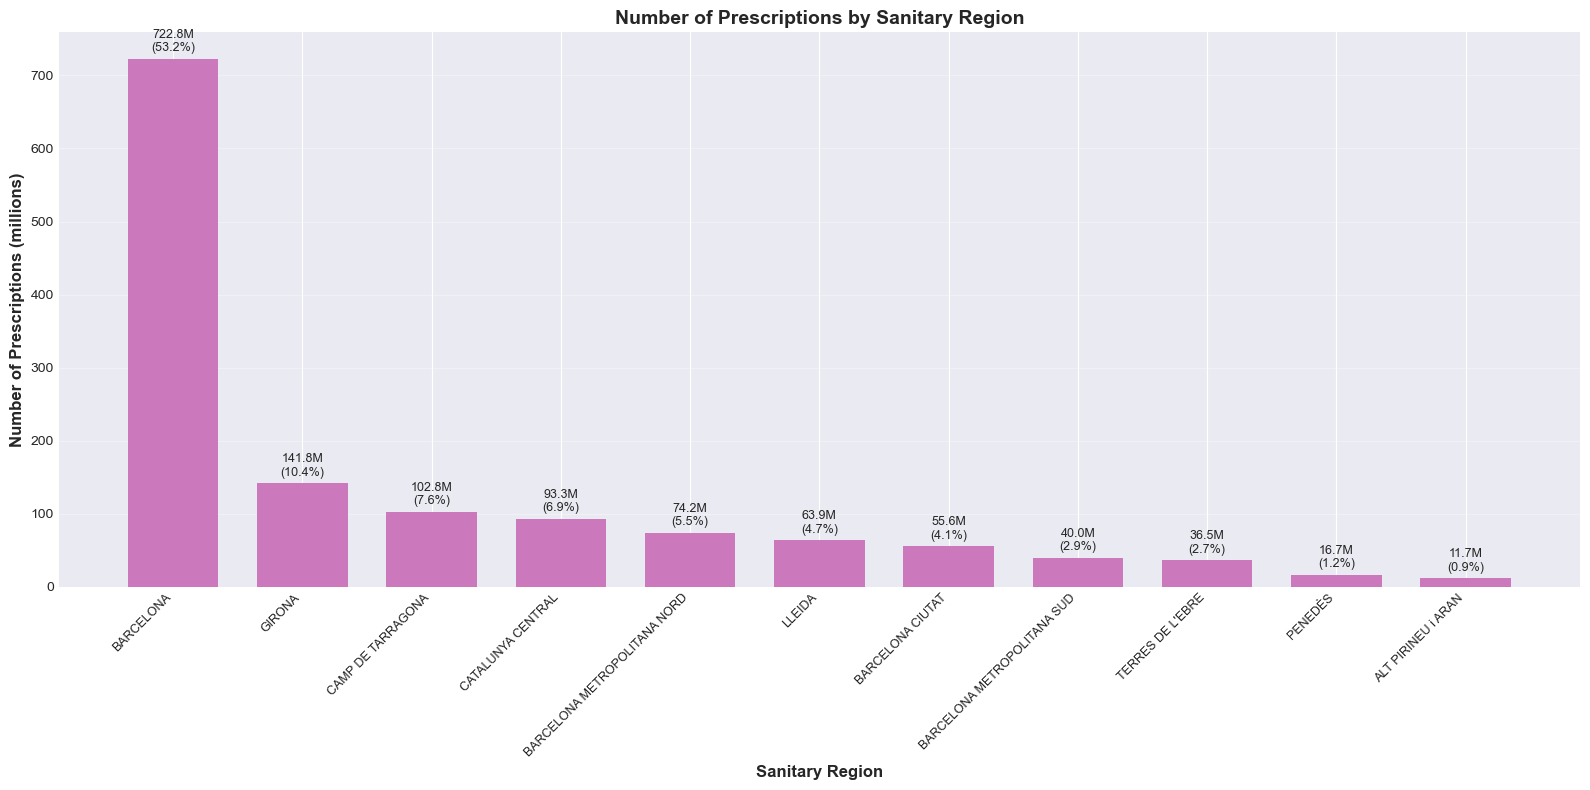

In [32]:
# Number of prescriptions by Sanitary Region
region_rx_count = df.groupby('regió sanitària').agg({
    'nombre de receptes': 'sum',
    'import íntegre': 'sum'
}).reset_index()

region_rx_count = region_rx_count.sort_values('nombre de receptes', ascending=False)
region_rx_count['Percentage'] = (region_rx_count['nombre de receptes'] / region_rx_count['nombre de receptes'].sum()) * 100

print("\nNumber of Prescriptions by Sanitary Region:")
print(region_rx_count[['regió sanitària', 'nombre de receptes', 'Percentage']])

# Plot
fig, ax = plt.subplots(figsize=(16, 8))
x = np.arange(len(region_rx_count))
cb_colors = sns.color_palette("colorblind")

bars = ax.bar(x, region_rx_count['nombre de receptes'] / 1_000_000, 0.7, color=cb_colors[4])
ax.set_ylabel('Number of Prescriptions (millions)', fontsize=12, fontweight='bold')
ax.set_xlabel('Sanitary Region', fontsize=12, fontweight='bold')
ax.set_title('Number of Prescriptions by Sanitary Region', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(region_rx_count['regió sanitària'], rotation=45, ha='right', fontsize=9)
ax.grid(axis='y', alpha=0.3)

# Add value labels
for i, row in region_rx_count.iterrows():
    ax.text(x[region_rx_count.index.get_loc(i)], row['nombre de receptes'] / 1_000_000 + 10, 
           f"{row['nombre de receptes']/1_000_000:.1f}M\n({row['Percentage']:.1f}%)", 
           ha='center', fontsize=9)

plt.tight_layout()
plt.show()


Number of Prescriptions by Sanitary Region (excluding Barcelona):
                 regió sanitària  nombre de receptes  Percentage
7                         GIRONA           141793691   10.432221
5              CAMP DE TARRAGONA           102816600    7.564550
6              CATALUNYA CENTRAL            93327186    6.866383
3   BARCELONA METROPOLITANA NORD            74164915    5.456553
8                         LLEIDA            63889256    4.700540
2               BARCELONA CIUTAT            55563733    4.088004
4    BARCELONA METROPOLITANA SUD            40003072    2.943156
10              TERRES DE L'EBRE            36455375    2.682140
9                        PENEDÈS            16660544    1.225770
0             ALT PIRINEU i ARAN            11698182    0.860673


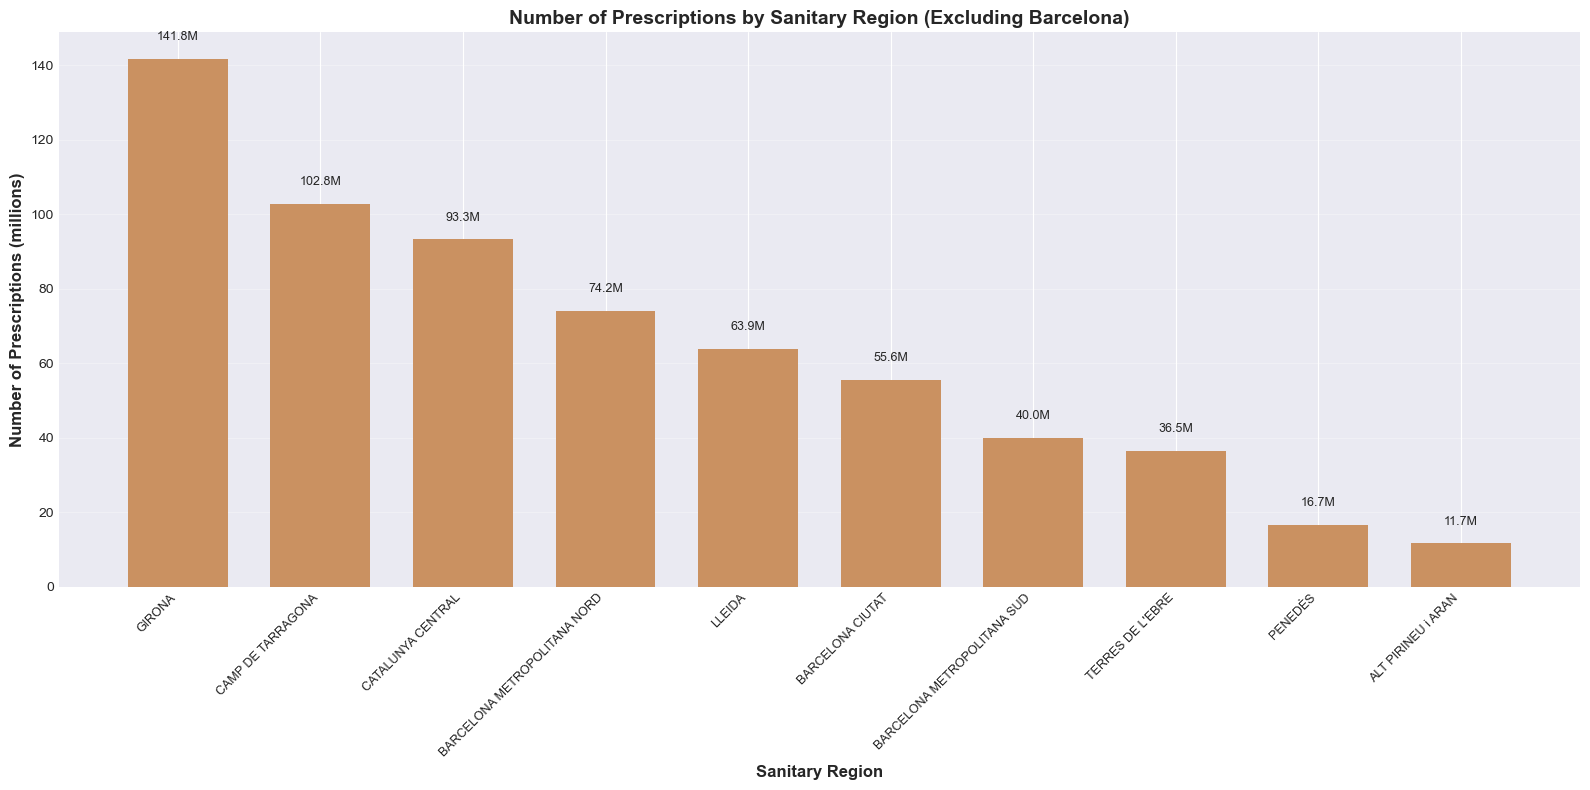

In [33]:
# Number of prescriptions by Sanitary Region (excluding Barcelona)
region_rx_count_no_bcn = region_rx_count[region_rx_count['regió sanitària'] != 'BARCELONA']

print("\nNumber of Prescriptions by Sanitary Region (excluding Barcelona):")
print(region_rx_count_no_bcn[['regió sanitària', 'nombre de receptes', 'Percentage']])

# Plot
fig, ax = plt.subplots(figsize=(16, 8))
x = np.arange(len(region_rx_count_no_bcn))
cb_colors = sns.color_palette("colorblind")

bars = ax.bar(x, region_rx_count_no_bcn['nombre de receptes'] / 1_000_000, 0.7, color=cb_colors[5])
ax.set_ylabel('Number of Prescriptions (millions)', fontsize=12, fontweight='bold')
ax.set_xlabel('Sanitary Region', fontsize=12, fontweight='bold')
ax.set_title('Number of Prescriptions by Sanitary Region (Excluding Barcelona)', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(region_rx_count_no_bcn['regió sanitària'], rotation=45, ha='right', fontsize=9)
ax.grid(axis='y', alpha=0.3)

# Add value labels
for i, (idx, row) in enumerate(region_rx_count_no_bcn.iterrows()):
    ax.text(i, row['nombre de receptes'] / 1_000_000 + 5, 
           f"{row['nombre de receptes']/1_000_000:.1f}M", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

### Comparative Analysis: Prescription Volume by Demographics and ATC Groups

Number of Prescriptions by Sex and ATC Level 1 (in millions):
sexe                                                       Men       Women
grup ATC nivell 1                                                         
CARDIOVASCULAR SYSTEM                               175.776733  173.205751
NERVOUS SYSTEM                                      134.987212  260.297719
ALIMENTARY TRACT AND METABOLISM                      88.516366  111.967766
BLOOD AND BLOOD FORMING ORGANS                       42.552710   42.988813
RESPIRATORY SYSTEM                                   36.753766   41.488652
MUSCULO-SKELETAL SYSTEM                              27.245682   39.631506
GENITO-URINARY SYSTEM AND SEX HORMONES               26.164065   13.888125
ANTIINFECTIVES FOR SYSTEMIC USE                      17.844831   24.464144
SENSORY ORGANS                                       14.126883   18.988068
DERMATOLOGICALS                                      11.134243   13.307835
SYSTEMIC HORMONAL PREPARATIONS, EXCL. 

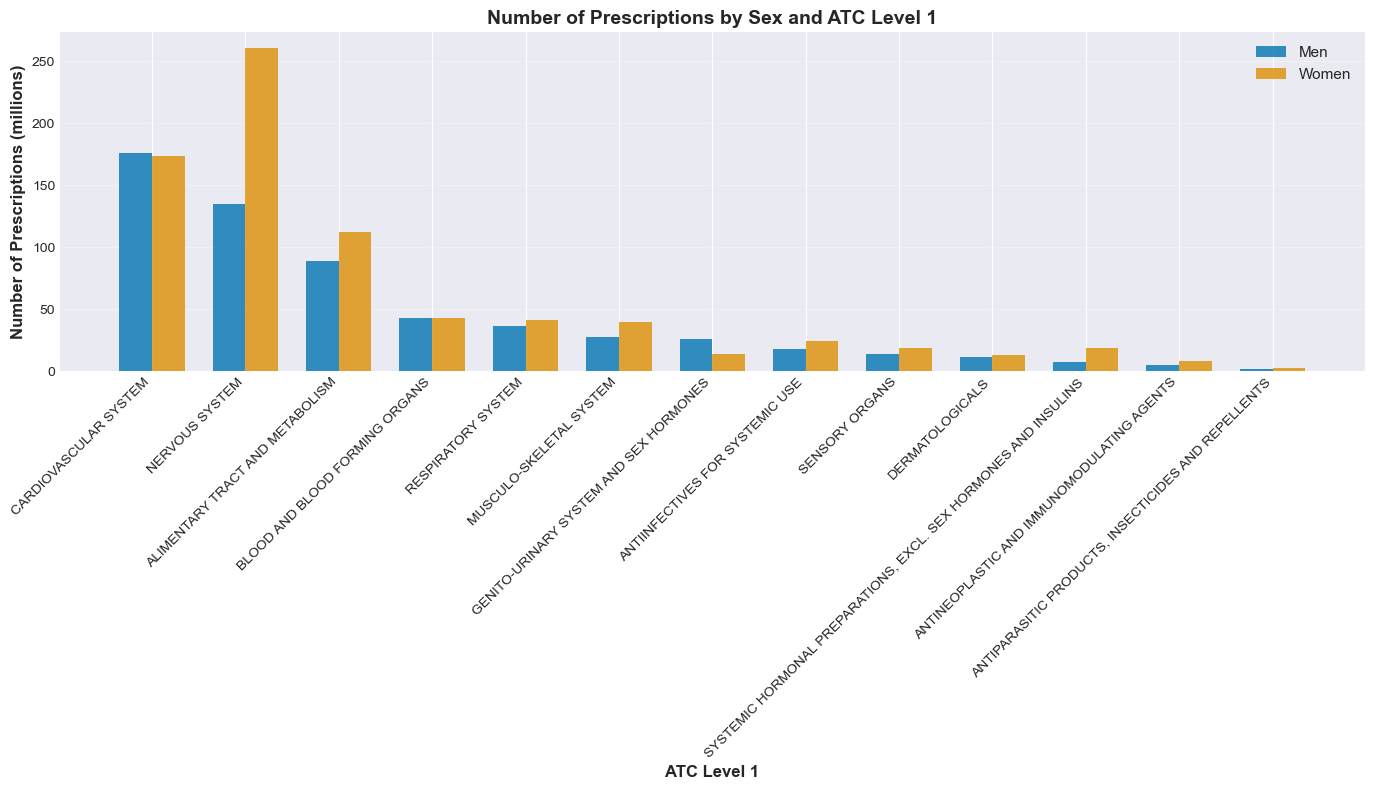

In [34]:
# Number of prescriptions: Sex x ATC Level 1
sex_atc1_rx = df.groupby(['grup ATC nivell 1', 'sexe']).agg({
    'nombre de receptes': 'sum'
}).reset_index()

sex_atc1_rx_pivot = sex_atc1_rx.pivot(index='grup ATC nivell 1', columns='sexe', values='nombre de receptes')
sex_atc1_rx_pivot = sex_atc1_rx_pivot.sort_values(by=sex_atc1_rx_pivot.columns[0], ascending=False)

print("Number of Prescriptions by Sex and ATC Level 1 (in millions):")
print(sex_atc1_rx_pivot / 1_000_000)

# Plot
fig, ax = plt.subplots(figsize=(14, 8))
x = np.arange(len(sex_atc1_rx_pivot))
width = 0.35
cb_colors = sns.color_palette("colorblind")

sexes = sex_atc1_rx_pivot.columns
for i, sex in enumerate(sexes):
    ax.bar(x + i*width, sex_atc1_rx_pivot[sex] / 1_000_000, width, label=sex, 
          color=cb_colors[i], alpha=0.8)

ax.set_ylabel('Number of Prescriptions (millions)', fontsize=12, fontweight='bold')
ax.set_xlabel('ATC Level 1', fontsize=12, fontweight='bold')
ax.set_title('Number of Prescriptions by Sex and ATC Level 1', fontsize=14, fontweight='bold')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(sex_atc1_rx_pivot.index, rotation=45, ha='right')
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

Number of Prescriptions by Age Group and ATC Level 1 (in millions):
grup ATC nivell 1  NERVOUS SYSTEM  CARDIOVASCULAR SYSTEM  ALIMENTARY TRACT AND METABOLISM  BLOOD AND BLOOD FORMING ORGANS  \
grup d'edat                                                                                                                 
0-1                      1.129969               0.034572                         0.876636                        0.143947   
2-3                      0.772879               0.026550                         0.165117                        0.100000   
4-5                      0.689202               0.031512                         0.146145                        0.081171   
6-7                      0.749084               0.044407                         0.146927                        0.065133   
8-9                      0.951717               0.062820                         0.165298                        0.060648   
10-11                    1.144879               0.080011 

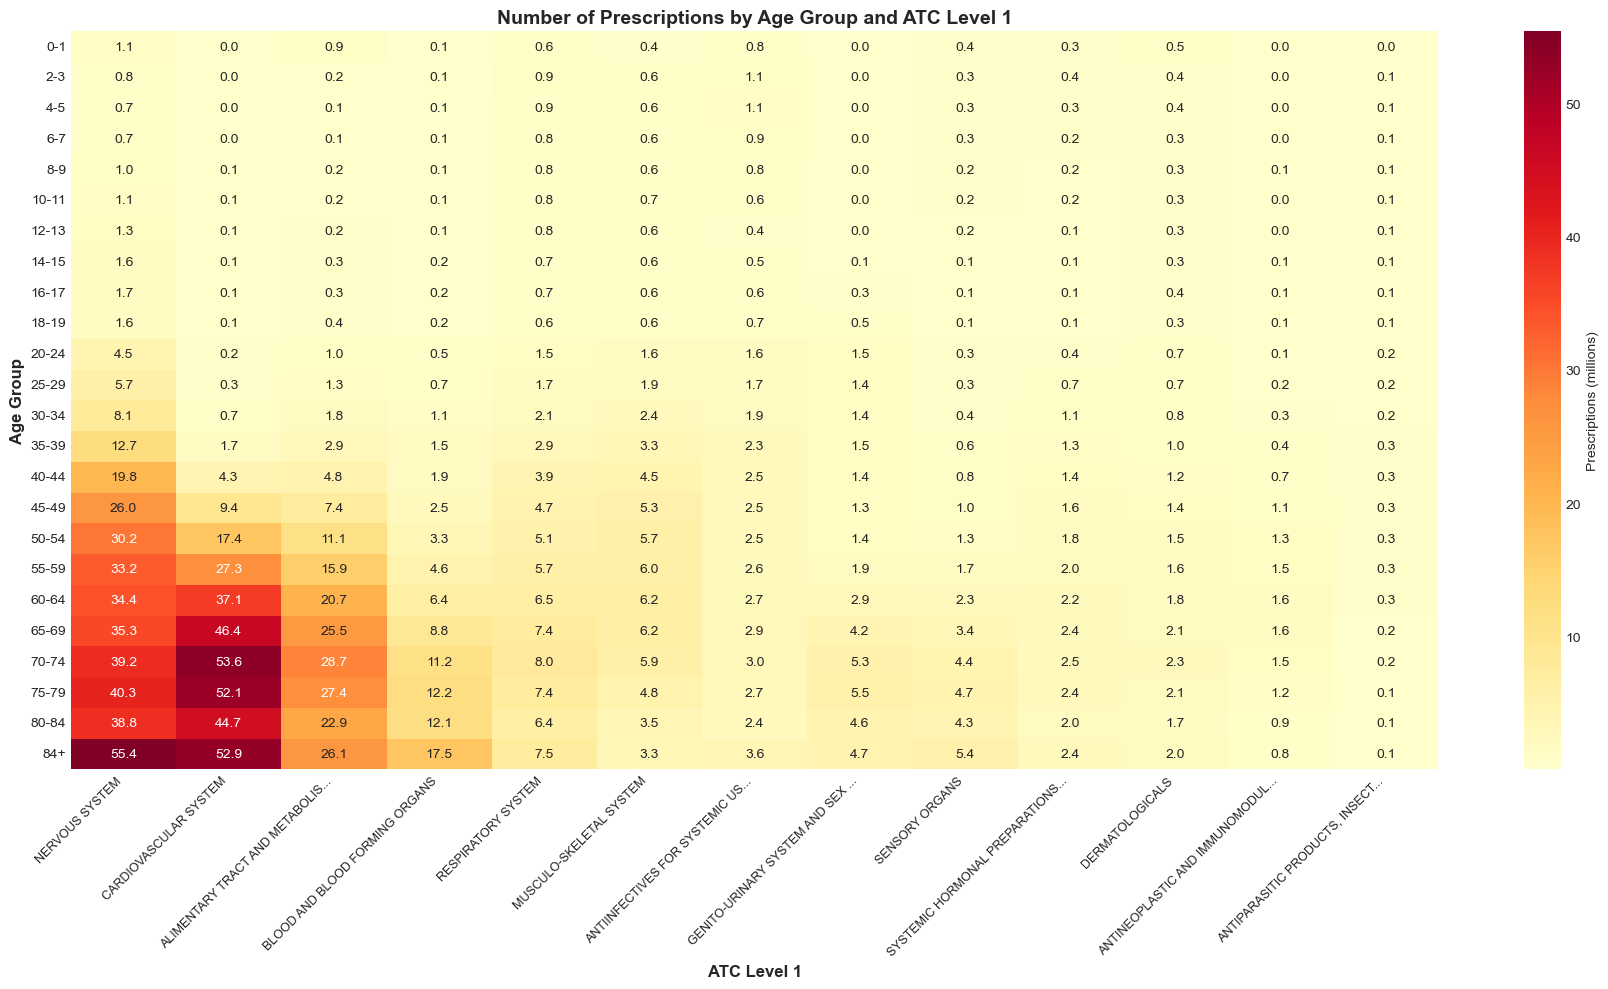

In [35]:
# Number of prescriptions: Age x ATC Level 1 (heatmap)
age_atc1_rx = df.groupby(["grup d'edat", 'grup ATC nivell 1']).agg({
    'nombre de receptes': 'sum'
}).reset_index()

age_atc1_rx["grup d'edat"] = pd.Categorical(age_atc1_rx["grup d'edat"], categories=age_order, ordered=True)
age_atc1_rx = age_atc1_rx.sort_values("grup d'edat")

print("Number of Prescriptions by Age Group and ATC Level 1 (in millions):")

# Create heatmap
pivot_rx = age_atc1_rx.pivot(index="grup d'edat", columns='grup ATC nivell 1', values='nombre de receptes')
column_order_rx = pivot_rx.sum().sort_values(ascending=False).index
pivot_rx = pivot_rx[column_order_rx] / 1_000_000  # Convert to millions
print(pivot_rx)

fig, ax = plt.subplots(figsize=(18, 10))
abbreviated_cols_rx = [col[:30] + '...' if len(col) > 30 else col for col in pivot_rx.columns]
sns.heatmap(pivot_rx, annot=True, fmt='.1f', cmap='YlOrRd', cbar_kws={'label': 'Prescriptions (millions)'}, 
            ax=ax, xticklabels=abbreviated_cols_rx)
ax.set_title('Number of Prescriptions by Age Group and ATC Level 1', fontsize=14, fontweight='bold')
ax.set_xlabel('ATC Level 1', fontsize=12, fontweight='bold')
ax.set_ylabel('Age Group', fontsize=12, fontweight='bold')
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=9)
plt.tight_layout()
plt.show()

Number of Prescriptions by Region and ATC Level 1 (in millions):
grup ATC nivell 1             NERVOUS SYSTEM  CARDIOVASCULAR SYSTEM  ALIMENTARY TRACT AND METABOLISM  BLOOD AND BLOOD FORMING ORGANS  \
regió sanitària                                                                                                                        
ALT PIRINEU i ARAN                  3.265479               2.952208                         1.696329                        0.833456   
BARCELONA                         208.627432             189.438321                       107.496459                       46.174154   
BARCELONA CIUTAT                   15.981065              14.222181                         8.059030                        3.655061   
BARCELONA METROPOLITANA NORD       21.914393              18.206859                        10.787321                        4.417077   
BARCELONA METROPOLITANA SUD        11.694810              10.126962                         5.818178                   

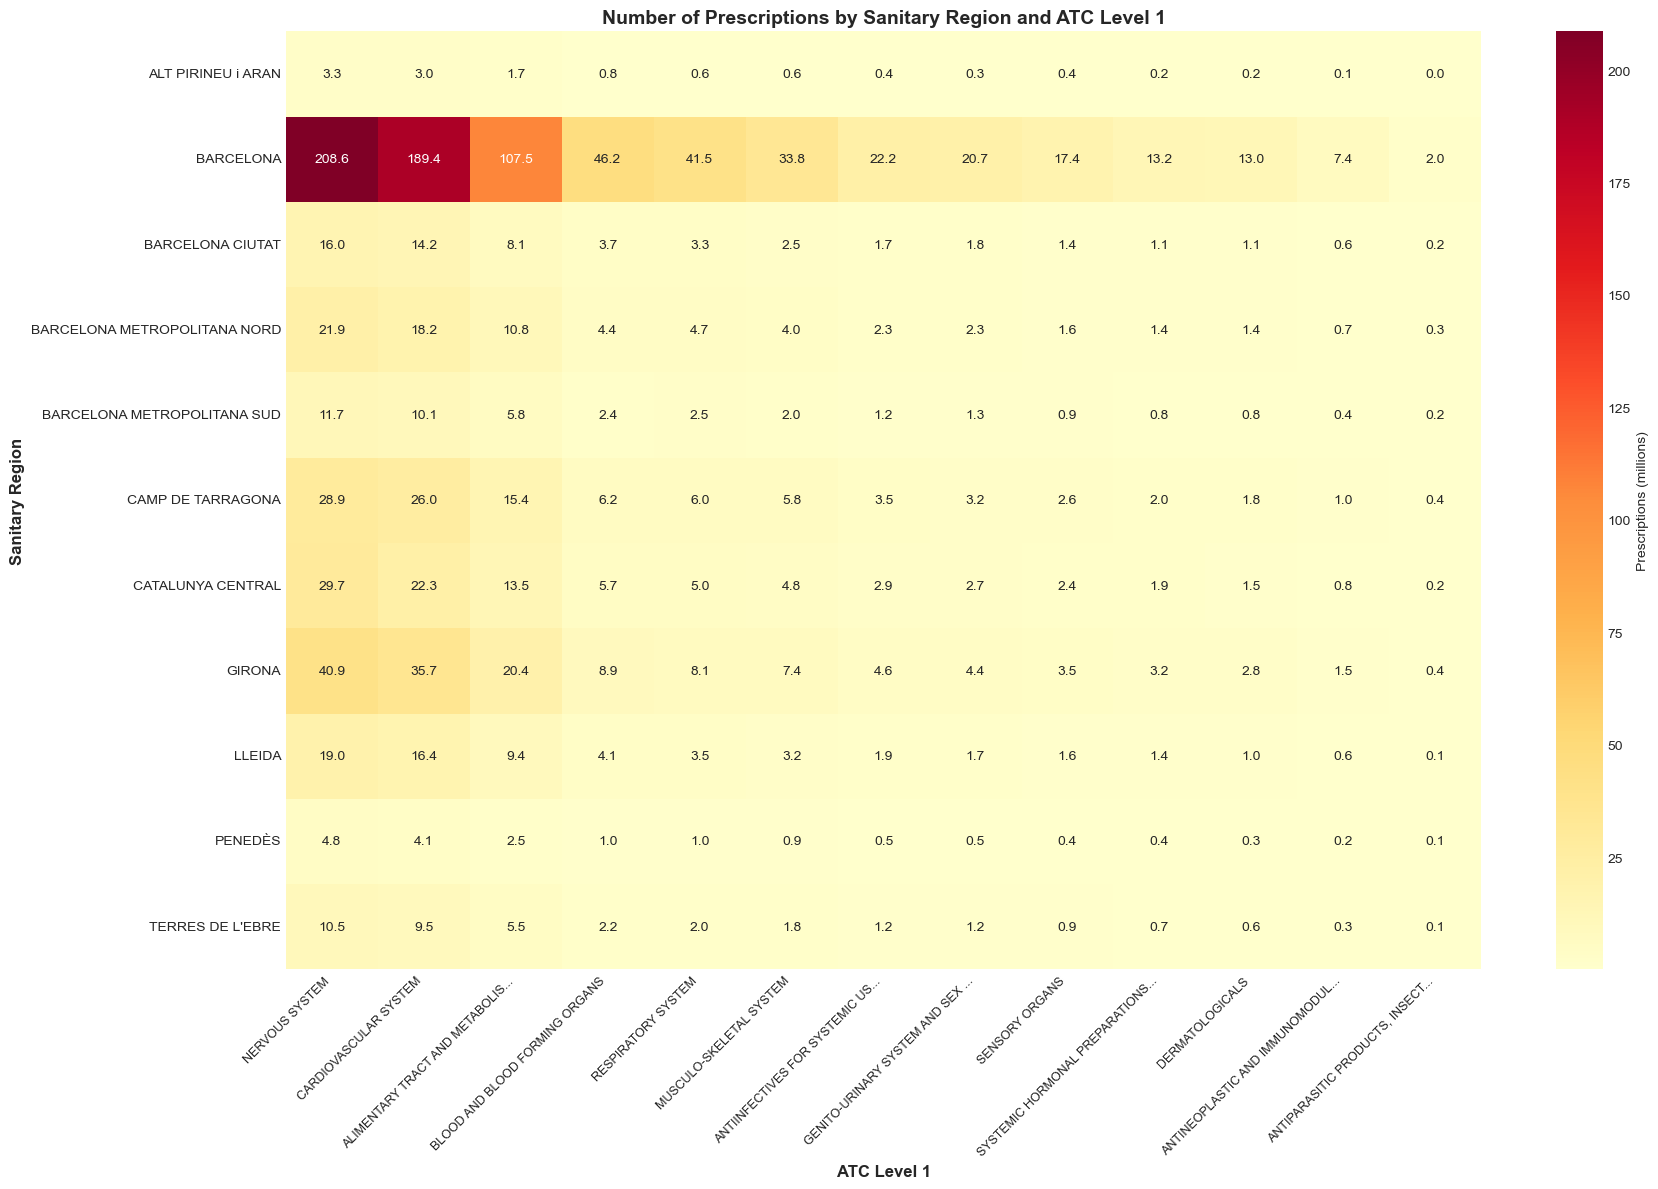

In [36]:
# Number of prescriptions: Sanitary Region x ATC Level 1 (heatmap)
region_atc1_rx = df.groupby(['regió sanitària', 'grup ATC nivell 1']).agg({
    'nombre de receptes': 'sum'
}).reset_index()

print("Number of Prescriptions by Region and ATC Level 1 (in millions):")

# Create heatmap
pivot_region_rx = region_atc1_rx.pivot(index='regió sanitària', columns='grup ATC nivell 1', values='nombre de receptes')
column_order_region_rx = pivot_region_rx.sum().sort_values(ascending=False).index
pivot_region_rx = pivot_region_rx[column_order_region_rx] / 1_000_000  # Convert to millions
print(pivot_region_rx)

fig, ax = plt.subplots(figsize=(18, 12))
abbreviated_cols_region_rx = [col[:30] + '...' if len(col) > 30 else col for col in pivot_region_rx.columns]
sns.heatmap(pivot_region_rx, annot=True, fmt='.1f', cmap='YlOrRd', cbar_kws={'label': 'Prescriptions (millions)'}, 
            ax=ax, xticklabels=abbreviated_cols_region_rx)
ax.set_title('Number of Prescriptions by Sanitary Region and ATC Level 1', fontsize=14, fontweight='bold')
ax.set_xlabel('ATC Level 1', fontsize=12, fontweight='bold')
ax.set_ylabel('Sanitary Region', fontsize=12, fontweight='bold')
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=9)
plt.tight_layout()
plt.show()

In [37]:
# Summary statistics for prescription volumes
print("=" * 80)
print("PRESCRIPTION VOLUME SUMMARY STATISTICS")
print("=" * 80)

# Overall prescription statistics
total_prescriptions = df['nombre de receptes'].sum()
mean_prescriptions_per_record = df['nombre de receptes'].mean()
median_prescriptions_per_record = df['nombre de receptes'].median()
std_prescriptions_per_record = df['nombre de receptes'].std()

print(f"\nOverall Prescription Statistics:")
print(f"  Total number of prescriptions: {total_prescriptions:,.0f}")
print(f"  Mean prescriptions per record: {mean_prescriptions_per_record:.2f}")
print(f"  Median prescriptions per record: {median_prescriptions_per_record:.2f}")
print(f"  Std dev of prescriptions per record: {std_prescriptions_per_record:.2f}")

# Prescriptions by ATC Level 1
print(f"\n{'ATC Level 1 - Prescription Volume Statistics':-^80}")
atc1_rx_stats = df.groupby('grup ATC nivell 1')['nombre de receptes'].agg(['sum', 'mean', 'std']).sort_values('sum', ascending=False)
atc1_rx_stats['pct_of_total'] = 100 * atc1_rx_stats['sum'] / total_prescriptions
print(f"{'Category':<50} {'Total (M)':<12} {'Mean':<10} {'Std':<10} {'% Total':<10}")
print("-" * 80)
for idx, row in atc1_rx_stats.head(10).iterrows():
    print(f"{idx[:48]:<50} {row['sum']/1e6:>10.2f}  {row['mean']:>8.2f}  {row['std']:>8.2f}  {row['pct_of_total']:>8.2f}%")

# Prescriptions by Sex
print(f"\n{'Prescription Volume by Sex':-^80}")
sex_rx = df.groupby('sexe')['nombre de receptes'].sum().sort_values(ascending=False)
for sex, rx_count in sex_rx.items():
    pct = 100 * rx_count / total_prescriptions
    print(f"  {sex:<15}: {rx_count:>12,.0f} prescriptions ({pct:>5.2f}%)")

# Prescriptions by Age Group
print(f"\n{'Prescription Volume by Age Group':-^80}")
age_rx = df.groupby("grup d'edat")['nombre de receptes'].sum()
age_rx = age_rx.reindex(age_order)
for age, rx_count in age_rx.items():
    pct = 100 * rx_count / total_prescriptions
    print(f"  {age:<20}: {rx_count:>12,.0f} prescriptions ({pct:>5.2f}%)")

# Prescriptions by Region (top 10)
print(f"\n{'Top 10 Regions by Prescription Volume':-^80}")
region_rx = df.groupby('regió sanitària')['nombre de receptes'].sum().sort_values(ascending=False)
for region, rx_count in region_rx.head(10).items():
    pct = 100 * rx_count / total_prescriptions
    region_name = region[:40] + '...' if len(region) > 43 else region
    print(f"  {region_name:<45}: {rx_count:>12,.0f} ({pct:>5.2f}%)")

print("\n" + "=" * 80)

PRESCRIPTION VOLUME SUMMARY STATISTICS

Overall Prescription Statistics:
  Total number of prescriptions: 1,359,189,843
  Mean prescriptions per record: 180.36
  Median prescriptions per record: 13.00
  Std dev of prescriptions per record: 1072.27

------------------ATC Level 1 - Prescription Volume Statistics------------------
Category                                           Total (M)    Mean       Std        % Total   
--------------------------------------------------------------------------------
NERVOUS SYSTEM                                         395.28    289.20   1470.39     29.08%
CARDIOVASCULAR SYSTEM                                  348.98    356.89   1719.16     25.68%
ALIMENTARY TRACT AND METABOLISM                        200.48    183.39   1219.11     14.75%
BLOOD AND BLOOD FORMING ORGANS                          85.54    226.03   1184.38      6.29%
RESPIRATORY SYSTEM                                      78.24    154.55    465.90      5.76%
MUSCULO-SKELETAL SYSTEM    